###### **ASSIGNMENT 4**
**Rhea Bajpai** <br>


# <b>Advertisement Click Prediction</b>
## **Abstract**
<p>Advertisement click prediction is a data science problem that aims to predict if a user will click on an online advertisement or not. The prediction is made based on a variety of features related to the user, the advertisement, and the  in which the ad is displayed.</p>





# 1. Data Preprocessing Tools

## a) Importing the libraries

In [1]:
#installs both eli5 and shap Python packages for interpreting and debugging machine learning models.
!pip install eli5 shap 
!pip install h2o 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 KB 13.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 KB 57.7 MB/s eta 0:00:00
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107747 sha256=3c737220321c1468e60c87b3d0c0f032f4884d62ce72061fc787023bde321a14
  Stored in directory: /root/.cache/pip/wheels/7b/26/a5/8460416695a992a2966b41caa5338e5e7fcea98c9d032d055c
Successfully built eli5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.6/177.6 MB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.40.0.3-py2.py3-none-any.whl size=177694727 sha256=0886a4b6769609eeb65549370cbcb313a42c3031ca7edfb2d782eba408be66db
  Stored in directory: /root/.cache/pip

In [2]:
#importing the library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot
import warnings
from sklearn.impute import KNNImputer
warnings.filterwarnings('ignore')

In [3]:
#importing the h2o library
import h2o
from h2o.automl import H2OAutoML
h2o.init()#initializing the h2o library

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.18" 2023-01-17; OpenJDK Runtime Environment (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1); OpenJDK 64-Bit Server VM (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.9/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpi_kmm6rx
  JVM stdout: /tmp/tmpi_kmm6rx/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpi_kmm6rx/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         03 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.40.0.3
H2O_cluster_version_age:    5 days
H2O_cluster_name:           H2O_from_python_unknownUser_o54sz0
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.172 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.9.16 final
--------------------------  -----------------------------------------------------------------------------------------

In [4]:
data_train = pd.read_csv('https://raw.githubusercontent.com/Rhea3110/DSEM/main/Ad_click_prediction_train.csv')
data_train=data_train.drop('DateTime',axis=1)
data_train=data_train.drop('user_id',axis=1)
data_train=data_train.drop('session_id',axis=1)
print(data_train.head().to_markdown())
print(data_train.shape)

|    | product   |   campaign_id |   webpage_id |   product_category_1 |   product_category_2 |   user_group_id | gender   |   age_level |   user_depth |   city_development_index |   var_1 |   is_click |
|---:|:----------|--------------:|-------------:|---------------------:|---------------------:|----------------:|:---------|------------:|-------------:|-------------------------:|--------:|-----------:|
|  0 | C         |        359520 |        13787 |                    4 |                  nan |              10 | Female   |           4 |            3 |                        3 |       0 |          0 |
|  1 | C         |        105960 |        11085 |                    5 |                  nan |               8 | Female   |           2 |            2 |                      nan |       0 |          0 |
|  2 | C         |        359520 |        13787 |                    4 |                  nan |               8 | Female   |           2 |            2 |                      nan |    

In [5]:
print(data_train.columns)

Index(['product', 'campaign_id', 'webpage_id', 'product_category_1',
       'product_category_2', 'user_group_id', 'gender', 'age_level',
       'user_depth', 'city_development_index', 'var_1', 'is_click'],
      dtype='object')


In [6]:
data_test = pd.read_csv('https://raw.githubusercontent.com/Rhea3110/DSEM/main/Ad_Click_prediciton_test.csv')
data_test=data_test.drop('DateTime',axis=1)
data_test=data_test.drop('user_id',axis=1)
data_test=data_test.drop('session_id',axis=1)
print(data_test.head().to_markdown())
print(data_test.shape)

|    | product   |   campaign_id |   webpage_id |   product_category_1 |   product_category_2 |   user_group_id | gender   |   age_level |   user_depth |   city_development_index |   var_1 |
|---:|:----------|--------------:|-------------:|---------------------:|---------------------:|----------------:|:---------|------------:|-------------:|-------------------------:|--------:|
|  0 | J         |        404347 |        53587 |                    1 |                  nan |               5 | Male     |           5 |            3 |                      nan |       0 |
|  1 | I         |        118601 |        28529 |                    3 |                82527 |             nan | nan      |         nan |          nan |                      nan |       1 |
|  2 | I         |        118601 |        28529 |                    4 |                82527 |             nan | nan      |         nan |          nan |                      nan |       1 |
|  3 | G         |        118601 |        285

In [7]:
print(data_train.describe().to_markdown())

|       |   campaign_id |   webpage_id |   product_category_1 |   product_category_2 |   user_group_id |    age_level |   user_depth |   city_development_index |         var_1 |      is_click |
|:------|--------------:|-------------:|---------------------:|---------------------:|----------------:|-------------:|-------------:|-------------------------:|--------------:|--------------:|
| count |        463291 |     463291   |         463291       |              97437   |    445048       | 445048       | 445048       |            338162        | 463291        | 463291        |
| mean  |        308475 |      29685.9 |              3.07243 |             162753   |         3.4774  |      2.78227 |      2.87842 |                 2.55712  |      0.422169 |      0.067627 |
| std   |        126517 |      21542.1 |              1.30423 |              78743.7 |         2.41289 |      1.0697  |      0.40013 |                 0.921345 |      0.493906 |      0.251105 |
| min   |         82320 |     

In [8]:
numColumns = data_train.select_dtypes("number").columns
StringColumns = data_train.select_dtypes("object").columns
numColumns= list(set(numColumns))
StringColumns= list(set(StringColumns))
print(f"Number Columns: {numColumns},\nString Columns: {StringColumns}")

Number Columns: ['age_level', 'user_depth', 'city_development_index', 'is_click', 'product_category_1', 'product_category_2', 'var_1', 'webpage_id', 'user_group_id', 'campaign_id'],
String Columns: ['gender', 'product']


## b) Taking care of missing data

In [9]:
#checking the count of null data in the current dataset 
missing_val_train=data_train.isnull().sum()
missing_val_test=data_test.isnull().sum()

print("Missing data in training set:\n",data_train.isnull().sum())
print()
print("Missing data in test set:\n",data_test.isnull().sum())

Missing data in training set:
 product                        0
campaign_id                    0
webpage_id                     0
product_category_1             0
product_category_2        365854
user_group_id              18243
gender                     18243
age_level                  18243
user_depth                 18243
city_development_index    125129
var_1                          0
is_click                       0
dtype: int64

Missing data in test set:
 product                       0
campaign_id                   0
webpage_id                    0
product_category_1            0
product_category_2        76171
user_group_id              5684
gender                     5684
age_level                  5684
user_depth                 5684
city_development_index    34609
var_1                         0
dtype: int64


In [10]:
data_test.dropna(inplace=True) #data is categorical hence makes no value to impute is or replace it by a particular value
data_train.dropna(inplace=True)
#out of 4,20,000 data points product category has around 3,50,000 missing points so adds no value imputing it
data_test.dropna(inplace=True)  
data_train.dropna(inplace=True)


In [11]:
#checking the count of null data in the current dataset 
print("Missing data in training set:\n",data_train.isnull().sum())
print()
print("Missing data in test set:\n",data_test.isnull().sum())

Missing data in training set:
 product                   0
campaign_id               0
webpage_id                0
product_category_1        0
product_category_2        0
user_group_id             0
gender                    0
age_level                 0
user_depth                0
city_development_index    0
var_1                     0
is_click                  0
dtype: int64

Missing data in test set:
 product                   0
campaign_id               0
webpage_id                0
product_category_1        0
product_category_2        0
user_group_id             0
gender                    0
age_level                 0
user_depth                0
city_development_index    0
var_1                     0
dtype: int64


In [12]:
print(data_train.shape)

(72660, 12)


<Figure size 800x500 with 0 Axes>

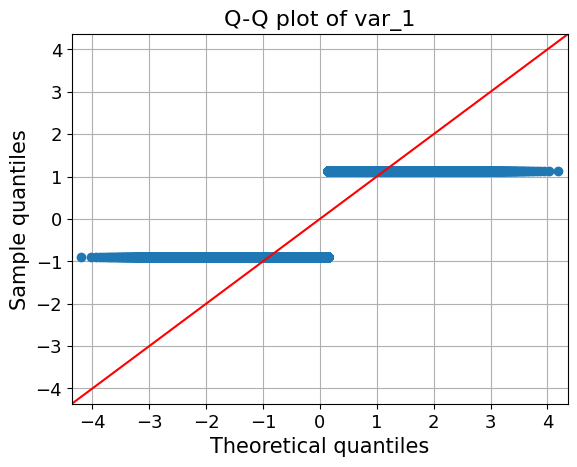

<Figure size 800x500 with 0 Axes>

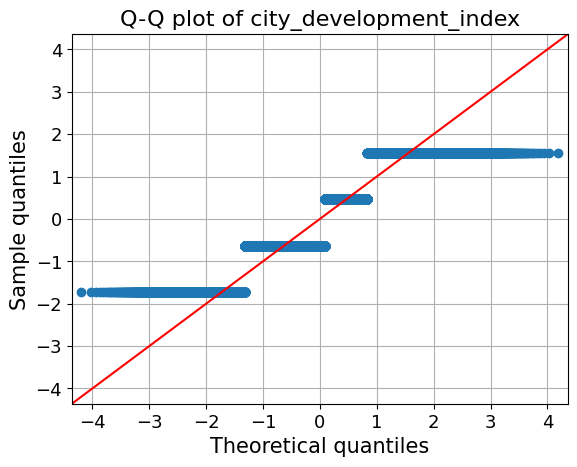

<Figure size 800x500 with 0 Axes>

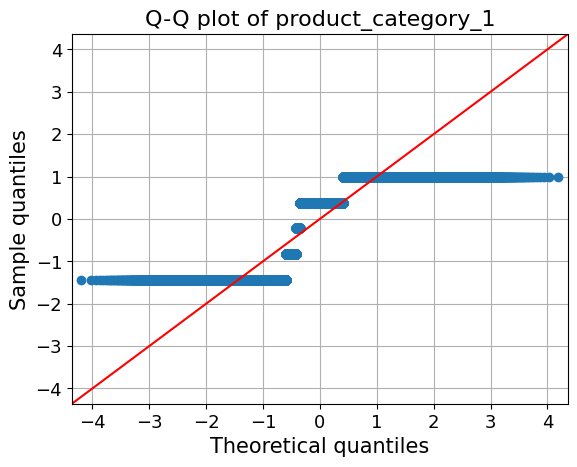

<Figure size 800x500 with 0 Axes>

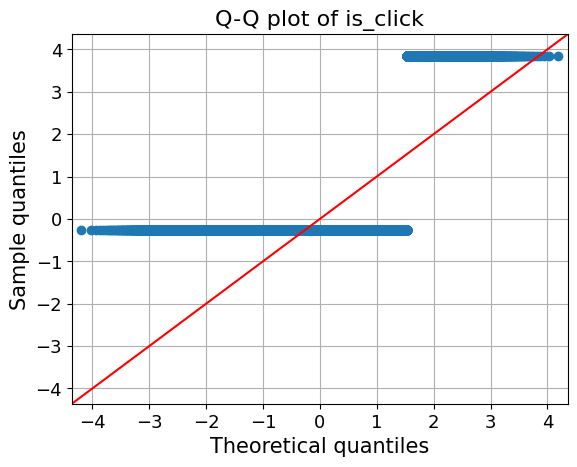

<Figure size 800x500 with 0 Axes>

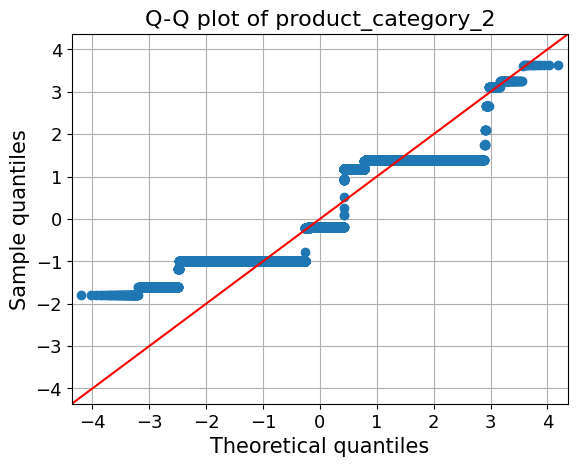

<Figure size 800x500 with 0 Axes>

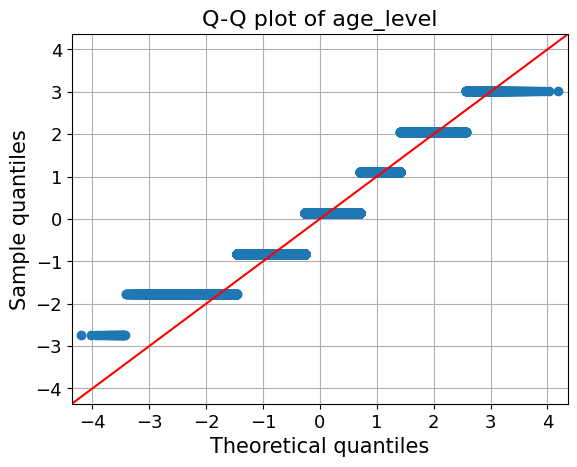

<Figure size 800x500 with 0 Axes>

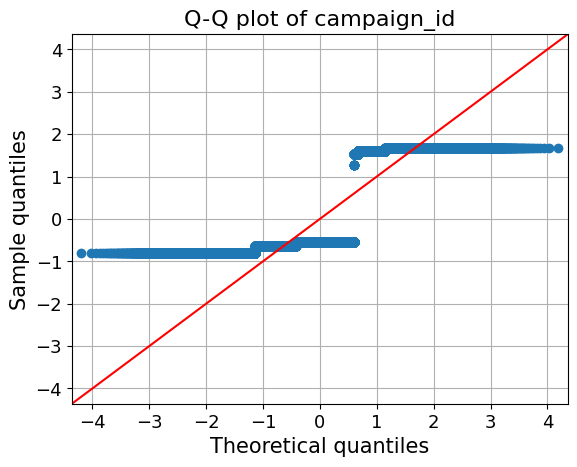

<Figure size 800x500 with 0 Axes>

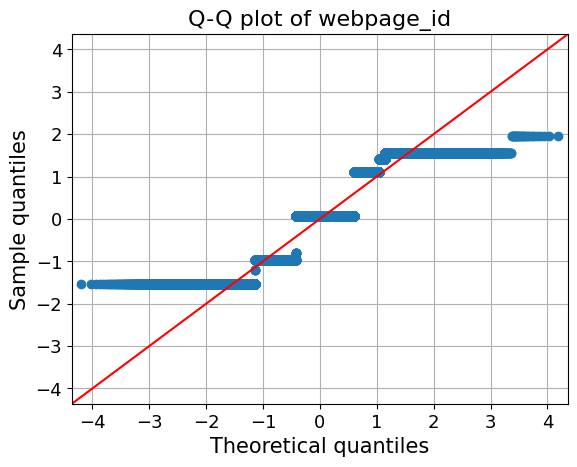

<Figure size 800x500 with 0 Axes>

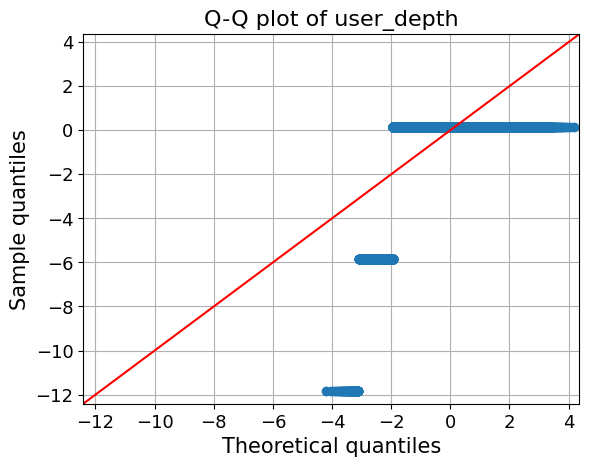

<Figure size 800x500 with 0 Axes>

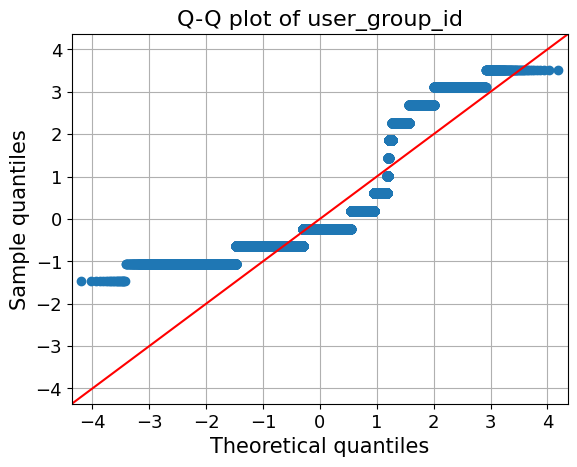

In [13]:
#checking the distribution of independent variables
from statsmodels.graphics.gofplots import qqplot
data_norm=data_train[['var_1', 'city_development_index', 'product_category_1', 'is_click', 'product_category_2', 'age_level', 'campaign_id', 'webpage_id', 'user_depth', 'user_group_id']]

for c in data_norm.columns[:]:
  plt.figure(figsize=(8,5))
  fig=qqplot(data_norm[c],line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=15)
  plt.ylabel("Sample quantiles",fontsize=15)
  plt.title("Q-Q plot of {}".format(c),fontsize=16)
  plt.grid(True)
  plt.show()

In [14]:
print(data_train.corr().head().to_markdown())

|                    |   campaign_id |   webpage_id |   product_category_1 |   product_category_2 |   user_group_id |   age_level |   user_depth |   city_development_index |      var_1 |    is_click |
|:-------------------|--------------:|-------------:|---------------------:|---------------------:|----------------:|------------:|-------------:|-------------------------:|-----------:|------------:|
| campaign_id        |    1          |    0.86264   |           -0.371236  |            0.224058  |     -0.00415715 |  -0.056624  |  -0.0213485  |                0.0215512 | 0.0418807  |  0.0209811  |
| webpage_id         |    0.86264    |    1         |           -0.163717  |           -0.177604  |     -0.0502797  |  -0.0879287 |   0.00297409 |               -0.0298257 | 0.0503825  |  0.00933163 |
| product_category_1 |   -0.371236   |   -0.163717  |            1         |            0.0942996 |      0.129865   |   0.214981  |  -0.0229734  |                0.0356172 | 0.00484678 | -0.009234

<Axes: >

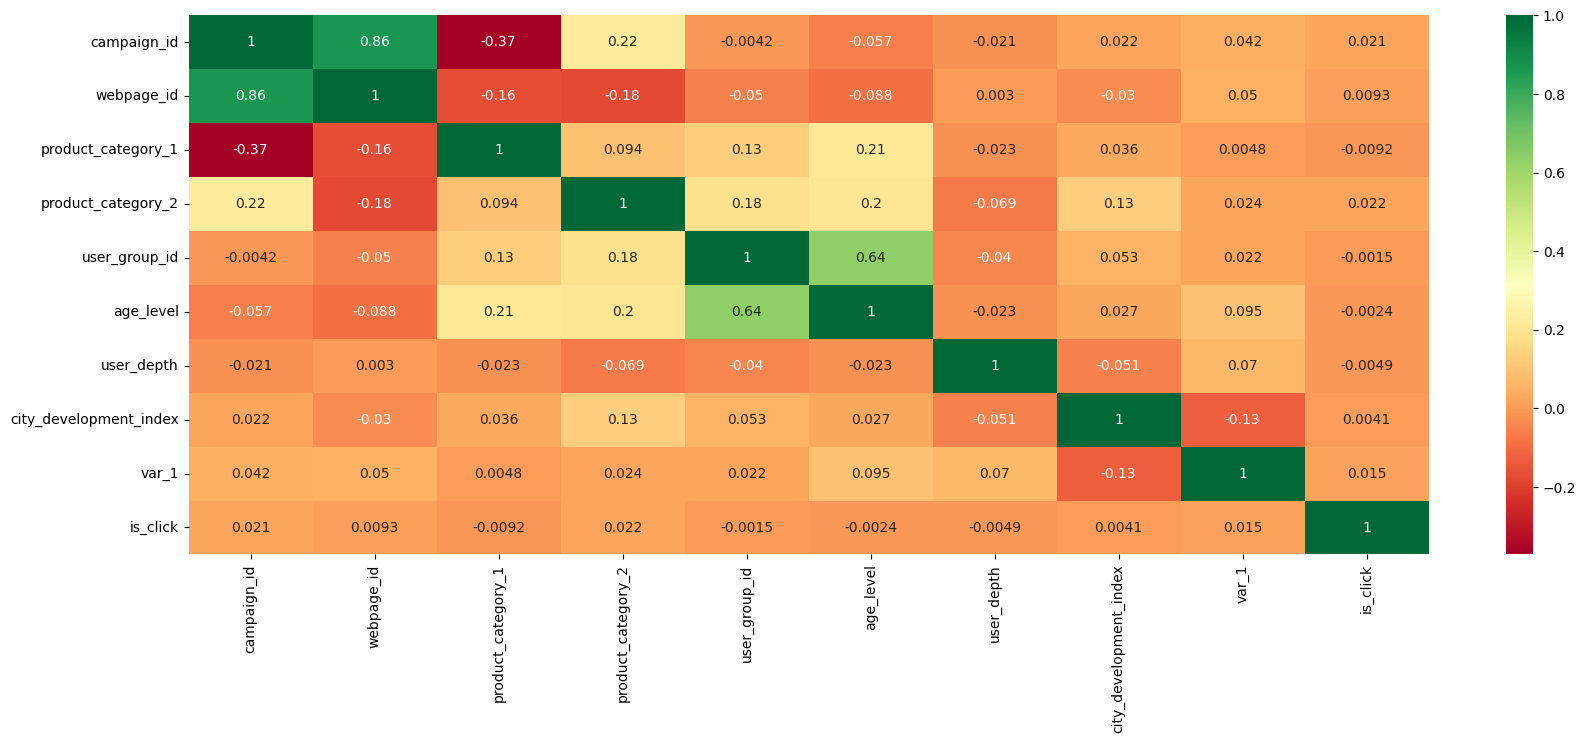

In [15]:
#the heat map of the correlation
plt.figure(figsize=(20,7))
sns.heatmap(data_train.corr(), annot=True, cmap='RdYlGn')

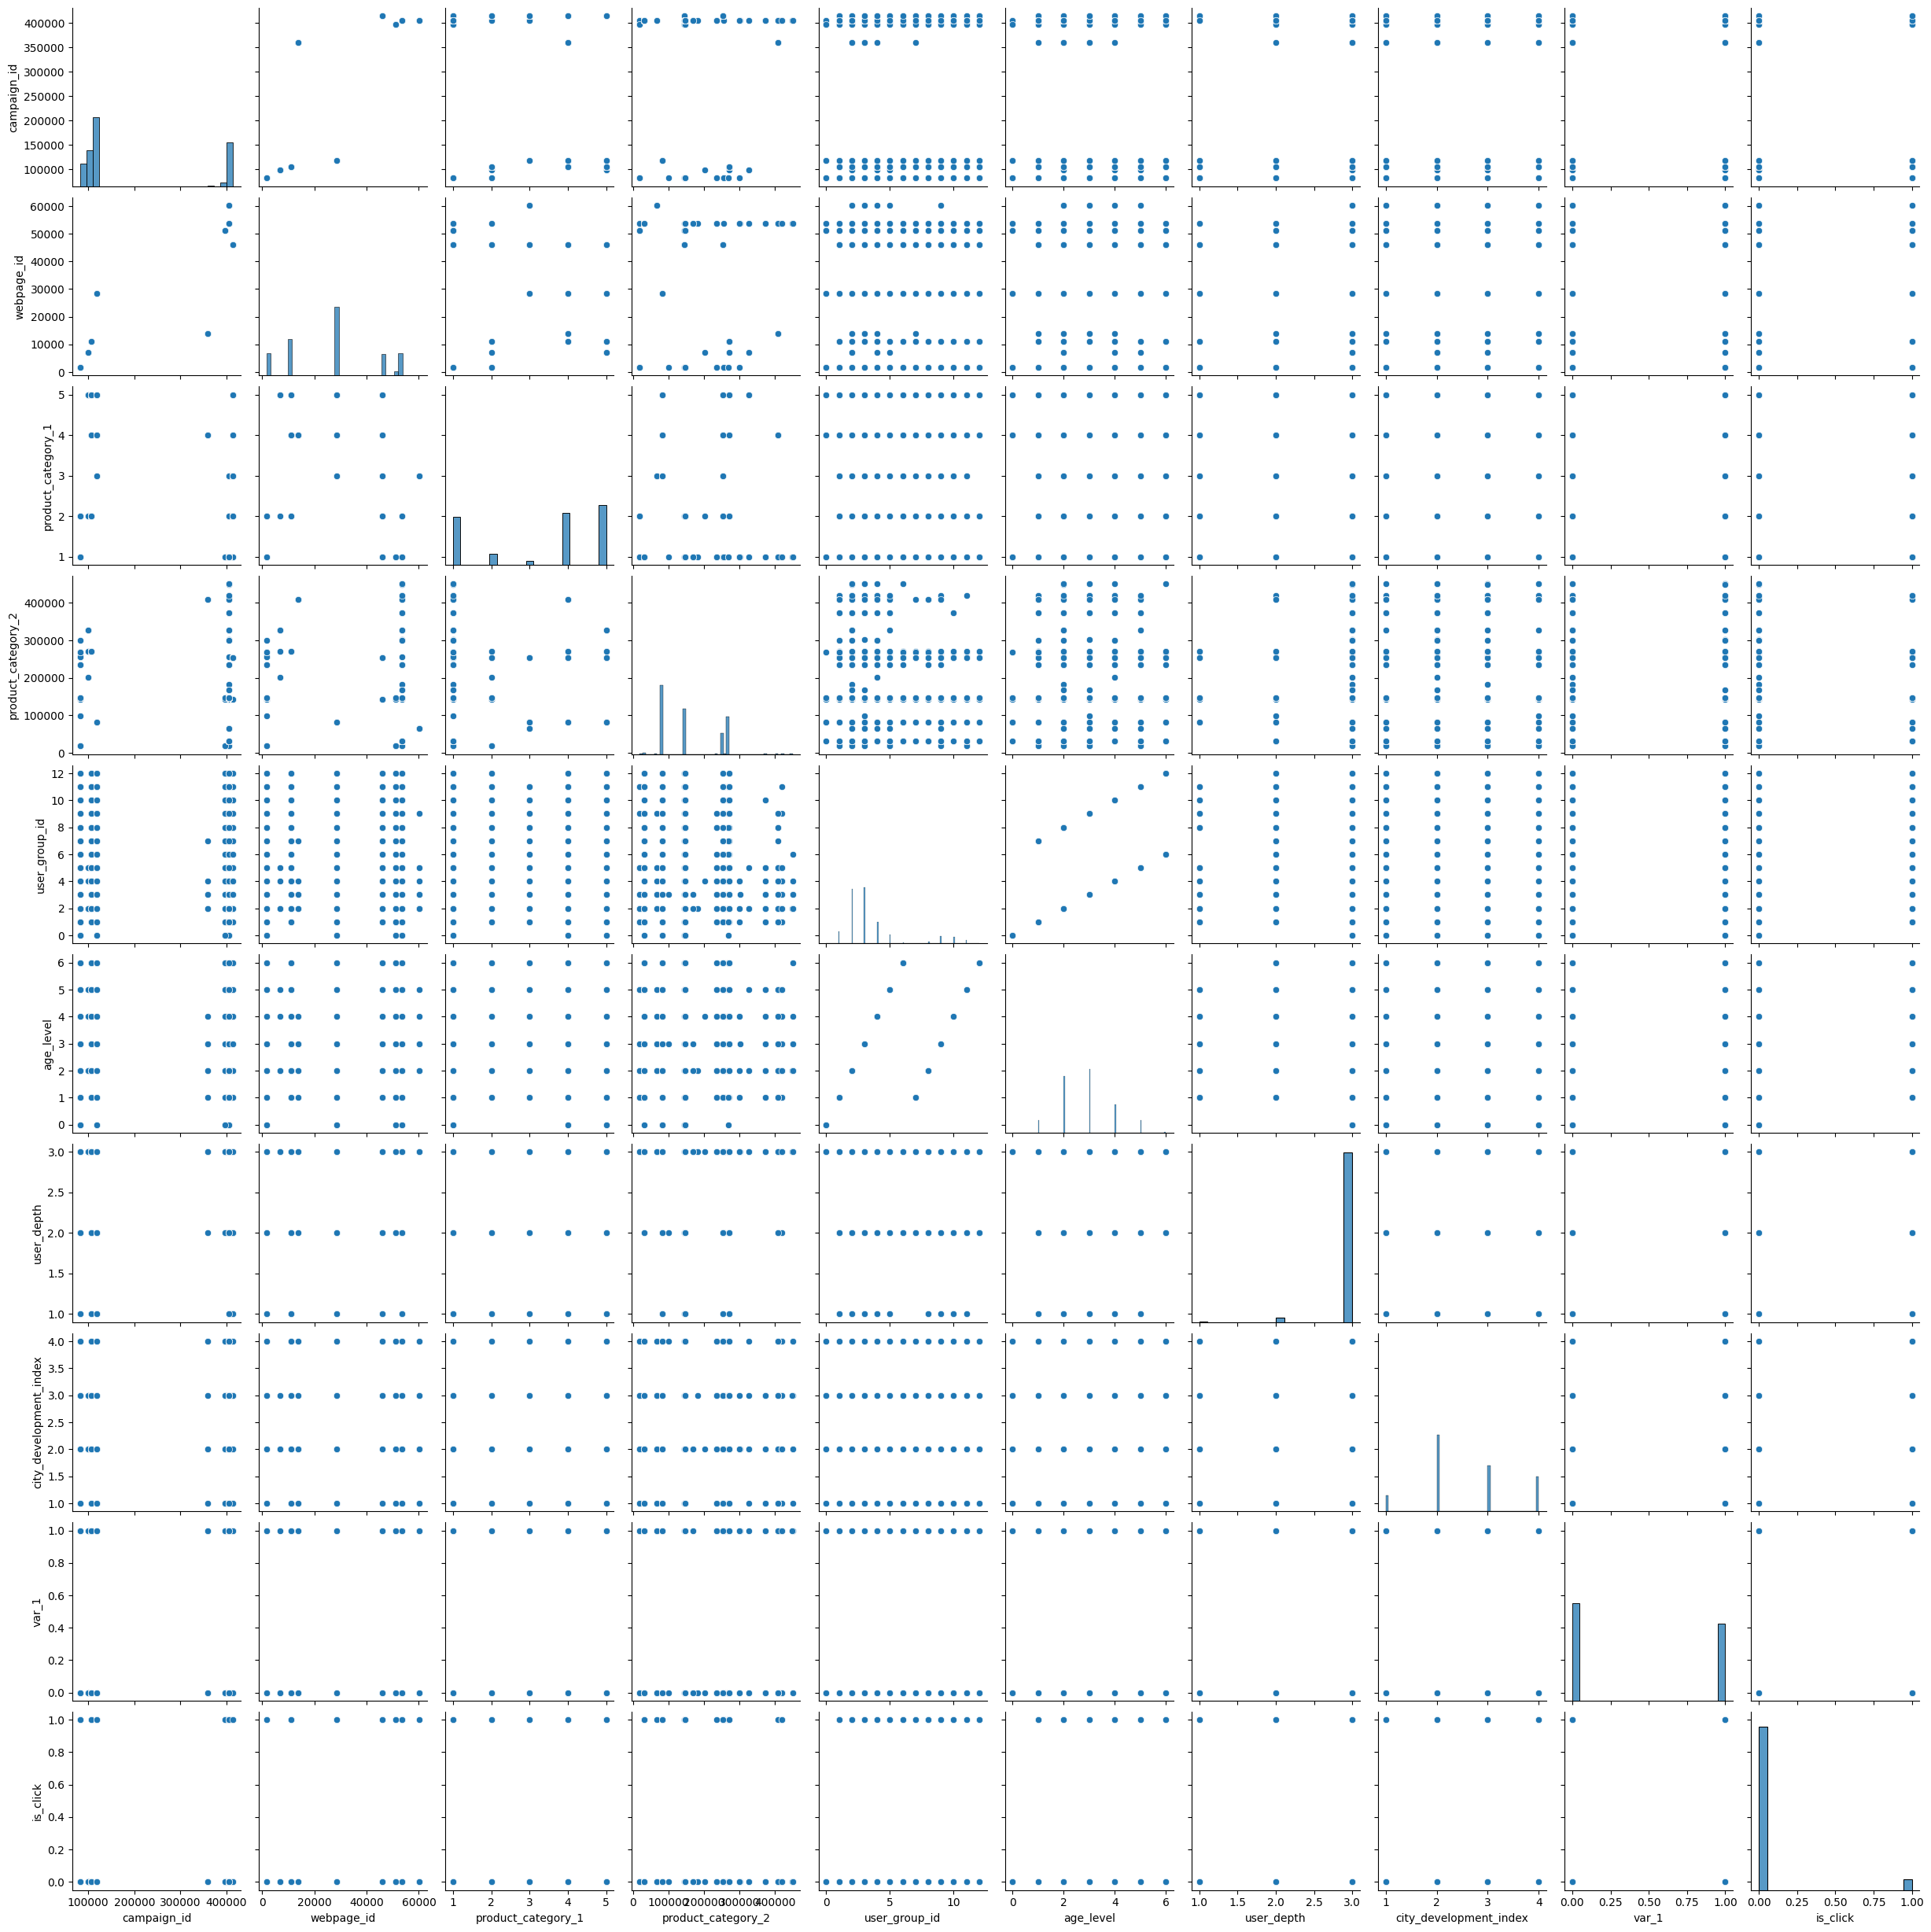

In [16]:
sns.pairplot(data_train) 

## c) Feature Selection

In [17]:
X_train = data_train.iloc[:, 0:-1]
y_train = data_train['is_click']
X_test = data_test.iloc[:, :]

In [18]:
print(X_train.head().to_markdown())

|    | product   |   campaign_id |   webpage_id |   product_category_1 |   product_category_2 |   user_group_id | gender   |   age_level |   user_depth |   city_development_index |   var_1 |
|---:|:----------|--------------:|-------------:|---------------------:|---------------------:|----------------:|:---------|------------:|-------------:|-------------------------:|--------:|
| 17 | I         |        404347 |        53587 |                    1 |               146115 |               9 | Female   |           3 |            3 |                        3 |       1 |
| 21 | I         |        404347 |        53587 |                    1 |               146115 |               2 | Male     |           2 |            3 |                        4 |       1 |
| 42 | I         |        404347 |        53587 |                    1 |               146115 |               2 | Male     |           2 |            3 |                        1 |       1 |
| 48 | H         |        105960 |        110

In [19]:
print(y_train.head().to_markdown())
print(y_train.shape)
print(type(y_train))

|    |   is_click |
|---:|-----------:|
| 17 |          0 |
| 21 |          0 |
| 42 |          0 |
| 48 |          0 |
| 49 |          0 |
(72660,)
<class 'pandas.core.series.Series'>


In [20]:
print(X_test.head().to_markdown())

|    | product   |   campaign_id |   webpage_id |   product_category_1 |   product_category_2 |   user_group_id | gender   |   age_level |   user_depth |   city_development_index |   var_1 |
|---:|:----------|--------------:|-------------:|---------------------:|---------------------:|----------------:|:---------|------------:|-------------:|-------------------------:|--------:|
|  3 | G         |        118601 |        28529 |                    5 |                82527 |               1 | Male     |           1 |            3 |                        1 |       0 |
|  5 | I         |        118601 |        28529 |                    4 |                82527 |               1 | Male     |           1 |            3 |                        4 |       1 |
|  6 | D         |        118601 |        28529 |                    4 |                82527 |               2 | Male     |           2 |            3 |                        2 |       1 |
|  7 | D         |        118601 |        285

## d) Encoding categorical data



In [21]:
X_train = pd.get_dummies(X_train)
X_test= pd.get_dummies(X_test)

numCols1 = X_train.select_dtypes("number").columns
catCols1 = X_train.select_dtypes("object").columns
print(numCols1)

Index(['campaign_id', 'webpage_id', 'product_category_1', 'product_category_2',
       'user_group_id', 'age_level', 'user_depth', 'city_development_index',
       'var_1', 'product_A', 'product_B', 'product_C', 'product_D',
       'product_E', 'product_F', 'product_G', 'product_H', 'product_I',
       'product_J', 'gender_Female', 'gender_Male'],
      dtype='object')


In [22]:
print(X_train.head().to_markdown())
print(X_test.head().to_markdown())


|    |   campaign_id |   webpage_id |   product_category_1 |   product_category_2 |   user_group_id |   age_level |   user_depth |   city_development_index |   var_1 |   product_A |   product_B |   product_C |   product_D |   product_E |   product_F |   product_G |   product_H |   product_I |   product_J |   gender_Female |   gender_Male |
|---:|--------------:|-------------:|---------------------:|---------------------:|----------------:|------------:|-------------:|-------------------------:|--------:|------------:|------------:|------------:|------------:|------------:|------------:|------------:|------------:|------------:|------------:|----------------:|--------------:|
| 17 |        404347 |        53587 |                    1 |               146115 |               9 |           3 |            3 |                        3 |       1 |           0 |           0 |           0 |           0 |           0 |           0 |           0 |           0 |           1 |           0 |         

In [23]:
print(y_train)

17        0
21        0
42        0
48        0
49        0
         ..
463279    0
463280    0
463281    0
463286    0
463287    0
Name: is_click, Length: 72660, dtype: int64


<Axes: >

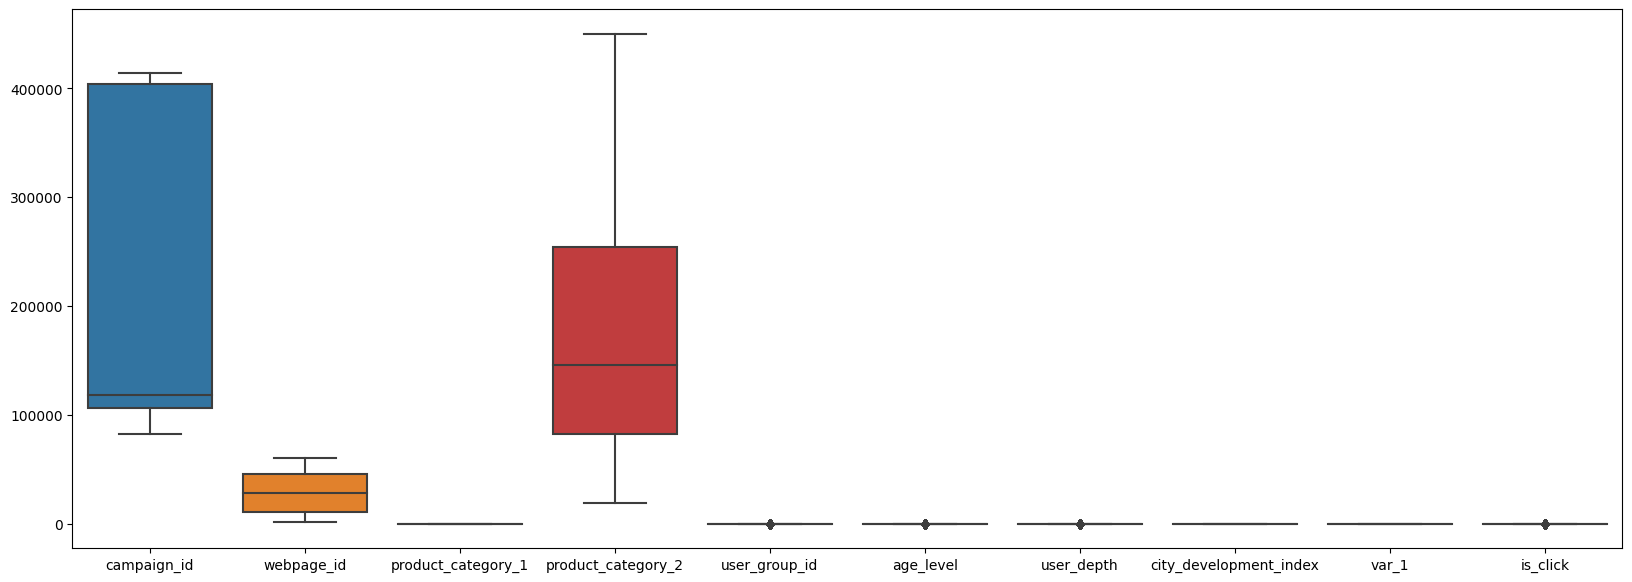

In [24]:
import seaborn as sns
plt.figure(figsize=(20,7))
sns.boxplot(data=data_train)

## e) Feature Scaling

In [25]:

from sklearn import preprocessing

# Preparing for normalizing
min_max_scaler = preprocessing.MinMaxScaler()

# Transform the data to fit minmax processor
#x_scaled = min_max_scaler.fit_transform(X_train)

# Run the normalizer on the dataframe
X_train[['campaign_id', 'webpage_id', 'product_category_1', 'product_category_2',
       'user_group_id', 'age_level', 'user_depth', 'city_development_index',
       'var_1', 'product_A', 'product_B', 'product_C', 'product_D',
       'product_E', 'product_F', 'product_G', 'product_H', 'product_I',
       'product_J', 'gender_Female', 'gender_Male']]=min_max_scaler.fit_transform(X_train[['campaign_id', 'webpage_id', 'product_category_1', 'product_category_2',
       'user_group_id', 'age_level', 'user_depth', 'city_development_index',
       'var_1', 'product_A', 'product_B', 'product_C', 'product_D',
       'product_E', 'product_F', 'product_G', 'product_H', 'product_I',
       'product_J', 'gender_Female', 'gender_Male']])

X_test[['campaign_id', 'webpage_id', 'product_category_1', 'product_category_2',
       'user_group_id', 'age_level', 'user_depth', 'city_development_index',
       'var_1', 'product_A', 'product_B', 'product_C', 'product_D',
       'product_E', 'product_F', 'product_G', 'product_H', 'product_I',
       'product_J', 'gender_Female', 'gender_Male']]=min_max_scaler.fit_transform(X_test[['campaign_id', 'webpage_id', 'product_category_1', 'product_category_2',
       'user_group_id', 'age_level', 'user_depth', 'city_development_index',
       'var_1', 'product_A', 'product_B', 'product_C', 'product_D',
       'product_E', 'product_F', 'product_G', 'product_H', 'product_I',
       'product_J', 'gender_Female', 'gender_Male']])

In [26]:
print(X_train.head().to_markdown())

|    |   campaign_id |   webpage_id |   product_category_1 |   product_category_2 |   user_group_id |   age_level |   user_depth |   city_development_index |   var_1 |   product_A |   product_B |   product_C |   product_D |   product_E |   product_F |   product_G |   product_H |   product_I |   product_J |   gender_Female |   gender_Male |
|---:|--------------:|-------------:|---------------------:|---------------------:|----------------:|------------:|-------------:|-------------------------:|--------:|------------:|------------:|------------:|------------:|------------:|------------:|------------:|------------:|------------:|------------:|----------------:|--------------:|
| 17 |     0.970461  |     0.885302 |                    0 |             0.295466 |        0.75     |    0.5      |            1 |                 0.666667 |       1 |           0 |           0 |           0 |           0 |           0 |           0 |           0 |           0 |           1 |           0 |         

In [27]:
print(X_train.columns)

Index(['campaign_id', 'webpage_id', 'product_category_1', 'product_category_2',
       'user_group_id', 'age_level', 'user_depth', 'city_development_index',
       'var_1', 'product_A', 'product_B', 'product_C', 'product_D',
       'product_E', 'product_F', 'product_G', 'product_H', 'product_I',
       'product_J', 'gender_Female', 'gender_Male'],
      dtype='object')


<Axes: >

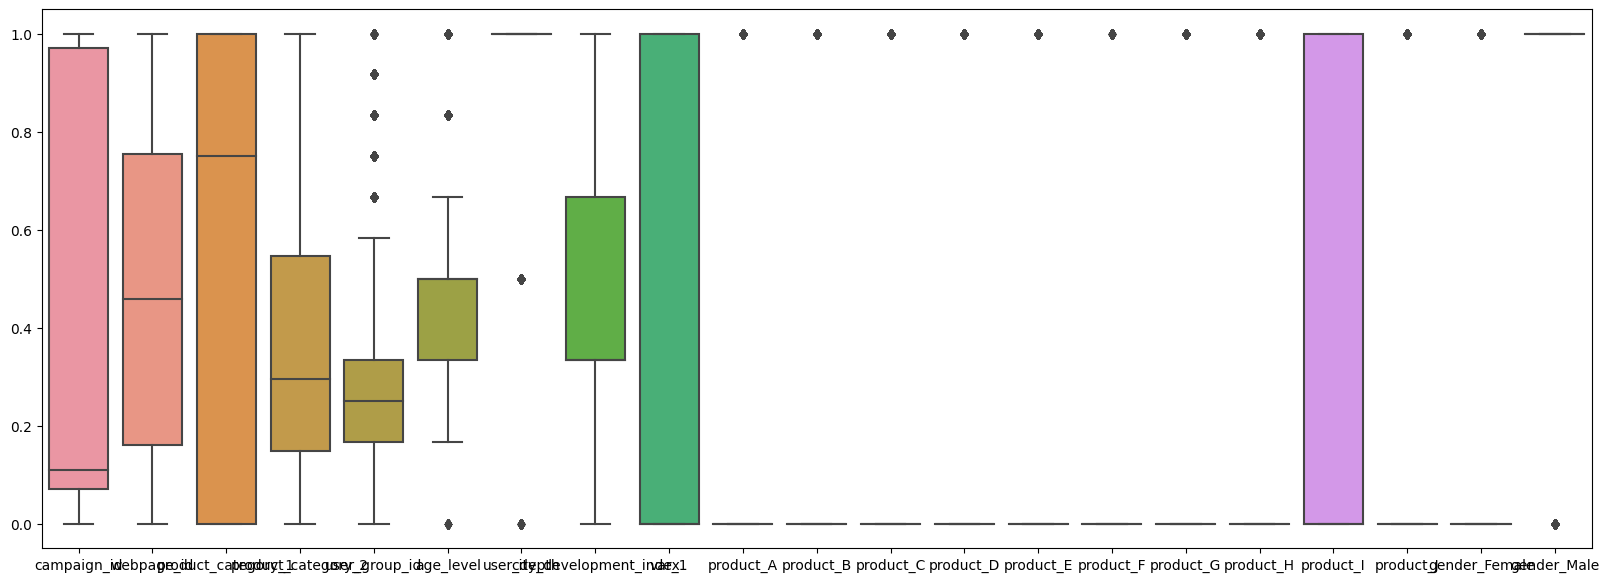

In [28]:
plt.figure(figsize=(20,7))
sns.boxplot(data=X_train)

# 2. Logistic Regression

Logistic regression is a statistical method used for binary classification, which involves predicting the probability of an event occurring or not occurring based on certain input features. It is called "logistic" because it uses a logistic function, also known as a sigmoid function, to model the relationship between the input features and the binary outcome.

In logistic regression, the goal is to find the best-fitting model parameters that maximize the likelihood of the observed data. The model parameters are estimated using a process called maximum likelihood estimation (MLE). The logistic function transforms the output of a linear equation into a probability value between 0 and 1, representing the probability of the binary outcome occurring.

The input features in logistic regression can be continuous, categorical, or a combination of both. The model parameters, also known as coefficients or weights, are estimated using training data, and the model can then be used to make predictions on new, unseen data. The predicted probabilities can be thresholded to obtain binary predictions, such as classifying whether an email is spam or not spam, whether a customer will make a purchase or not, or whether a patient has a certain medical condition or not.

Logistic regression is widely used in machine learning, statistics, and various fields, such as healthcare, marketing, finance, and social sciences, for binary classification tasks where the outcome of interest is binary or dichotomous. It is a relatively simple and interpretable method, making it a popular choice for many practical applications. However, it assumes a linear relationship between the input features and the binary outcome, and it may not perform well in cases where the relationship is highly nonlinear or when dealing with imbalanced data.

In [29]:
from sklearn.linear_model import LogisticRegression
classifier= LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)  

LogisticRegression(random_state=0)

In [30]:
y_test_pred=classifier.predict(X_test)

In [31]:
print(y_test_pred[0]) #output of the first prediction
#as there is no y_test we cant predict the accuracy of X_test

0


**What are the data types? (Only numeric and categorical)** <br>


In [32]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72660 entries, 17 to 463287
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   product                 72660 non-null  object 
 1   campaign_id             72660 non-null  int64  
 2   webpage_id              72660 non-null  int64  
 3   product_category_1      72660 non-null  int64  
 4   product_category_2      72660 non-null  float64
 5   user_group_id           72660 non-null  float64
 6   gender                  72660 non-null  object 
 7   age_level               72660 non-null  float64
 8   user_depth              72660 non-null  float64
 9   city_development_index  72660 non-null  float64
 10  var_1                   72660 non-null  int64  
 11  is_click                72660 non-null  int64  
dtypes: float64(5), int64(5), object(2)
memory usage: 7.2+ MB



**Are there missing values**? <br>
Yes, we have missing values in both train data and test data


In [33]:
print("Missing values in Train Dataset")
print(missing_val_train)
print("*"*80)
print("Missing values in Test Dataset")
print(missing_val_test)

Missing values in Train Dataset
product                        0
campaign_id                    0
webpage_id                     0
product_category_1             0
product_category_2        365854
user_group_id              18243
gender                     18243
age_level                  18243
user_depth                 18243
city_development_index    125129
var_1                          0
is_click                       0
dtype: int64
********************************************************************************
Missing values in Test Dataset
product                       0
campaign_id                   0
webpage_id                    0
product_category_1            0
product_category_2        76171
user_group_id              5684
gender                     5684
age_level                  5684
user_depth                 5684
city_development_index    34609
var_1                         0
dtype: int64


<b>Let's c the likely distributions of the numeric variables</b>
<br>
By looking at the graphs below we see that the distribution is mostly skewed




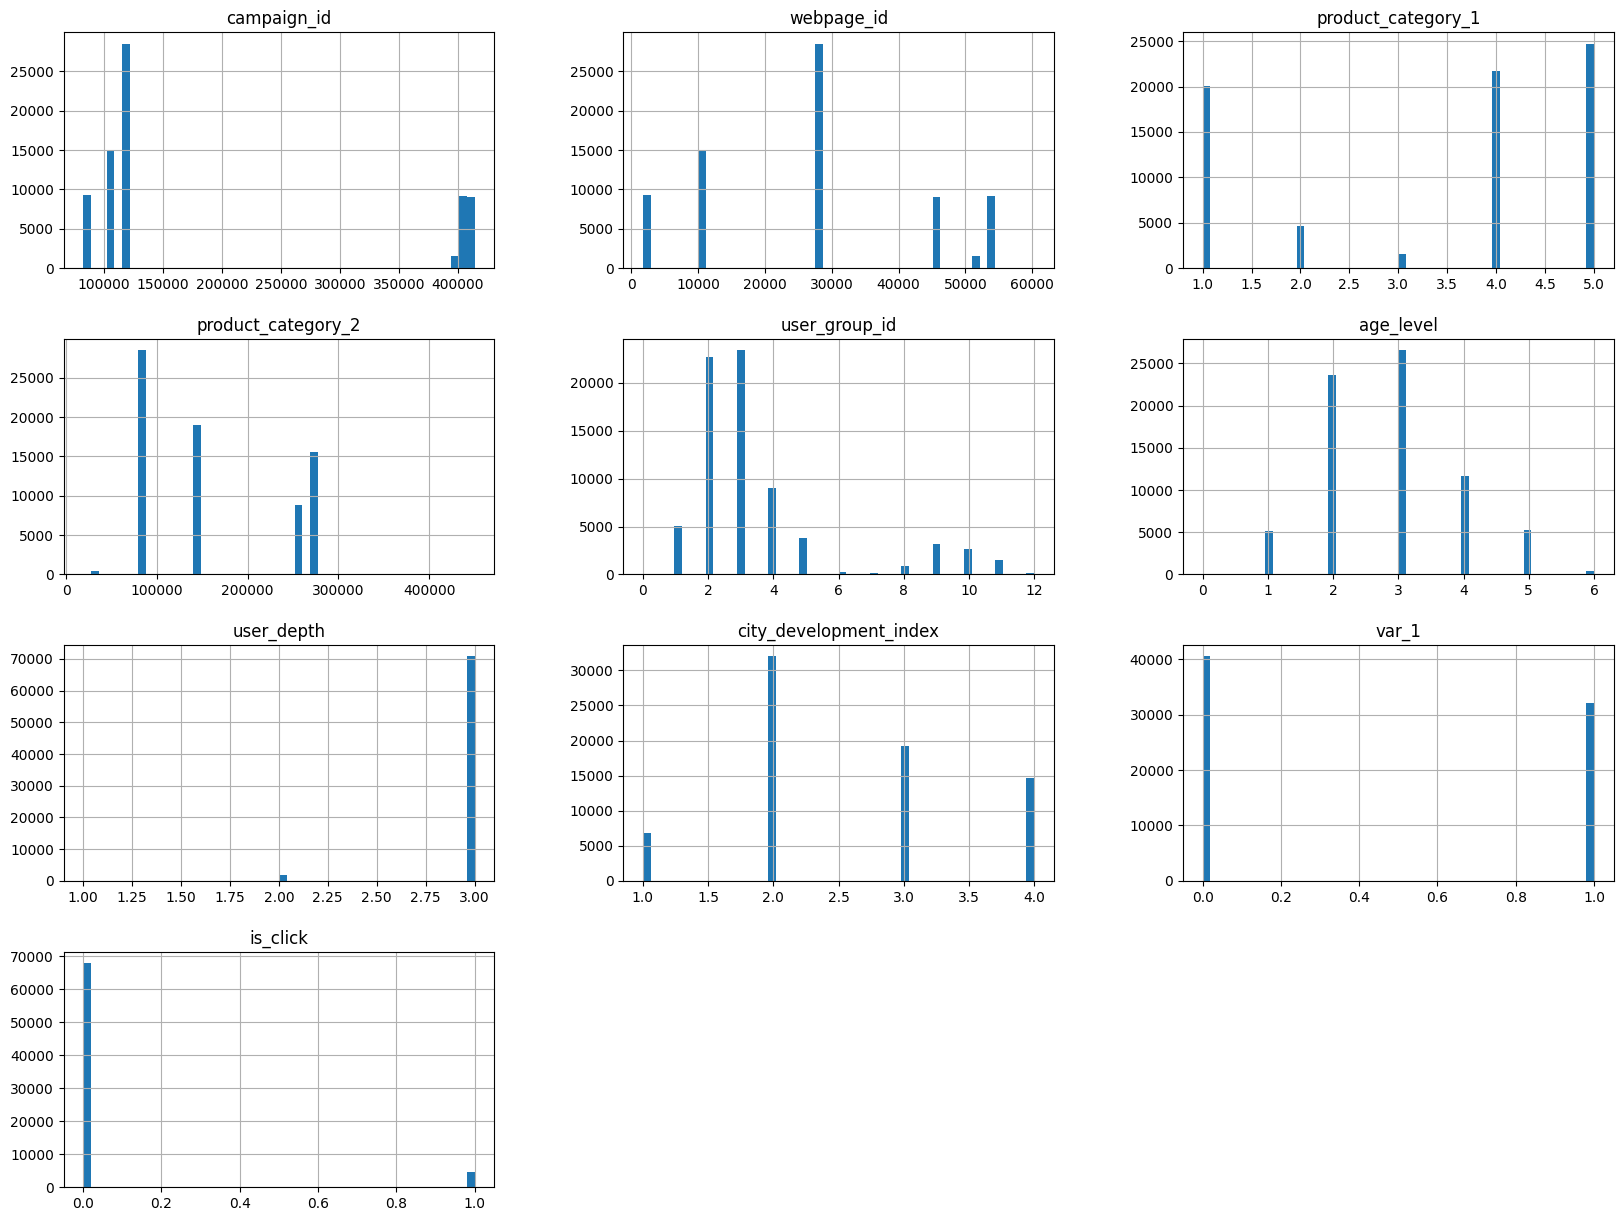

In [34]:
# Select only the numeric variables
numeric_vars = data_train.select_dtypes(include=['float64', 'int64'])

# Plot the histograms
numeric_vars.hist(bins=50, figsize=(20,15))
plt.show()


**Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)**


In [35]:
# Method1

import statsmodels.api as sm

y_train = np.array(y_train, dtype=float)
dependent_var =y_train #data[['satisfaction_neutral or dissatisfied',

      # 'satisfaction_satisfied']]
independent_vars = X_train[['campaign_id', 'webpage_id', 'product_category_1', 'product_category_2',
       'user_group_id', 'age_level', 'user_depth', 'city_development_index',
       'var_1', 'product_A', 'product_B', 'product_C', 'product_D',
       'product_E', 'product_F', 'product_G', 'product_H', 'product_I',
       'product_J', 'gender_Female', 'gender_Male']]

# Fitting the OLS model
model = sm.OLS(dependent_var, independent_vars).fit()
p_values = model.summary2().tables[1]['P>|t|']
print(p_values.round(4))


campaign_id               0.0413
webpage_id                0.3355
product_category_1        0.3107
product_category_2        0.7936
user_group_id             0.6401
age_level                 0.6123
user_depth                0.1755
city_development_index    0.3196
var_1                     0.0003
product_A                 0.7029
product_B                 0.6998
product_C                 0.4068
product_D                 0.7282
product_E                 0.0092
product_F                 0.4323
product_G                 0.4691
product_H                 0.0546
product_I                 0.4713
product_J                 0.0059
gender_Female             0.9803
gender_Male               0.0000
Name: P>|t|, dtype: float64


In [36]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     11.71
Date:                Mon, 10 Apr 2023   Prob (F-statistic):           1.29e-36
Time:                        01:23:05   Log-Likelihood:                -248.53
No. Observations:               72660   AIC:                             537.1
Df Residuals:                   72640   BIC:                             720.9
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
campaign_id                0

In [37]:
# Method2
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k=5)
fit = selector.fit(independent_vars, dependent_var)

# Get the mask of selected features
mask = fit.get_support()

# Get the column names of selected features
selected_features = X_train[['campaign_id', 'webpage_id', 'product_category_1', 'product_category_2',
       'user_group_id', 'age_level', 'user_depth', 'city_development_index',
       'var_1', 'product_A', 'product_B', 'product_C', 'product_D',
       'product_E', 'product_F', 'product_G', 'product_H', 'product_I',
       'product_J', 'gender_Female', 'gender_Male']].columns[mask]

print("Selected Features:", selected_features)


Selected Features: Index(['campaign_id', 'product_A', 'product_E', 'product_G', 'product_H'], dtype='object')


In [38]:
# Method3
#Understanding the important features 
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(classifier, random_state=1).fit(independent_vars, dependent_var)
eli5.show_weights(perm,top=None, feature_names = ['campaign_id', 'webpage_id', 'product_category_1', 'product_category_2',
       'user_group_id', 'age_level', 'user_depth', 'city_development_index',
       'var_1', 'product_A', 'product_B', 'product_C', 'product_D',
       'product_E', 'product_F', 'product_G', 'product_H', 'product_I',
       'product_J', 'gender_Female', 'gender_Male'])

By SelectKBest we see that the 5 most important feature columns are:

gender_Male
<br>
product_A
<br>
webpage_id
<br>
product_category_1
<br>
product_category_2





**Let's see missing data in independent variables** <br>Yes, In both the datasets train and test we have missing values




In [39]:
print("Missing values in Train Dataset")
print(missing_val_train)
print("*"*80)
print("Missing values in Test Dataset")
print(missing_val_test)


Missing values in Train Dataset
product                        0
campaign_id                    0
webpage_id                     0
product_category_1             0
product_category_2        365854
user_group_id              18243
gender                     18243
age_level                  18243
user_depth                 18243
city_development_index    125129
var_1                          0
is_click                       0
dtype: int64
********************************************************************************
Missing values in Test Dataset
product                       0
campaign_id                   0
webpage_id                    0
product_category_1            0
product_category_2        76171
user_group_id              5684
gender                     5684
age_level                  5684
user_depth                 5684
city_development_index    34609
var_1                         0
dtype: int64



**Do the training and test sets have the same data**<br>

In [40]:
check = pd.merge(
    data_train,
    data_test,
    on=['product', 'campaign_id', 'webpage_id', 'product_category_1',
       'product_category_2', 'user_group_id', 'gender', 'age_level',
       'user_depth', 'city_development_index', 'var_1',],
    how="left",
    indicator="Exist",
)
check["Exist"] = np.where(check.Exist == "both", True, False)
print(
    check["Exist"].value_counts()
)  # 

True     8793518
False       9441
Name: Exist, dtype: int64


True indicates the data is similar 

**In the predictor variables independent of all the other predictor variables?**

Yes, as the majority of the data points are categorical, we can observe from the sns pairplot that there is some collinearity between the characteristics and that they are largely independent of one another.

**Which predictor variables are the most important?**





City_development_index and User_group_id are most important

In [41]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor

# Train the Random Forest Regressor
model = RandomForestRegressor()
model.fit(X_train[['campaign_id', 'webpage_id', 'product_category_1', 'product_category_2',
       'user_group_id', 'age_level', 'user_depth', 'city_development_index',
       'var_1', 'product_A', 'product_B', 'product_C', 'product_D',
       'product_E', 'product_F', 'product_G', 'product_H', 'product_I',
       'product_J', 'gender_Female', 'gender_Male']], y_train)

# Get the feature importances
importances = model.feature_importances_

# Sort the feature importances in descending order
sorted_idx = np.argsort(importances)[::-1]
li=['campaign_id', 'webpage_id', 'product_category_1', 'product_category_2',
       'user_group_id', 'age_level', 'user_depth', 'city_development_index',
       'var_1', 'product_A', 'product_B', 'product_C', 'product_D',
       'product_E', 'product_F', 'product_G', 'product_H', 'product_I',
       'product_J', 'gender_Female', 'gender_Male']
# Print the feature names and their importances
for i in sorted_idx:
    print(f"{li[i]}: {importances[i]}")


city_development_index: 0.22364885457399056
user_group_id: 0.15877388035274617
age_level: 0.12659970908915524
var_1: 0.07169327659177302
user_depth: 0.06051515077622534
product_category_2: 0.04942742538570883
product_category_1: 0.044813628916214425
product_H: 0.03617913190099689
webpage_id: 0.03544798584087125
campaign_id: 0.030782522682341426
product_D: 0.023391870982478847
product_C: 0.021750436270008656
product_I: 0.019722255472769356
product_B: 0.01886670553014282
gender_Male: 0.018004990651147898
gender_Female: 0.0176578775579541
product_G: 0.015842693397519383
product_E: 0.011939092074982147
product_A: 0.00996574447554309
product_J: 0.0032898493833620115
product_F: 0.0016869180940686133


**Do the ranges of the predictor variables make sense?** <br>
The means for Campaign ID,WebPageID and ProductCaregory2 are very different. However, it is evident that data is scattered broadly.


In [42]:
print(data_train.describe().to_markdown())

|       |   campaign_id |   webpage_id |   product_category_1 |   product_category_2 |   user_group_id |   age_level |   user_depth |   city_development_index |        var_1 |      is_click |
|:------|--------------:|-------------:|---------------------:|---------------------:|----------------:|------------:|-------------:|-------------------------:|-------------:|--------------:|
| count |         72660 |      72660   |          72660       |              72660   |     72660       | 72660       | 72660        |             72660        | 72660        | 72660         |
| mean  |        190336 |      27330   |              3.36497 |             160802   |         3.54404 |     2.85428 |     2.97329  |                 2.57509  |     0.442623 |     0.0631159 |
| std   |        133933 |      16780.7 |              1.64119 |              79722.7 |         2.40084 |     1.04343 |     0.167031 |                 0.912872 |     0.4967   |     0.243173  |
| min   |         82320 |       1734   |

**What are the distributions of the predictor variables**

Most of the predictor variables in the dataset are categorical in nature, and after performing the histograms, we can see that most of the predictor variables have skewed distributions. Finally, by viewing the Q-Q plots, we can see that most of the data are not continuous

<b>Remove outliers and keep outliers (does if have an effect of the final predictive model)?</b>



In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score, mean_squared_error
reg = LogisticRegression()
X1 = data_train[['product_category_1', 'webpage_id', 'user_depth', 'is_click', 'campaign_id', 'user_group_id', 'city_development_index', 'var_1', 'product_category_2', 'age_level']]
y1 = data_train[['is_click']]
X1_train_data, X1_test_data, y1_train_data, y1_test_data = train_test_split(X1, y1, test_size=0.2, random_state=42, stratify=y1)
reg.fit(X1_train_data, y1_train_data)
threshold = 0.5
reg.predict(X1_test_data)
Z = reg.predict(X1_test_data)
rms = mean_squared_error(y1_test_data, Z , squared=False);
out1=reg.score(X1_test_data, y1_test_data)
print(out1)

0.9361409303605835


In [44]:

a1 = data_train.quantile(0.05)
a3 = data_train.quantile(0.95)

final_data = data_train[~((data_train < (a1)) |(data_train > (a3))).any(axis=1)]

In [45]:
X2 = final_data[['product_category_1', 'webpage_id', 'user_depth', 'is_click', 'campaign_id', 'user_group_id', 'city_development_index', 'var_1', 'product_category_2', 'age_level']]
y2 = final_data[['is_click']]

X2_train_data, X2_test_data, y2_train_data, y2_test_data = train_test_split(X2, y2, test_size=0.2, random_state=42, stratify=y2)
reg.fit(X2_train_data, y2_train_data)

LogisticRegression()

In [46]:
threshold = 0.5
reg.predict(X2_test_data)
Z2 = reg.predict(X2_test_data)
out2=reg.score(X2_test_data, y2_test_data)
print(out2)

0.9370021194182563


Removing the outliners didnt add much to the acccuracy

In [47]:
print('Diff:',out2-out1)

Diff: 0.0008611890576727399


In [48]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(classification_report(y1_test_data,Z))
print(confusion_matrix(y1_test_data,Z))
print("Accuracy 1: ",out1)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     13615
           1       0.00      0.00      0.00       917

    accuracy                           0.94     14532
   macro avg       0.47      0.50      0.48     14532
weighted avg       0.88      0.94      0.91     14532

[[13604    11]
 [  917     0]]
Accuracy 1:  0.9361409303605835


In [49]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 
print(classification_report(y2_test_data,Z2))
print(confusion_matrix(y2_test_data,Z2))
print("Accuracy 2: ",out2)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     12821
           1       0.00      0.00      0.00       862

    accuracy                           0.94     13683
   macro avg       0.47      0.50      0.48     13683
weighted avg       0.88      0.94      0.91     13683

[[12821     0]
 [  862     0]]
Accuracy 2:  0.9370021194182563


# H2O AutoML<br>
H2O.ai is a leading open-source machine learning and artificial intelligence (AI) platform that offers an AutoML (Automated Machine Learning) solution. AutoML is a process that automates the selection, configuration, and training of machine learning models, making it easier for non-experts to build highly accurate predictive models without needing in-depth knowledge of machine learning algorithms or programming skills.

H2O's AutoML platform is designed to streamline the end-to-end process of building and deploying machine learning models. It offers a wide range of functionalities, including data preparation, feature engineering, model selection, hyperparameter tuning, and model interpretation. H2O's AutoML automates many of the time-consuming tasks involved in the machine learning workflow, such as data preprocessing, model selection, and hyperparameter tuning, allowing data scientists and machine learning practitioners to focus on higher-level tasks, such as domain expertise and interpreting model results.

H2O's AutoML supports a variety of machine learning techniques, including supervised and unsupervised learning, such as regression, classification, clustering, and anomaly detection. It also includes advanced features such as ensemble learning, stacking, and deep learning. H2O's AutoML is highly scalable and can be used on large datasets, making it suitable for enterprise-level machine learning applications.

Overall, H2O's AutoML offers an easy-to-use, scalable, and powerful solution for automating the machine learning model building process, making it accessible to a wide range of users, including data scientists, business analysts, and domain experts, to build accurate predictive models without the need for extensive machine learning expertise.

## Creating predictive models and interpret them using AutoML library like H2O

In [50]:
xtrain=X_train[['campaign_id', 'webpage_id', 'product_category_1', 'product_category_2',
       'user_group_id', 'age_level', 'user_depth', 'city_development_index',
       'var_1', 'product_A', 'product_B', 'product_C', 'product_D',
       'product_E', 'product_F', 'product_G', 'product_H', 'product_I',
       'product_J', 'gender_Female', 'gender_Male']]
ytrain_pd=pd.DataFrame(y_train, columns=['is_click'])

In [51]:
print(len(xtrain))
print(len(ytrain_pd))

72660
72660


In [52]:
xtrain.reset_index(drop=True, inplace=True)
ytrain_pd.reset_index(drop=True, inplace=True)

In [53]:
#concatenates 'xtrain' and 'ytrain_pd' and converts the resulting pandas dataframe to a H2OFrame object.
train_concat=pd.concat([xtrain,ytrain_pd],axis=1)
print(train_concat.head().to_markdown())
print(len(train_concat))
print("*"*300)
dtrain_h2o = h2o.H2OFrame(train_concat)
print(dtrain_h2o)
print(type(dtrain_h2o))

|    |   campaign_id |   webpage_id |   product_category_1 |   product_category_2 |   user_group_id |   age_level |   user_depth |   city_development_index |   var_1 |   product_A |   product_B |   product_C |   product_D |   product_E |   product_F |   product_G |   product_H |   product_I |   product_J |   gender_Female |   gender_Male |   is_click |
|---:|--------------:|-------------:|---------------------:|---------------------:|----------------:|------------:|-------------:|-------------------------:|--------:|------------:|------------:|------------:|------------:|------------:|------------:|------------:|------------:|------------:|------------:|----------------:|--------------:|-----------:|
|  0 |     0.970461  |     0.885302 |                    0 |             0.295466 |        0.75     |    0.5      |            1 |                 0.666667 |       1 |           0 |           0 |           0 |           0 |           0 |           0 |           0 |           0 |           

In [54]:
print(train_concat.isnull().sum())

campaign_id               0
webpage_id                0
product_category_1        0
product_category_2        0
user_group_id             0
age_level                 0
user_depth                0
city_development_index    0
var_1                     0
product_A                 0
product_B                 0
product_C                 0
product_D                 0
product_E                 0
product_F                 0
product_G                 0
product_H                 0
product_I                 0
product_J                 0
gender_Female             0
gender_Male               0
is_click                  0
dtype: int64


In [55]:
#dropping unwanted columns
y = 'is_click'
xtrain_h2o = dtrain_h2o
xtrain_h2o = xtrain_h2o.drop(y)
x=xtrain_h2o.col_names #columns name
print(x)

['campaign_id', 'webpage_id', 'product_category_1', 'product_category_2', 'user_group_id', 'age_level', 'user_depth', 'city_development_index', 'var_1', 'product_A', 'product_B', 'product_C', 'product_D', 'product_E', 'product_F', 'product_G', 'product_H', 'product_I', 'product_J', 'gender_Female', 'gender_Male']


In the below code I am using the H2OAutoML class from the H2O Python package to automatically build and tune machine learning models. Here is what each of the parameters in the constructor means:

**max_models**: This parameter specifies the maximum number of models to be built by the H2OAutoML object. In this case, the value is set to 3, which means that the H2OAutoML object will build at most 3 models.

**seed**: This parameter sets the random seed used by H2O to ensure that the results are reproducible. In this case, the value is set to 10.

**verbosity**: This parameter controls the amount of logging output from the H2OAutoML object. The "debug" level provides the most detailed logging information.

nfolds: This parameter specifies the number of cross-validation folds to be used during model training. In this case, the value is set to 0, which means that no cross-validation will be performed. If this parameter is set to a positive integer, the H2OAutoML object will perform cross-validation to evaluate the performance of the models.

In [56]:
#splits the H2OFrame object into two frames named 'train' and 'test' with a ratio of 70:30
train, test = dtrain_h2o.split_frame(ratios = [.7], seed = 10)
print(train)


  campaign_id    webpage_id    product_category_1    product_category_2    user_group_id    age_level    user_depth    city_development_index    var_1    product_A    product_B    product_C    product_D    product_E    product_F    product_G    product_H    product_I    product_J    gender_Female    gender_Male    is_click
    0.970461       0.885302                     0              0.295466         0.166667     0.333333             1                  0               1            0            0            0            0            0            0            0            0            1            0                0              1           0
    0.0712415      0.159652                     1              0.58463          0.333333     0.666667             1                  0.333333        0            0            0            0            0            0            0            0            1            0            0                0              1           0
    0.970461       0.8853

In [57]:
aml = H2OAutoML(max_models=3,seed=10,verbosity="debug",nfolds=0)
aml.train(x=x, y=y, training_frame=train)

AutoML progress: |
01:23:31.911: Project: AutoML_1_20230410_12331
01:23:31.914: Cross-validation disabled by user: no fold column nor nfolds > 1.
01:23:31.914: Setting stopping tolerance adaptively based on the training frame: 0.004433728864222412
01:23:31.914: Build control seed: 10
01:23:31.927: Since cross-validation is disabled, and validation frame(s) were not provided, automatically split the training data into training, validation frame(s) in the ratio 90/10/0.
01:23:32.490: training frame: Frame key: AutoML_1_20230410_12331_training_py_2_sid_8d1b    cols: 22    rows: 45665  chunks: 3    size: 814348  checksum: -7089637182030117772
01:23:32.527: validation frame: Frame key: AutoML_1_20230410_12331_validation_py_2_sid_8d1b    cols: 22    rows: 5205  chunks: 3    size: 98368  checksum: 8701836108949973509
01:23:32.527: leaderboard frame: Frame key: AutoML_1_20230410_12331_validation_py_2_sid_8d1b    cols: 22    rows: 5205  chunks: 3    size: 98368  checksum: 8701836108949973509
01

Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_1_AutoML_1_20230410_12331


GLM Model: summary
    family    link      regularization              lambda_search                                                               number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  --------------------------  --------------------------------------------------------------------------  ----------------------------  -----------------------------  ----------------------  ----------------------------------------------
    gaussian  identity  Ridge ( lambda = 0.05358 )  nlambda = 30, lambda.max = 0.5801, lambda.min = 0.05358, lambda.1se = -1.0  21                            21                             6                       AutoML_1_20230410_12331_training_py_2_sid_8d1b

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.05831259861960237
RMSE: 0.24148001701921915
MAE: 0.1166393781288561
RMSLE: 0.16828274643394453
Mean Residual Deviance: 0.05831259861960237
R^2: 0.0028210557233437905
Null degrees of freedom: 45664
Residual degrees of freedom: 45643
Null deviance: 2670.3781013912117
Residual deviance: 2662.844815964142
AIC: -139.40185176297007

ModelMetricsRegressionGLM: glm
** Reported on validation data. **

MSE: 0.05848499485496902
RMSE: 0.24183671113991154
MAE: 0.11677522226767281
RMSLE: 0.16847402443079332
Mean Residual Deviance: 0.05848499485496902
R^2: 0.0038207173502489145
Null degrees of freedom: 5204
Residual degrees of freedom: 5183
Null deviance: 305.58230553512806
Residual deviance: 304.41439822011375
AIC: 40.232914954755955

Scoring History: 
    timestamp            duration    iteration    lambda    predictors    deviance_train    deviance_test    alpha    iterations    training_rmse        training_deviance    training_mae        training_r2            validation_rmse      validation_deviance    validation_mae       validation_r2
--  -------------------  ----------  -----------  --------  ------------  ----------------  ---------------  -------  ------------  -------------------  -------------------  ------------------  ---------------------  -------------------  ---------------------  -------------------  ---------------------
    2023-04-10 01:23:37  0.000 sec   1            0.58      22            0.0583303         0.0585223        0
    2023-04-10 01:23:37  0.033 sec   2            0.36      22            0.0583215         0.0585069        0
    2023-04-10 01:23:37  0.065 sec   3            0.22      22            0.0583167         0.0584969        0
    2023-04-10 01:23:37  0.098 sec   4            0.14      22            0.0583143         0.0584909        0
    2023-04-10 01:23:37  0.127 sec   5            0.086     22            0.0583131         0.0584872        0        5             0.24148001701921915  0.05831259861960237  0.1166393781288561  0.0028210557233437905  0.24183671113991154  0.05848499485496902    0.11677522226767281  0.0038207173502489145
    2023-04-10 01:23:37  0.153 sec   6            0.054     22            0.0583126         0.058485         0
    2023-04-10 01:23:37  0.179 sec   7            0.033     22            0.0583123         0.0584836        0

Variable Importances: 
variable                relative_importance     scaled_importance     percentage
----------------------  ----------------------  --------------------  ---------------------
product_H               0.004701254889369011    1.0                   0.11360038913100659
product_E               0.004634611774235964    0.9858243986549745    0.11199003530204567
product_G               0.0042719352059066296   0.9086797687925396    0.10322637533030561
campaign_id             0.003914594184607267    0.8326700586814328    0.09459164268394886
product_A               0.0035169946495443583   0.7480969937404094    0.0849841095966467
product_category_2      0.00308481277897954     0.6561679491055152 

In [58]:
lb = aml.leader # retrieves the best performing model from the H2OAutoML object 

In [59]:
prediction = aml.leader.predict(test) #method to generate predictions 

glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [60]:
print(prediction)

  predict
0.0658497
0.0730394
0.0708574
0.0889623
0.0706297
0.0849705
0.0536993
0.0539936
0.0666379
0.0718346
[21790 rows x 1 column]



In [61]:
prediction=prediction.as_data_frame() #method to convert an object to a Pandas DataFrame
prediction=prediction['predict'].tolist()#built-in Python function that can be used to convert an iterable
prediction = [1 if value > 0.5 else 0 for value in prediction]
print(prediction)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [62]:
te=test.as_data_frame() #method to convert an object to a Pandas DataFrame
te=te['is_click'].tolist() #built-in Python function that can be used to convert an iterable
print(type(te))
print(len(te))
print(te)

<class 'list'>
21790
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 

In [63]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(te,prediction) #valuate the performance of a classifier algorithm by comparing the predicted and true labels for a set of data
print(cm)

[[20378     0]
 [ 1412     0]]


In [64]:
from sklearn.metrics import accuracy_score
# evaluate the performance of a classifier algorithm by comparing the predicted and true labels for a set of data.
acc= accuracy_score(te,prediction)
print("Accuracy is: ",acc)

Accuracy is:  0.9351996328591097


My traintest split has a 70/30 ratio and seeing the regula
hftygkkm
rization later on and the confusion matrx i dont think there is much overfitting

In [65]:
train_pd=train.as_data_frame()  #converting into data frame
test_pd=test.as_data_frame()
# is used to remove any rows from a pandas DataFrame 
train_pd=train_pd[~train_pd.isin([np.nan, np.inf, -np.inf]).any(1)]
test_pd=test_pd[~test_pd.isin([np.nan, np.inf, -np.inf]).any(1)]

In [66]:
print(ytrain_pd)


       is_click
0           0.0
1           0.0
2           0.0
3           0.0
4           0.0
...         ...
72655       0.0
72656       0.0
72657       0.0
72658       0.0
72659       0.0

[72660 rows x 1 columns]


In [67]:
print(lb)

Model Details
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_1_AutoML_1_20230410_12331


GLM Model: summary
    family    link      regularization              lambda_search                                                               number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  --------------------------  --------------------------------------------------------------------------  ----------------------------  -----------------------------  ----------------------  ----------------------------------------------
    gaussian  identity  Ridge ( lambda = 0.05358 )  nlambda = 30, lambda.max = 0.5801, lambda.min = 0.05358, lambda.1se = -1.0  21                            21                             6                       AutoML_1_20230410_12331_training_py_2_sid_8d1b

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.05831259861960237
RMSE: 0.24148001701921915
MA

In [68]:
 #selects the best-performing model based on the leaderboard, retrieves the model object, evaluates its performance on a test dataset.
leaderboard = aml.leaderboard 
best_model_id = leaderboard[0, "model_id"]
best_model = h2o.get_model(best_model_id)
performance = best_model.model_performance(test_data=test)
print(performance)

ModelMetricsRegressionGLM: glm
** Reported on test data. **

MSE: 0.06043064696512517
RMSE: 0.24582645700803885
MAE: 0.11863447663495429
RMSLE: 0.17109029610682244
Mean Residual Deviance: 0.06043064696512517
R^2: 0.002815659923549929
Null degrees of freedom: 21789
Residual degrees of freedom: 21768
Null deviance: 1320.6308807772912
Residual deviance: 1316.7837973700775
AIC: 734.9597885251179


In [69]:
# computes the R-squared value for the best-performing H2O model
r_squared = best_model.r2()
print("R-squared: {}".format(r_squared))

R-squared: 0.0028210557233437905


## Are any model assumptions violated?

### The Observations are Independent


In [70]:
#concatenate the training and testing data sets column-wise into a single Pandas DataFrame for both the features and target variables
combined_train = pd.concat([xtrain, ytrain_pd], axis=1)
print(combined_train.columns)


Index(['campaign_id', 'webpage_id', 'product_category_1', 'product_category_2',
       'user_group_id', 'age_level', 'user_depth', 'city_development_index',
       'var_1', 'product_A', 'product_B', 'product_C', 'product_D',
       'product_E', 'product_F', 'product_G', 'product_H', 'product_I',
       'product_J', 'gender_Female', 'gender_Male', 'is_click'],
      dtype='object')


Yes,we can observe from the sns pairplot that there is collinearity between the characteristics and that they are largely independent of one another.

### There are No Extreme Outliers

With the code below, we can observe that there are no extreme outliers because the accuracy percentage before and after adding outliers is almost nonexistent.



In [71]:
# performing the outliers on train data only
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
logisticRegr = LogisticRegression()
combined_train = combined_train.dropna(axis=0, how='any', subset=None, inplace=False)
X1 = combined_train[['campaign_id', 'webpage_id', 'product_category_1', 'product_category_2',
       'user_group_id', 'age_level', 'user_depth', 'city_development_index',
       'var_1', 'product_A', 'product_B', 'product_C', 'product_D',
       'product_E', 'product_F', 'product_G', 'product_H', 'product_I',
       'product_J', 'gender_Female', 'gender_Male']]
y1 = combined_train[['is_click']]
X1_train_data, X1_test_data, y1_train_data, y1_test_data = train_test_split(X1, y1, test_size=0.2)
logisticRegr.fit(X1_train_data, y1_train_data)

LogisticRegression()

In [72]:
#applies the trained logistic regression model to predict the target variable for a new test dataset "X1_test_data" 
#calculates the model accuracy on the test dataset using the predicted values and actual values.
threshold = 0.5
y1_new=logisticRegr.predict(X1_test_data)
a1=logisticRegr.score(X1_test_data, y1_test_data)
print(a1)

0.938618221855216


In [73]:
Q1=combined_train.quantile(0.05)#calculates the value at the 5th percentile
Q3=combined_train.quantile(0.95)#calculates the value at the 95th percentile

In [74]:
final_data = combined_train[~((combined_train< (Q1)) |(combined_train > (Q3))).any(axis=1)]

In [75]:
X2 = combined_train[['campaign_id', 'webpage_id', 'product_category_1', 'product_category_2',
       'user_group_id', 'age_level', 'user_depth', 'city_development_index',
       'var_1', 'product_A', 'product_B', 'product_C', 'product_D',
       'product_E', 'product_F', 'product_G', 'product_H', 'product_I',
       'product_J', 'gender_Female', 'gender_Male']]
y2 = combined_train[['is_click']]
#splits the dataset into training and testing sets using an 80-20 split, trains a logistic regression model on the training data
#predicts the target variable for the test data
#calculates the model accuracy on the test data
X2_train_data, X2_test_data, y2_train_data, y2_test_data = train_test_split(X2, y2, test_size=0.2,)
logisticRegr.fit(X2_train_data, y2_train_data)
logisticRegr.predict(X2_test_data)
a2=logisticRegr.score(X2_test_data, y2_test_data)
print(a2)

0.9364161849710982


In [76]:
print(f"Difference in accuracy {a2-a1}")

Difference in accuracy -0.0022020368841177973


### The Sample Size is Sufficiently Large

The dataset has 72660  rows and 22 columns hence the dataset is sufficiently large


In [77]:
import statsmodels.api as sm
# fit a logistic regression model with logit link function
model = sm.Logit(combined_train['is_click'].values, sm.add_constant(combined_train[['campaign_id', 'webpage_id', 'product_category_1', 'product_category_2',
       'user_group_id', 'age_level', 'user_depth', 'city_development_index',
       'var_1', 'product_A', 'product_B', 'product_C', 'product_D',
       'product_E', 'product_F', 'product_G', 'product_H', 'product_I',
       'product_J', 'gender_Female', 'gender_Male']].values)).fit()
print(model.summary())

         Current function value: 0.233925
         Iterations: 35


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                72660
Model:                          Logit   Df Residuals:                    72640
Method:                           MLE   Df Model:                           19
Date:                Mon, 10 Apr 2023   Pseudo R-squ.:                0.006503
Time:                        01:23:52   Log-Likelihood:                -16997.
converged:                      False   LL-Null:                       -17108.
Covariance Type:            nonrobust   LLR p-value:                 1.086e-36
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.2065        nan        nan        nan         nan         nan
x1             0.5084      0.228      2.225      0.026       0.061       0.956
x2            -0.3391      0.289     -1.172      0.2

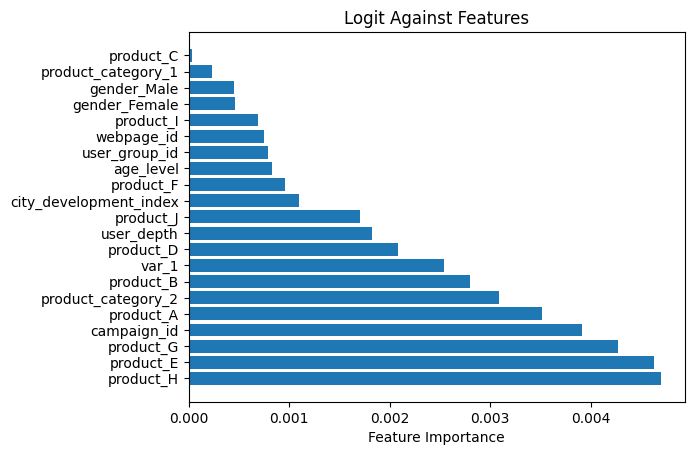

In [78]:
import matplotlib.pyplot as plt
#visualizes the relative importance of each feature in the best-performing model in an H2O AutoML
best_model = aml.leader
feature_importance = best_model.varimp()
plt.barh(range(len(feature_importance)), [val[1] for val in feature_importance], align='center')
plt.yticks(range(len(feature_importance)), [val[0] for val in feature_importance])
plt.xlabel('Feature Importance')
plt.title('Logit Against Features')
plt.show()

The Response Variable is Binary

In [79]:
print(ytrain_pd)

       is_click
0           0.0
1           0.0
2           0.0
3           0.0
4           0.0
...         ...
72655       0.0
72656       0.0
72657       0.0
72658       0.0
72659       0.0

[72660 rows x 1 columns]


Looking at the above the response is binary

> There is No Multicollinearity Among Explanatory Variables

Yes, some of the data are correlated; please see question 3 since it has been repeated.

### Is there any multicollinearity in the model?
> yes, we may infer from the VIF data that some variables are correlated with one another, possibly because they are connected to the same subject.



In [80]:
X_variables =combined_train[['campaign_id', 'webpage_id', 'product_category_1', 'product_category_2',
       'user_group_id', 'age_level', 'user_depth', 'city_development_index',
       'var_1', 'product_A', 'product_B', 'product_C', 'product_D',
       'product_E', 'product_F', 'product_G', 'product_H', 'product_I',
       'product_J', 'gender_Female', 'gender_Male']]
numColumns = combined_train.select_dtypes("number").columns
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = X_variables.columns
vif_data["VIF"] = [variance_inflation_factor(X_variables.values, i) for i in range(len(X_variables.columns))]

In [81]:
print(vif_data)

                   feature          VIF
0              campaign_id    36.808270
1               webpage_id    29.834541
2       product_category_1     5.054978
3       product_category_2     6.194992
4            user_group_id  2913.037588
5                age_level   552.676193
6               user_depth     1.013698
7   city_development_index     1.038225
8                    var_1     1.043194
9                product_A          inf
10               product_B          inf
11               product_C          inf
12               product_D          inf
13               product_E          inf
14               product_F          inf
15               product_G          inf
16               product_H          inf
17               product_I          inf
18               product_J          inf
19           gender_Female          inf
20             gender_Male          inf


### In the multivariate models are predictor variables independent of all the other predictor variables?
> Yes, from the sns pairplot, we can see that the there is collinearity between features

### In multivariate models rank the most significant predictor variables and exclude insignificant ones from the model?

According to the graph the order is

*   Product H 
*   Product E 
*   Product G 
*   Campaign ID
*   Product A


In any variable importance graph we have a scale in the range from 0 to 1 where 1 being the most significant predictor and 0 being the least.



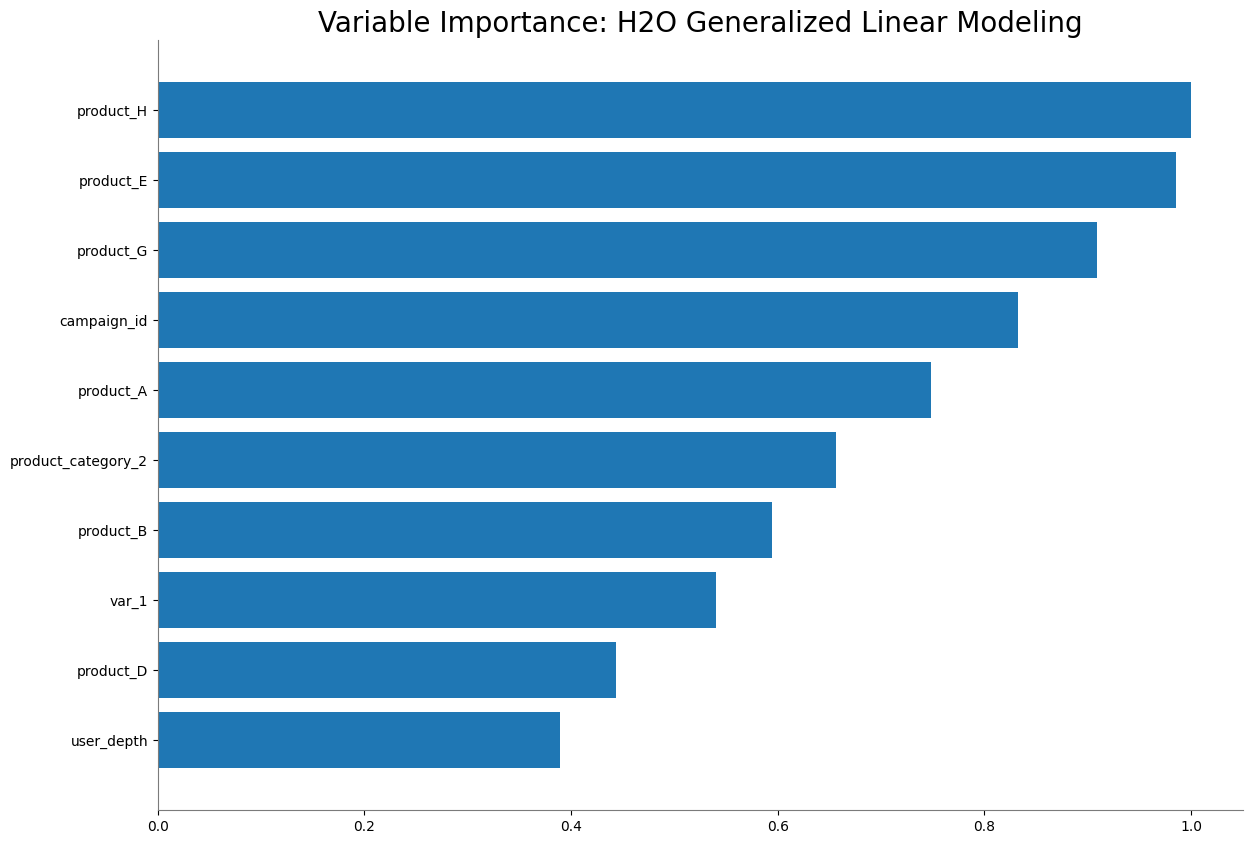

<Figure size 640x480 with 0 Axes>

In [82]:
%matplotlib inline
best_model.varimp_plot()

## Does the model make sense?

In [83]:
print(aml.leader)
#calculates the R-squared value for the best-performing model in an H2O AutoML experiment on a validation dataset
r2 = aml.leader.r2(valid=True)
print("*"*10)
print(f"r2 value is {r2}")

Model Details
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_1_AutoML_1_20230410_12331


GLM Model: summary
    family    link      regularization              lambda_search                                                               number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  --------------------------  --------------------------------------------------------------------------  ----------------------------  -----------------------------  ----------------------  ----------------------------------------------
    gaussian  identity  Ridge ( lambda = 0.05358 )  nlambda = 30, lambda.max = 0.5801, lambda.min = 0.05358, lambda.1se = -1.0  21                            21                             6                       AutoML_1_20230410_12331_training_py_2_sid_8d1b

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.05831259861960237
RMSE: 0.24148001701921915
MA

## Does regularization help?

No, it didnt help as the accuracy is lower than before

In [84]:
data = h2o.import_file('https://raw.githubusercontent.com/Rhea3110/DSEM/main/Ad_click_prediction_train.csv')
print(data)


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
  ﻿session_id  DateTime                   user_id  product      campaign_id    webpage_id    product_category_1    product_category_2    user_group_id  gender      age_level    user_depth    city_development_index    var_1    is_click
       140690  02/07/2017 00:00  858557            C                 359520         13787                     4                   nan               10  Female              4             3                         3        0           0
       333291  02/07/2017 00:00  243253            C                 105960         11085                     5                   nan                8  Female              2             2                       nan        0           0
       129781  02/07/2017 00:00  243253            C                 359520         13787                     4                   nan                8  Female              2             2             

In [85]:
y = 'is_click'
X_las = data.drop('DateTime')
X_las = X_las.drop('user_id')
X_las = X_las.drop('\ufeffsession_id')
X_las = X_las.drop(y)
X_las= X_las.col_names
# Split data into training and validation sets
train, test, valid = data.split_frame([0.7,0.15])

In [86]:
# Identify categorical columns
# Train Lasso model
lasso_model = h2o.estimators.glm.H2OGeneralizedLinearEstimator(
    family="binomial", alpha=1.0,  # Set alpha to 1 for L1 regularization (Lasso)
    lambda_search=True,  # Perform lambda search to automatically determine best lambda
    nfolds=5,  # Use 5-fold cross-validation for model evaluation
    keep_cross_validation_predictions=True,  # Keep cross-validation predictions for stacking
    fold_assignment="Modulo"  # Use modulo assignment for cross-validation
)
lasso_model.train( x=X_las, y=y, training_frame=train, validation_frame=valid, max_runtime_secs=600,)
# Making predictions on validation set
lasso_predictions = lasso_model.predict(test)
performance = lasso_model.model_performance(test)
confusion_matrix = performance.confusion_matrix().table
print(confusion_matrix)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.06851607071380462
       0      1      Error    Rate
-----  -----  -----  -------  -----------------
0      37258  27764  0.427    (27764.0/65022.0)
1      2221   2450   0.4755   (2221.0/4671.0)
Total  39479  30214  0.4302   (29985.0/69693.0)


In [87]:
# convert the actual values and predicted values of the target variable from H2O frames to lists
a=test[y].as_data_frame().values.tolist()
b=lasso_predictions['predict'].as_data_frame().values.tolist()
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(a,b)
accuracy = (cm[0,0] + cm[1,1]) / cm.sum()
print(accuracy)

0.5766863243080367


In [88]:
ridge_model = h2o.estimators.glm.H2OGeneralizedLinearEstimator(family="binomial",
    alpha=0.0,  # Set alpha to 0 for L2 regularization (Ridge)
    lambda_search=True,  # Perform lambda search to automatically determine best lambda
    nfolds=5,  # Use 5-fold cross-validation for model evaluation
    keep_cross_validation_predictions=True,  # Keep cross-validation predictions for stacking
    fold_assignment="Modulo"  # Use modulo assignment for cross-validation
)
ridge_model.train(x=X_las, y=y, training_frame=train, validation_frame=valid, max_runtime_secs=600)
# Make predictions on test set
ridge_predictions = ridge_model.predict(test)
performance1 = ridge_model.model_performance(test)
confusion_matrix1 = performance.confusion_matrix().table
print(confusion_matrix1)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.06851607071380462
       0      1      Error    Rate
-----  -----  -----  -------  -----------------
0      37258  27764  0.427    (27764.0/65022.0)
1      2221   2450   0.4755   (2221.0/4671.0)
Total  39479  30214  0.4302   (29985.0/69693.0)


In [89]:
#converts the actual values and predicted values from H2O frames to lists
a1=test[y].as_data_frame().values.tolist()
b1=ridge_predictions['predict'].as_data_frame().values.tolist()
print(a)
print(b)
cm1 = confusion_matrix(a1,b1)
accuracy1 = (cm1[0,0] + cm1[1,1]) / cm1.sum()
print(accuracy1)


[[0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [1], [0], [0], [0], [0], [0], [0], [0], [0], [1], [0], [0], [0], [0], [0], [0], [0], [0], [0], [1], [0], [0], [0], [0], [0], [1], [0], [0], [1], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [1], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [1],

## Which hyperparameters are important?

Hyperparameter tuning is the process of selecting the best combination of hyperparameters for a machine learning model to achieve optimal performance on a given task. It can significantly impact the performance of the model, and the choice of the tuning technique, performance metric, and search strategy are important factors to consider. A common practice is to perform an initial coarse search followed by a finer search around the best hyperparameters found in the initial search. It is important to report the results of hyperparameter tuning systematically to reproduce the results and compare the performance of different models and tuning methods.

In [90]:
print(type(train))
print(train.col_names)

<class 'h2o.frame.H2OFrame'>
['\ufeffsession_id', 'DateTime', 'user_id', 'product', 'campaign_id', 'webpage_id', 'product_category_1', 'product_category_2', 'user_group_id', 'gender', 'age_level', 'user_depth', 'city_development_index', 'var_1', 'is_click']


In [91]:
from h2o.grid.grid_search import H2OGridSearch
from h2o.estimators.gbm import H2OGradientBoostingEstimator
#a list of values to try for each hyperparameter during the tuning process.
hyper_params = {'learn_rate': [0.01, 0.05, 0.1], 'max_depth': [3, 5, 7], 'sample_rate': [0.7, 0.8, 0.9]}

In [92]:
X=['product', 'campaign_id', 'webpage_id', 'product_category_1', 'product_category_2', 'user_group_id', 'gender', 'age_level', 'user_depth', 'city_development_index', 'var_1']
y='is_click'

In [93]:
model = H2OGradientBoostingEstimator()
# create grid search object
grid = H2OGridSearch(model, hyper_params,grid_id='gbm_grid', search_criteria = {"strategy": "RandomDiscrete", "max_models": 20, "seed": 1})

In [94]:
# train grid search
grid.train(x=X, y=y, training_frame=train, nfolds=2)

gbm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%


Hyper-Parameter Search Summary: ordered by increasing residual_deviance
    learn_rate    max_depth    sample_rate    model_ids          residual_deviance
--  ------------  -----------  -------------  -----------------  -------------------
    0.05          5            0.7            gbm_grid_model_11  0.0629182
    0.05          5            0.8            gbm_grid_model_4   0.0629188
    0.1           5            0.9            gbm_grid_model_8   0.0629196
    0.1           5            0.7            gbm_grid_model_19  0.0629221
    0.05          7            0.7            gbm_grid_model_6   0.0629252
    0.1           5            0.8            gbm_grid_model_3   0.0629264
    0.05          7            0.9            gbm_grid_model_16  0.0629356
    0.1           3            0.9            gbm_grid_model_10  0.0629361
    0.05          7            0.8            gbm_grid_model_13  0.0629461
    0.05          3            0.7            gbm_grid_model_5   0.0629552
    0.1           7            0.8            gbm_grid_model_9   0.0629567
    0.01          7            0.7            gbm_grid_model_14  0.0630313
    0.01          7            0.9            gbm_grid_model_7   0.0630321
    0.01          7            0.8            gbm_grid_model_2   0.063035
    0.01          5            0.8            gbm_grid_model_1   0.0630454
    0.01          5            0.9            gbm_grid_model_15  0.0630471
    0.01          5            0.7            gbm_grid_model_17  0.0630515
    0.01          3            0.9            gbm_grid_model_20  0.0630854
    0.01          3            0.8            gbm_grid_model_18  0.0630871
    0.01          3            0.7            gbm_grid_model_12  0.0630874

In [95]:
#best hyperparameters
best_model = grid.get_grid()[0]
print(best_model.params)

{'model_id': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'ModelKeyV3', 'schema_type': 'Key<Model>'}, 'name': 'gbm_grid_model_11', 'type': 'Key<Model>', 'URL': '/3/Models/gbm_grid_model_11'}, 'input': None}, 'training_frame': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'py_9_sid_8d1b', 'type': 'Key<Frame>', 'URL': '/3/Frames/py_9_sid_8d1b'}, 'input': {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'py_9_sid_8d1b', 'type': 'Key<Frame>', 'URL': '/3/Frames/py_9_sid_8d1b'}}, 'validation_frame': {'default': None, 'actual': None, 'input': None}, 'nfolds': {'default': 0, 'actual': 2, 'input': 2}, 'keep_cross_validation_models': {'default': True, 'actual': True, 'input': True}, 'keep_cross_validation_predictions': {'default': False, 'actual': False, 'input': False}, 'keep_cross_validation_fold_assignment': {'default': False, 'act

In [96]:
#retrieve the grid search results sorted in increasing order of performance
gbm_gridperf2 = grid.get_grid(decreasing=False)
print(gbm_gridperf2)

Hyper-Parameter Search Summary: ordered by increasing residual_deviance
    learn_rate    max_depth    sample_rate    model_ids          residual_deviance
--  ------------  -----------  -------------  -----------------  -------------------
    0.05          5            0.7            gbm_grid_model_11  0.0629182
    0.05          5            0.8            gbm_grid_model_4   0.0629188
    0.1           5            0.9            gbm_grid_model_8   0.0629196
    0.1           5            0.7            gbm_grid_model_19  0.0629221
    0.05          7            0.7            gbm_grid_model_6   0.0629252
    0.1           5            0.8            gbm_grid_model_3   0.0629264
    0.05          7            0.9            gbm_grid_model_16  0.0629356
    0.1           3            0.9            gbm_grid_model_10  0.0629361
    0.05          7            0.8            gbm_grid_model_13  0.0629461
    0.05          3            0.7            gbm_grid_model_5   0.0629552
    0.1   

In [97]:
#converting in list
list_hyperparameters = []
for i in range(len(gbm_gridperf2)):
    hyperparameters = gbm_gridperf2.get_hyperparams_dict(i)
    list_hyperparameters.append(hyperparameters)

Hyperparameters: [learn_rate, max_depth, sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate]
Hyperparameters: [learn_rate

In [98]:
models = gbm_gridperf2.models

In [99]:
print(models)

[H2OGradientBoostingEstimator({'parms': {'model_id': {'__meta': {'schema_version': 3, 'schema_name': 'ModelParameterSchemaV3', 'schema_type': 'Iced'}, 'name': 'model_id', 'label': 'model_id', 'help': 'Destination id for this model; auto-generated if not specified.', 'required': False, 'type': 'Key<Model>', 'default_value': None, 'actual_value': {'__meta': {'schema_version': 3, 'schema_name': 'ModelKeyV3', 'schema_type': 'Key<Model>'}, 'name': 'gbm_grid_model_11', 'type': 'Key<Model>', 'URL': '/3/Models/gbm_grid_model_11'}, 'input_value': None, 'level': 'critical', 'values': [], 'is_member_of_frames': [], 'is_mutually_exclusive_with': [], 'gridable': False}, 'training_frame': {'__meta': {'schema_version': 3, 'schema_name': 'ModelParameterSchemaV3', 'schema_type': 'Iced'}, 'name': 'training_frame', 'label': 'training_frame', 'help': 'Id of the training data frame.', 'required': False, 'type': 'Key<Frame>', 'default_value': None, 'actual_value': {'__meta': {'schema_version': 3, 'schema_na

In [100]:
list_training_deviance = []
print(models[1])
for i in range(len(gbm_gridperf2)):
    model = models[i]
  # print(model)
    performance_metrics = model.model_performance(test)
    training_deviance = performance_metrics.mean_residual_deviance()
    list_training_deviance.append(training_deviance)

Model Details
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: gbm_grid_model_4


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    50                 50                          22715                  5            5            5             29            32            31.68

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.0628094596745441
RMSE: 0.2506181551175894
MAE: 0.12575090834054345
RMSLE: 0.17466970974467075
Mean Residual Deviance: 0.0628094596745441

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 0.06291881865753066
RMSE: 0.2508362387246521
MAE: 0.12585350846580293
RMSLE: 0.17487835435139523
Mean Residual Deviance: 0.06291881865753066

Cro

In [101]:
for i in range(len(gbm_gridperf2)):
    list_hyperparameters[i]["Mean Residual Deviance"] = list_training_deviance[i]

In [102]:
hyperparameters_dataframe = pd.DataFrame(list_hyperparameters)
print(hyperparameters_dataframe)

    learn_rate  max_depth  sample_rate  Mean Residual Deviance
0         0.05          5          0.7                0.062175
1         0.05          5          0.8                0.062175
2         0.10          5          0.9                0.062176
3         0.10          5          0.7                0.062176
4         0.05          7          0.7                0.062169
5         0.10          5          0.8                0.062179
6         0.05          7          0.9                0.062167
7         0.10          3          0.9                0.062224
8         0.05          7          0.8                0.062174
9         0.05          3          0.7                0.062237
10        0.10          7          0.8                0.062174
11        0.01          7          0.7                0.062291
12        0.01          7          0.9                0.062292
13        0.01          7          0.8                0.062293
14        0.01          5          0.8                0

Best param being learn_rate: 0.05 max_depth:5 sample rate:0.7

In [103]:
import shap
#Create two new datasets: xtrain_2000 with 2000 samples from the xtrain dataset, and xtest_100 with 100 samples from the xtest dataset.
xtrain_1000 = shap.utils.sample(
    xtrain, 1000
)


# Decision Tree

A decision tree classifier is a machine learning algorithm that recursively splits data into subsets based on feature values, using a criterion like Gini impurity or entropy. It selects the best feature to split the data at each step, and continues until reaching a stopping condition. Decision trees are easy to interpret but can be prone to overfitting. They are widely used for classification tasks in various applications.

In [104]:
#trains a decision tree classifier using 'xtrain' and 'ytrain', and then prints out the rules of the decision tree using 'export_text' function.
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
tree = export_text(model, feature_names=list(xtrain.columns))
print(tree)

|--- product_category_2 <= 0.29
|   |--- product_H <= 0.50
|   |   |--- product_I <= 0.50
|   |   |   |--- webpage_id <= 0.61
|   |   |   |   |--- user_group_id <= 0.13
|   |   |   |   |   |--- product_category_2 <= 0.22
|   |   |   |   |   |   |--- product_G <= 0.50
|   |   |   |   |   |   |   |--- product_D <= 0.50
|   |   |   |   |   |   |   |   |--- var_1 <= 0.50
|   |   |   |   |   |   |   |   |   |--- city_development_index <= 0.83
|   |   |   |   |   |   |   |   |   |   |--- product_B <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |   |   |   |   |   |--- product_B >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |--- city_development_index >  0.83
|   |   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |   |--- var_1 >  0.50
|   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |--- product_D >  0

# Interpreting AutoML

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                               rmse        mse       mae     rmsle    mean_residual_deviance    training_time_ms    predict_time_per_row_ms  algo
---------------------------------  --------  ---------  --------  --------  ------------------------  ------------------  -------------------------  -------
XGBoost_1_AutoML_1_20230410_12331  0.240898  0.0580319  0.116468  0.168699                 0.0580319                3714                   0.009201  XGBoost
GBM_1_AutoML_1_20230410_12331      0.241723  0.0584298  0.116504  0.168372                 0.0584298                4470                   0.013362  GBM
GLM_1_AutoML_1_20230410_12331      0.242817  0.0589601  0.117247  0.169143                 0.0589601                1104                   0.000847  GLM
[3 rows x 9 columns]

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

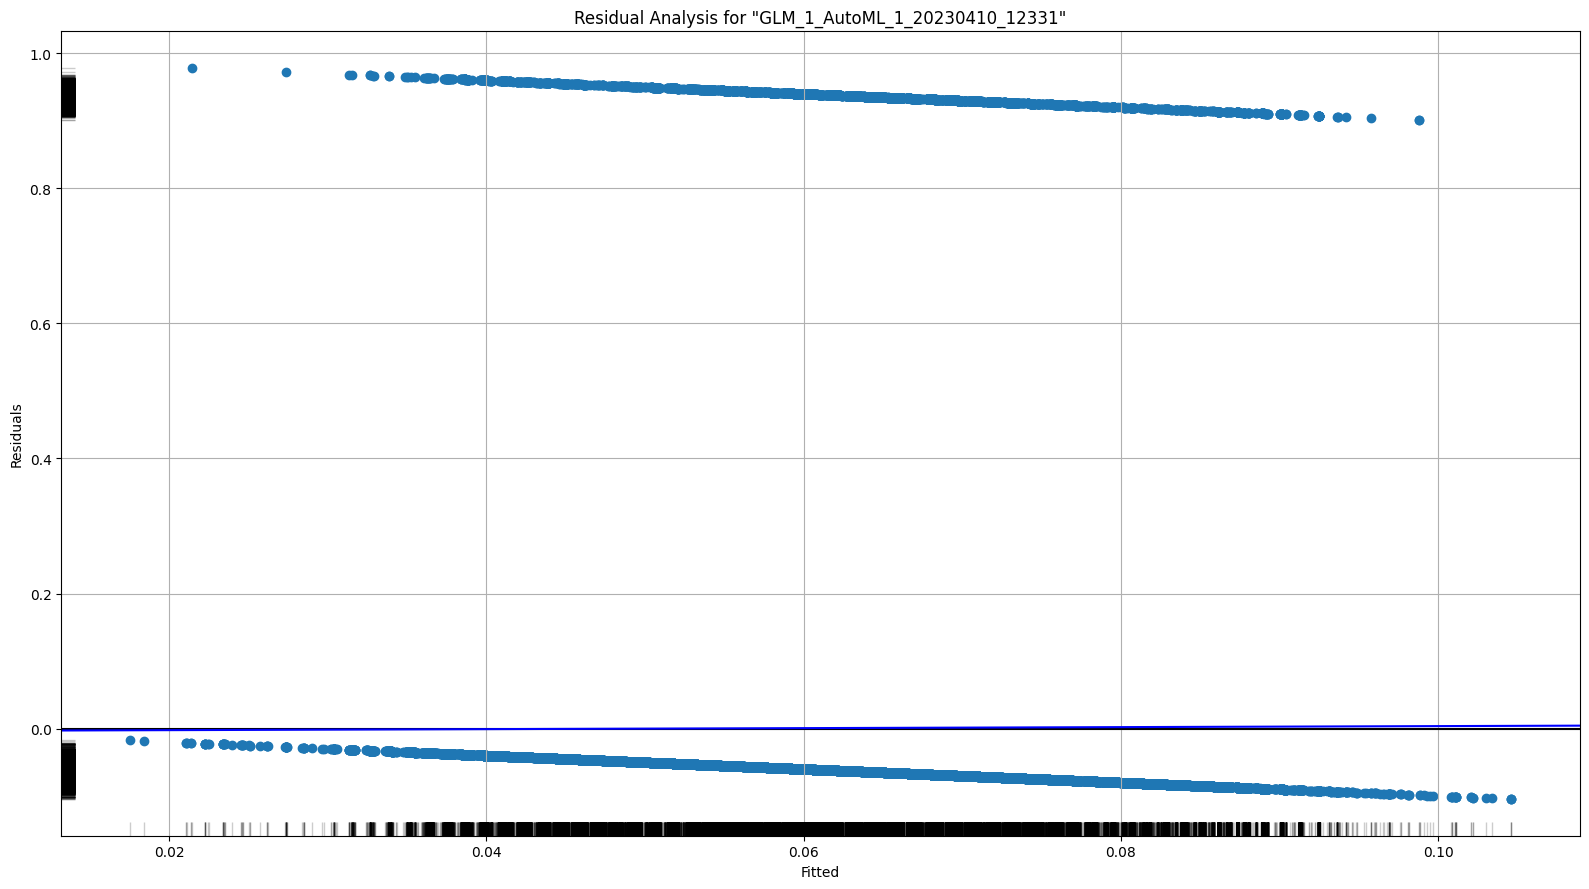

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

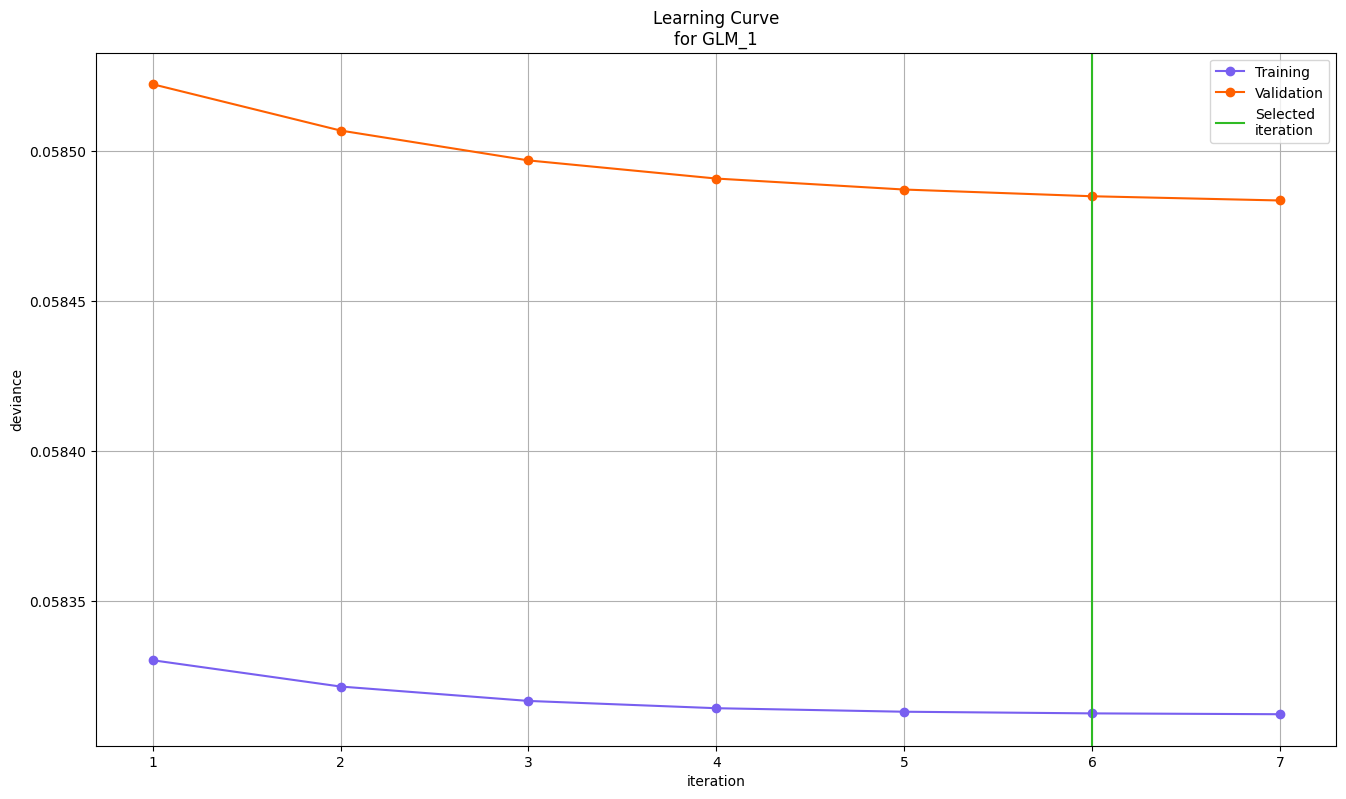

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

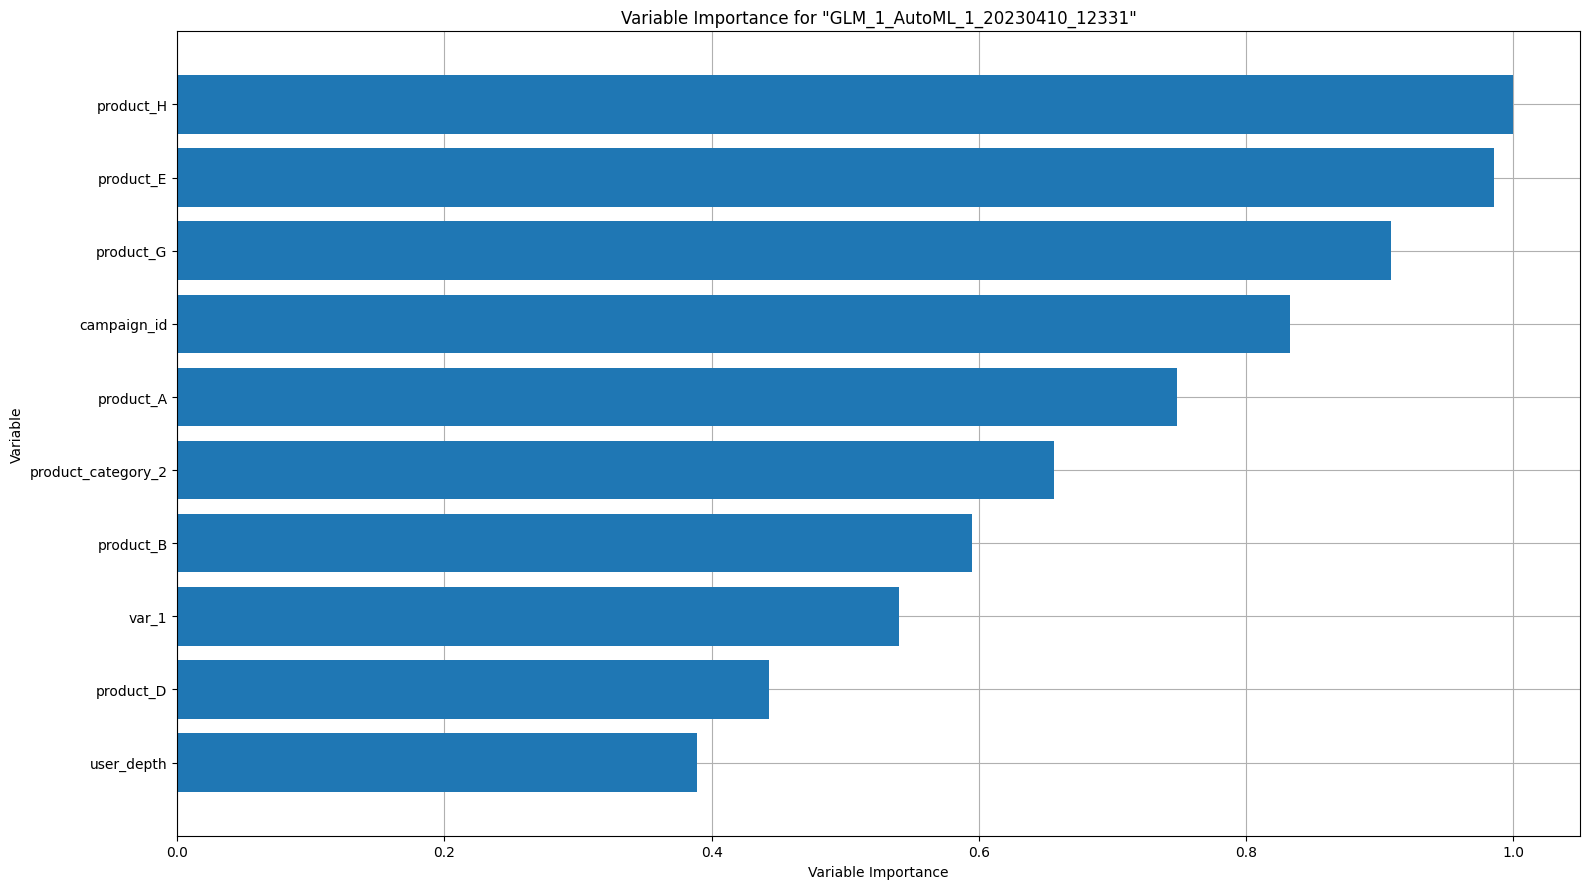

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

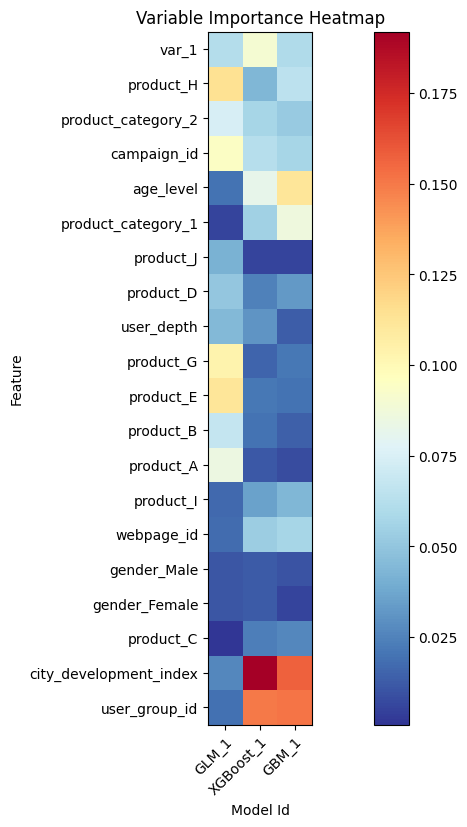

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

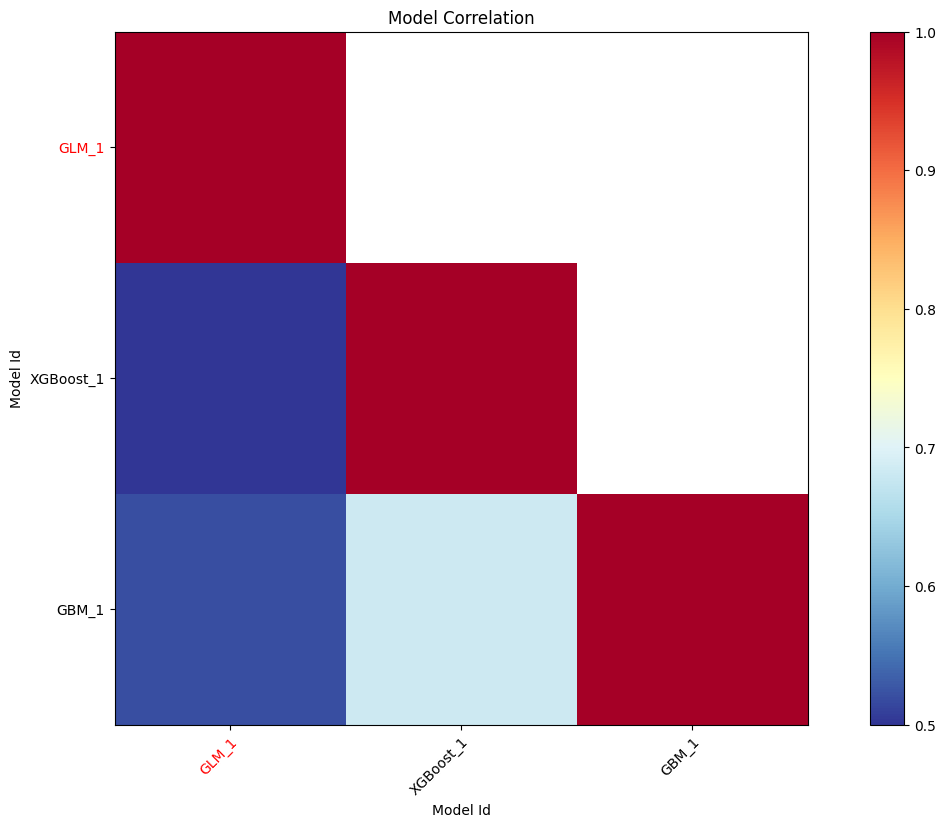

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

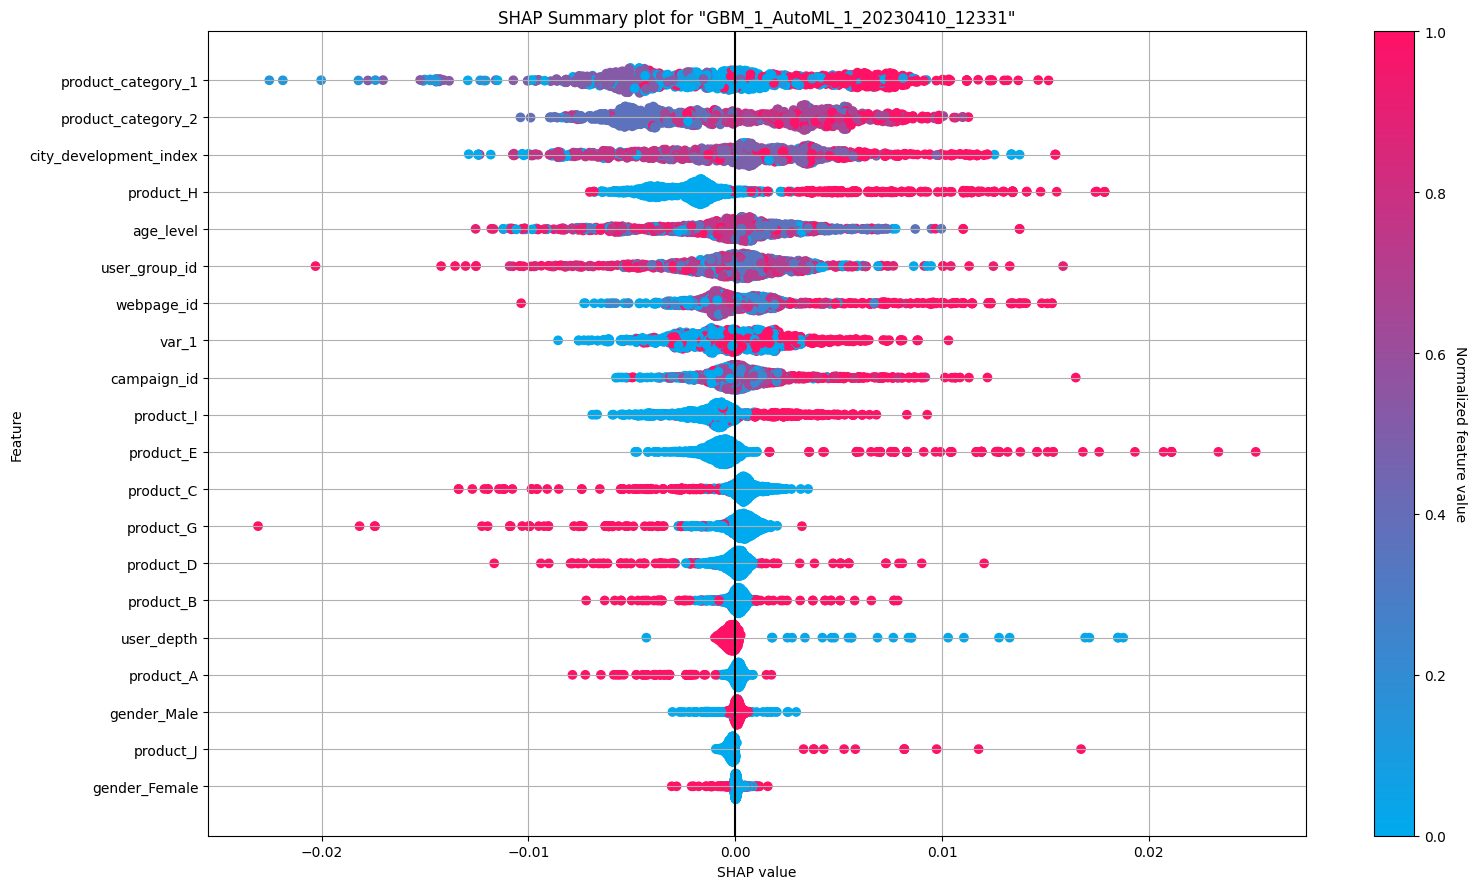

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

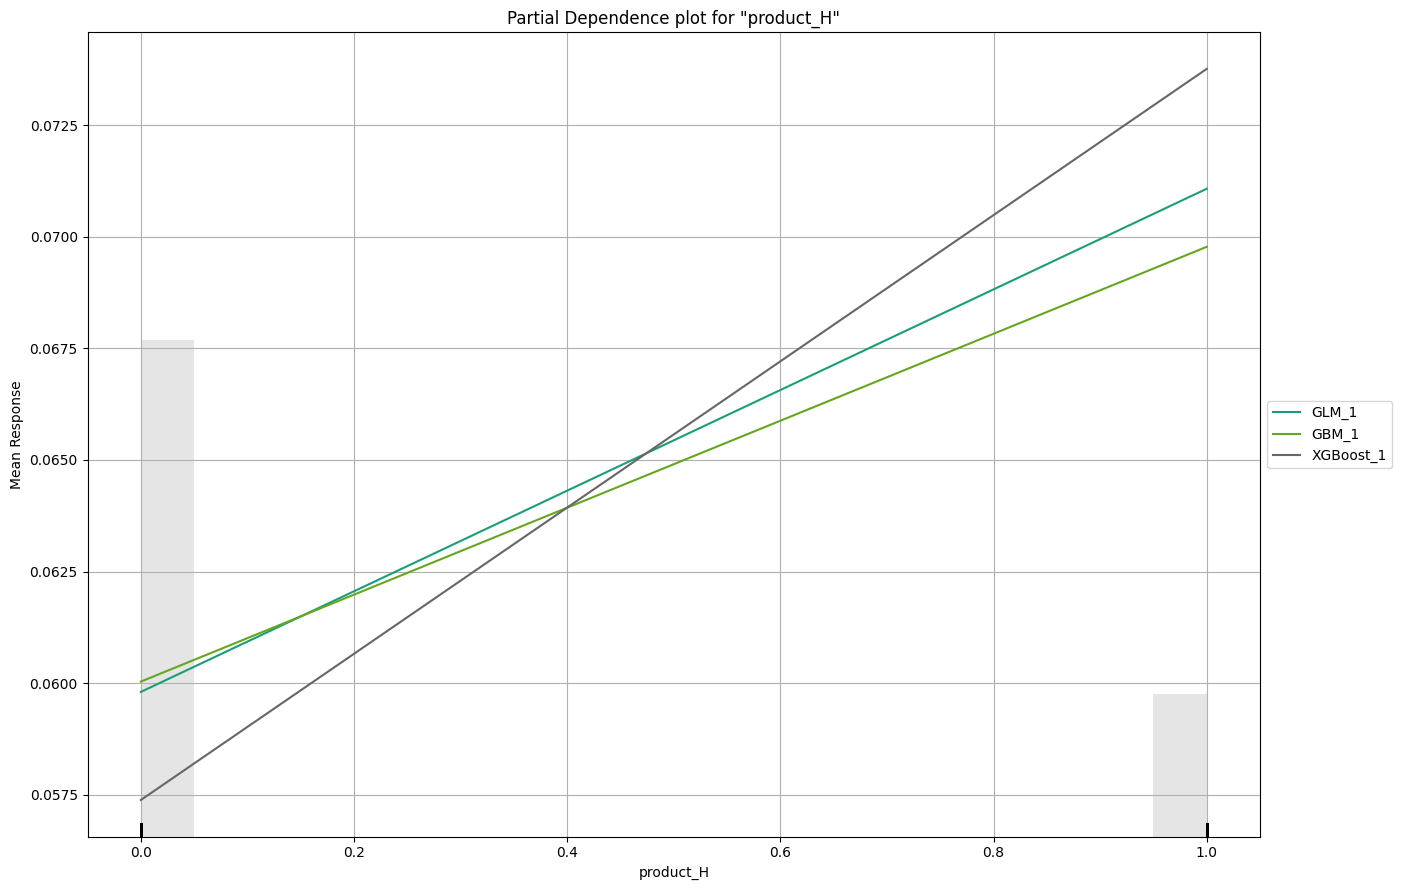

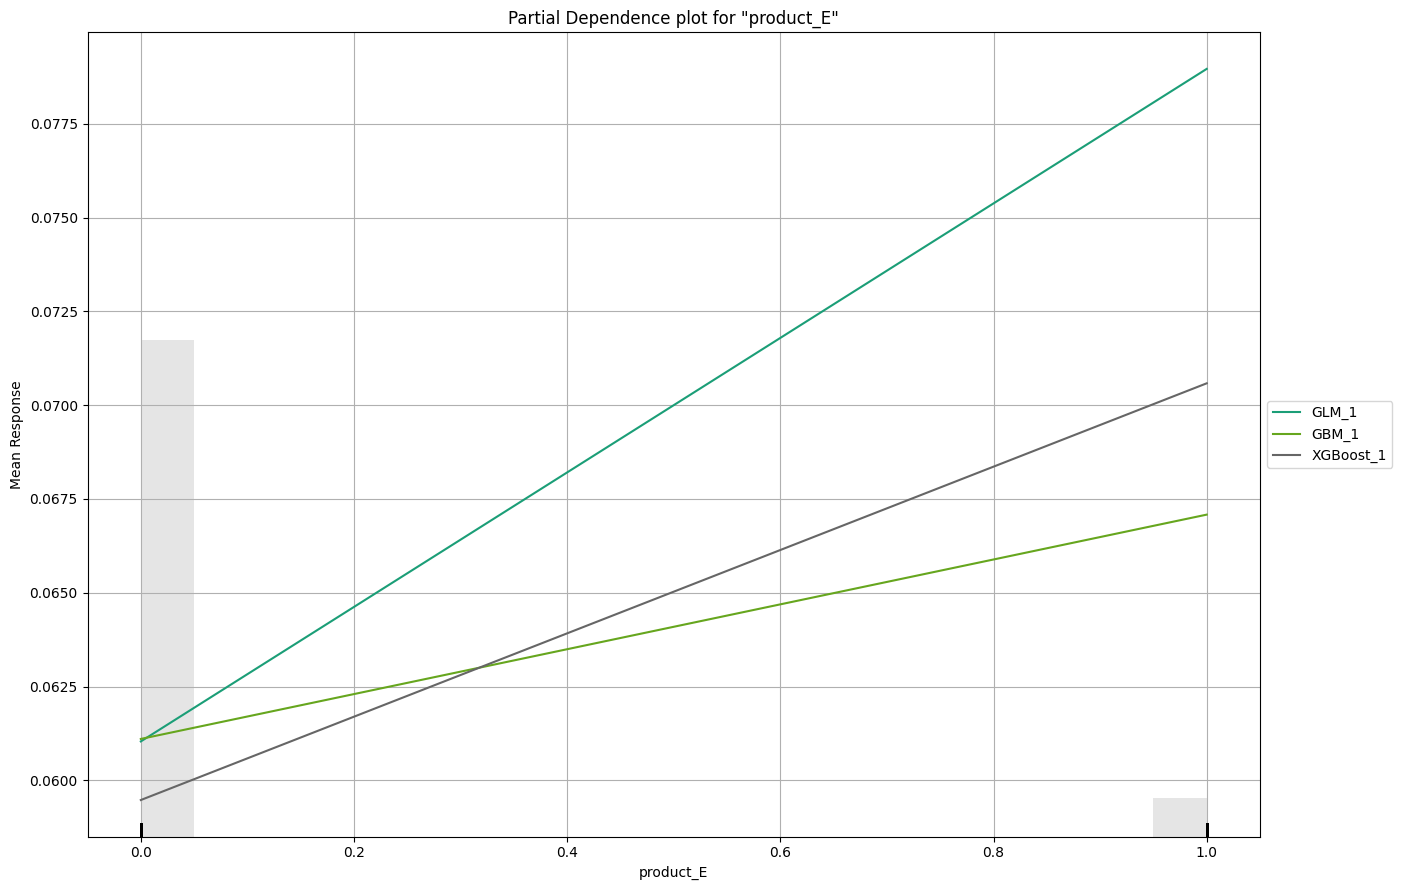

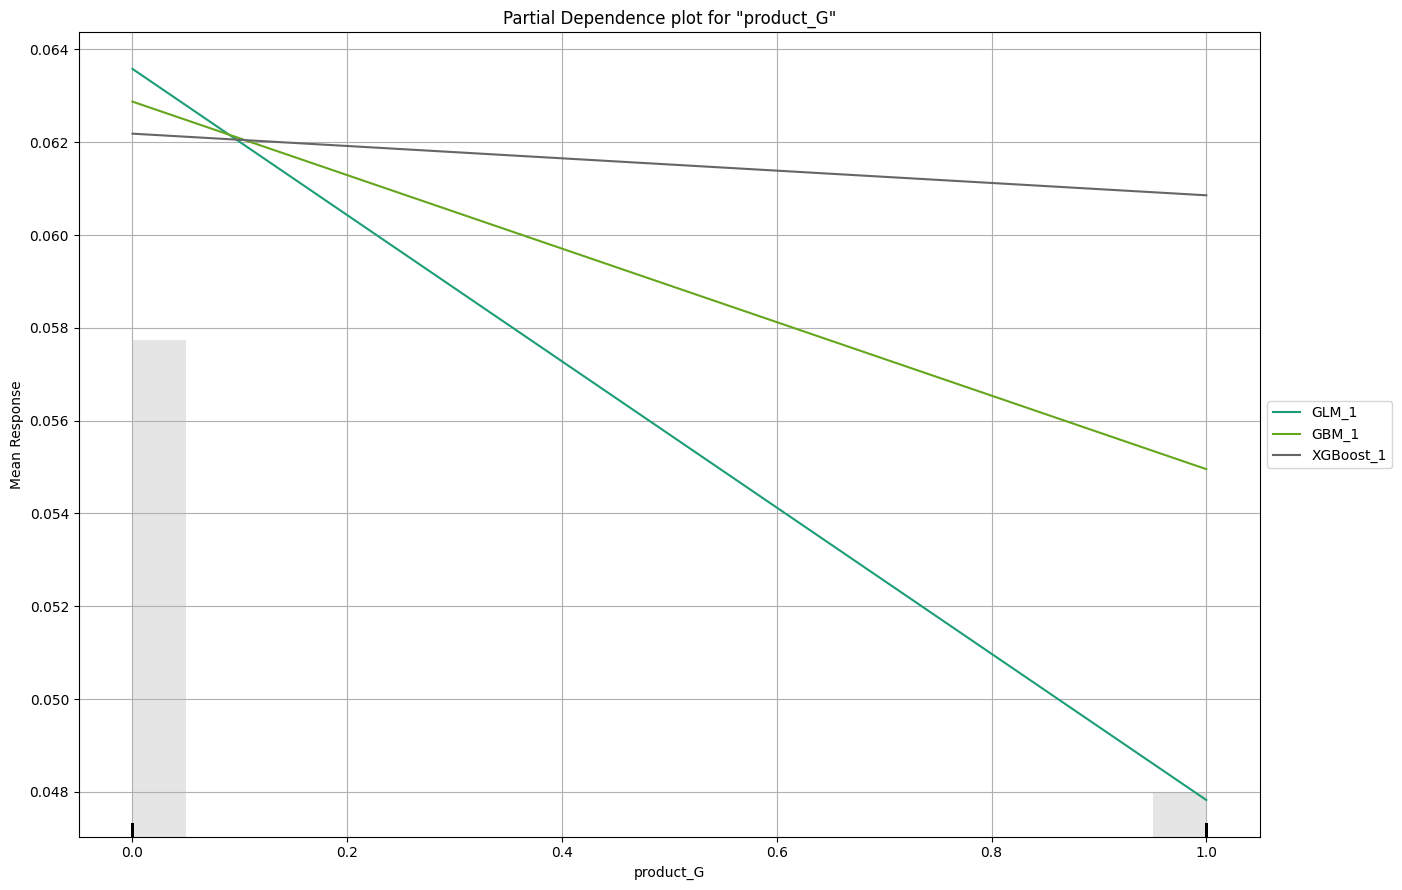

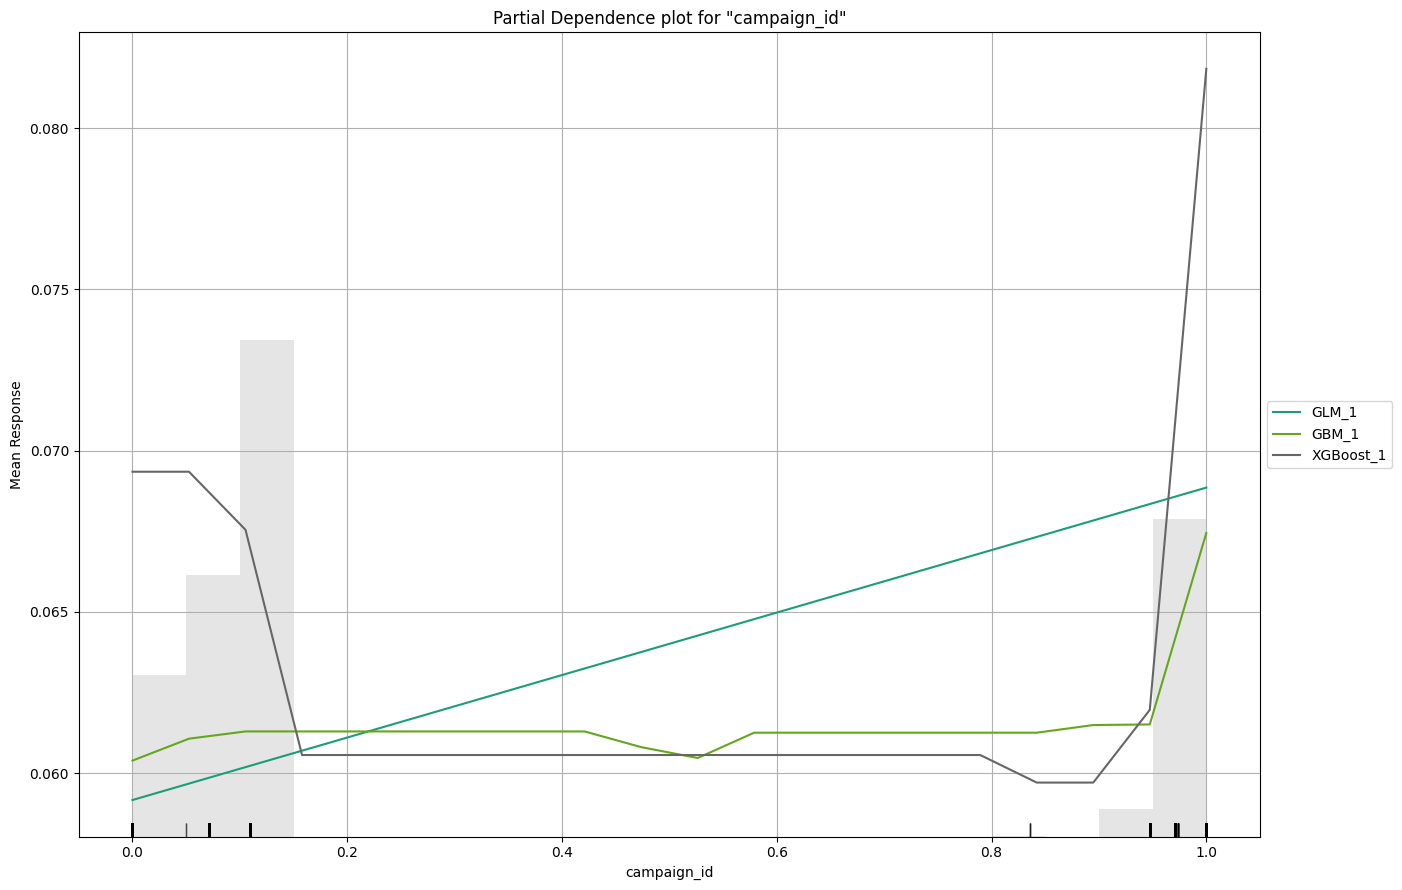

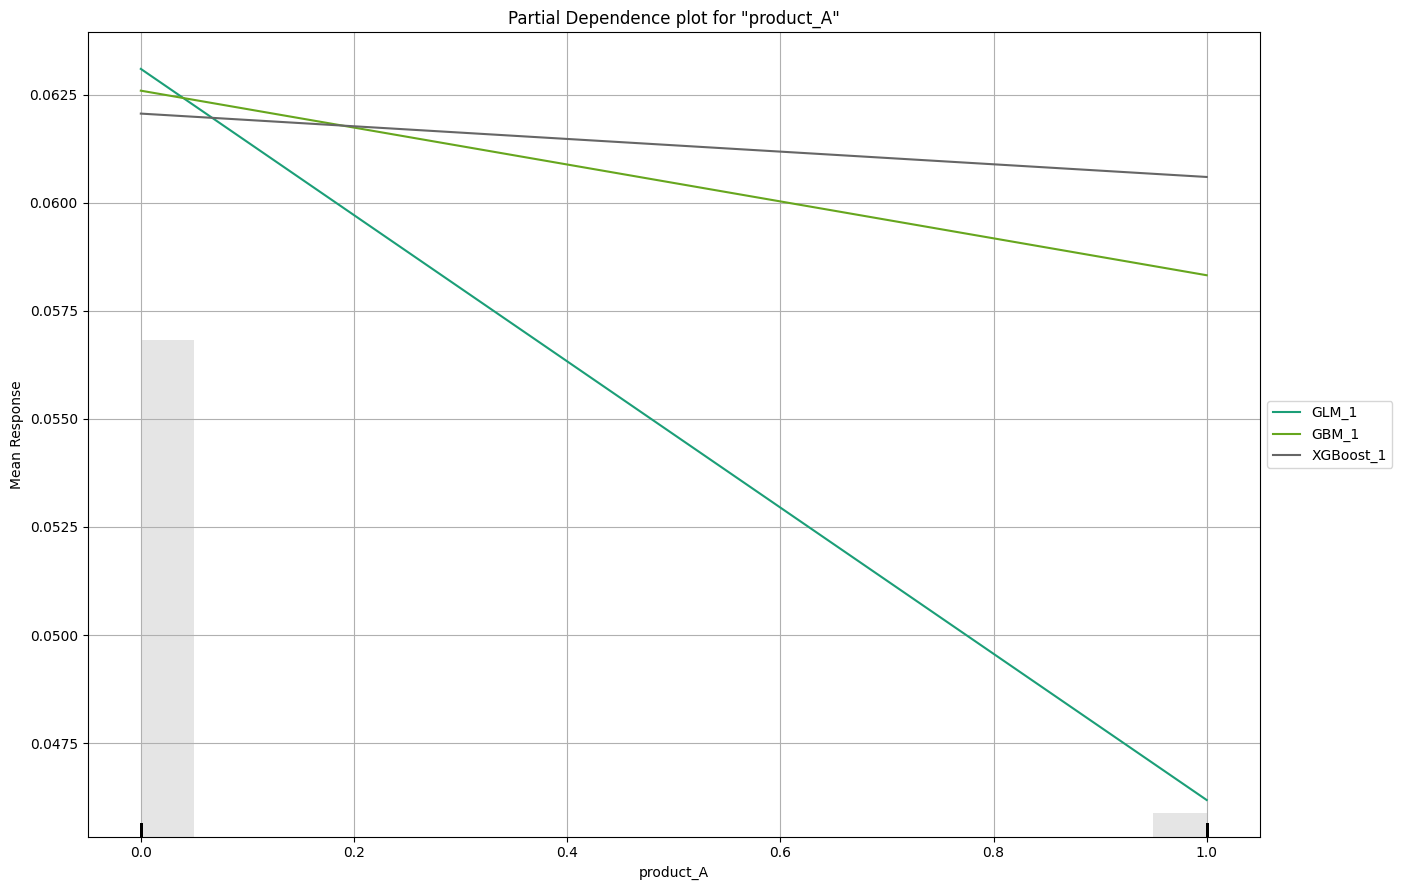

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

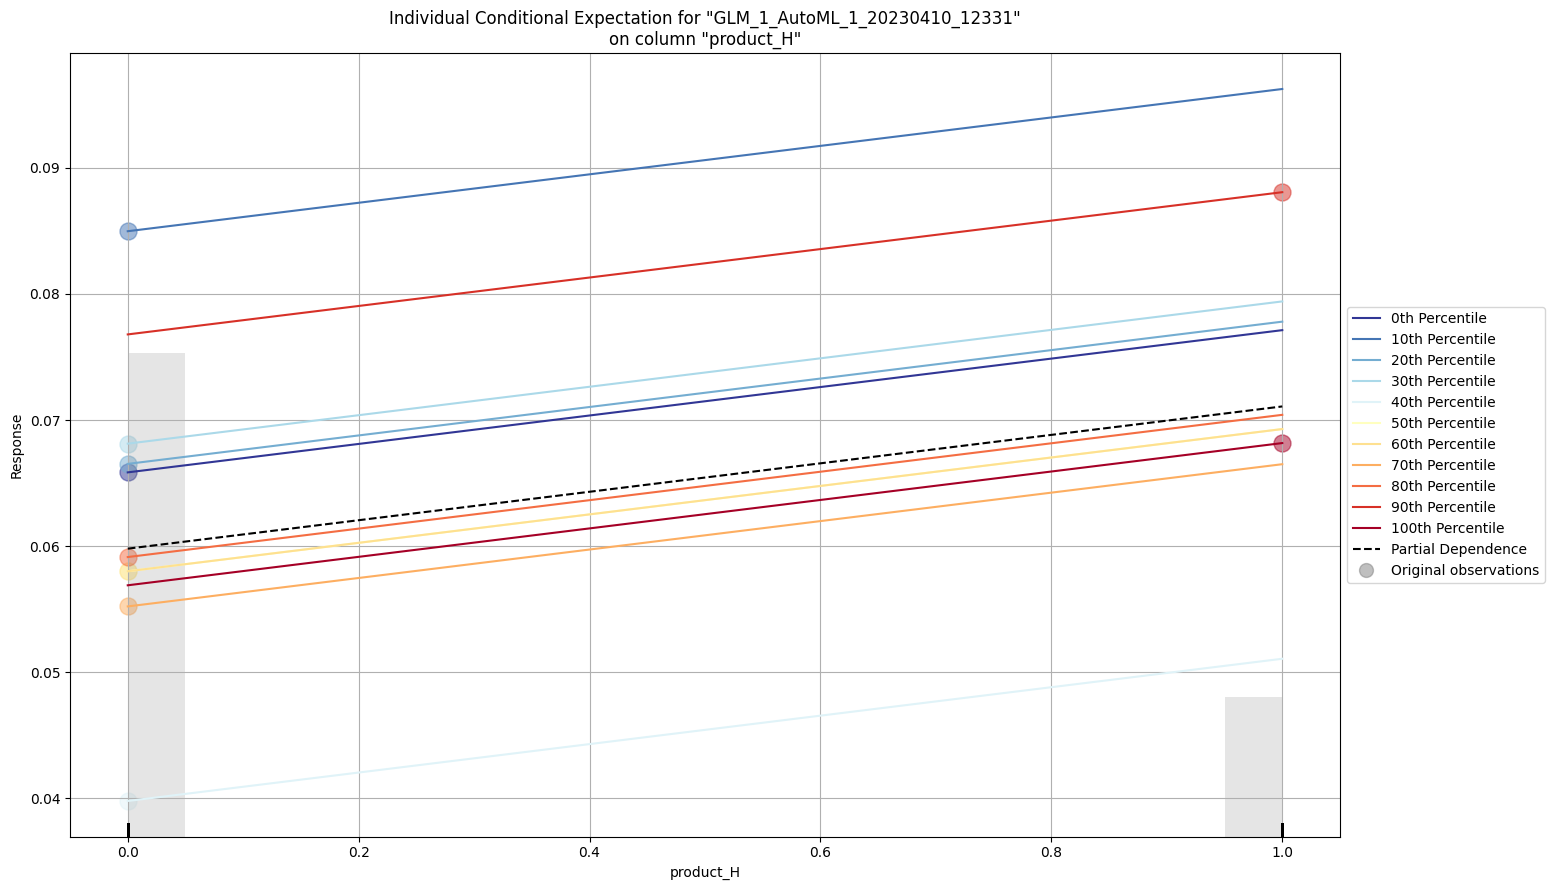

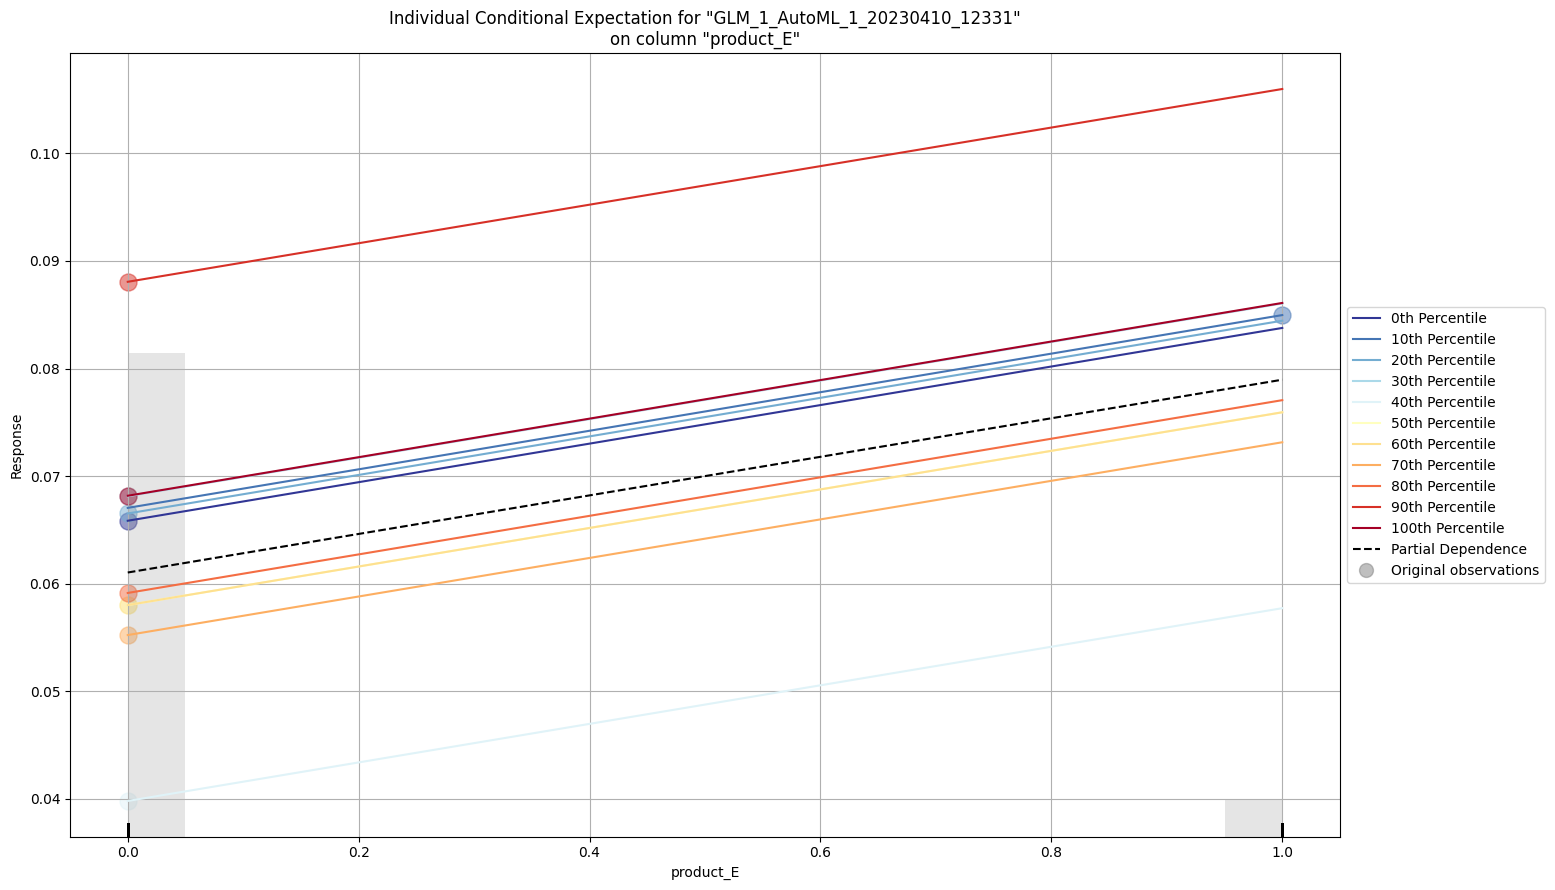

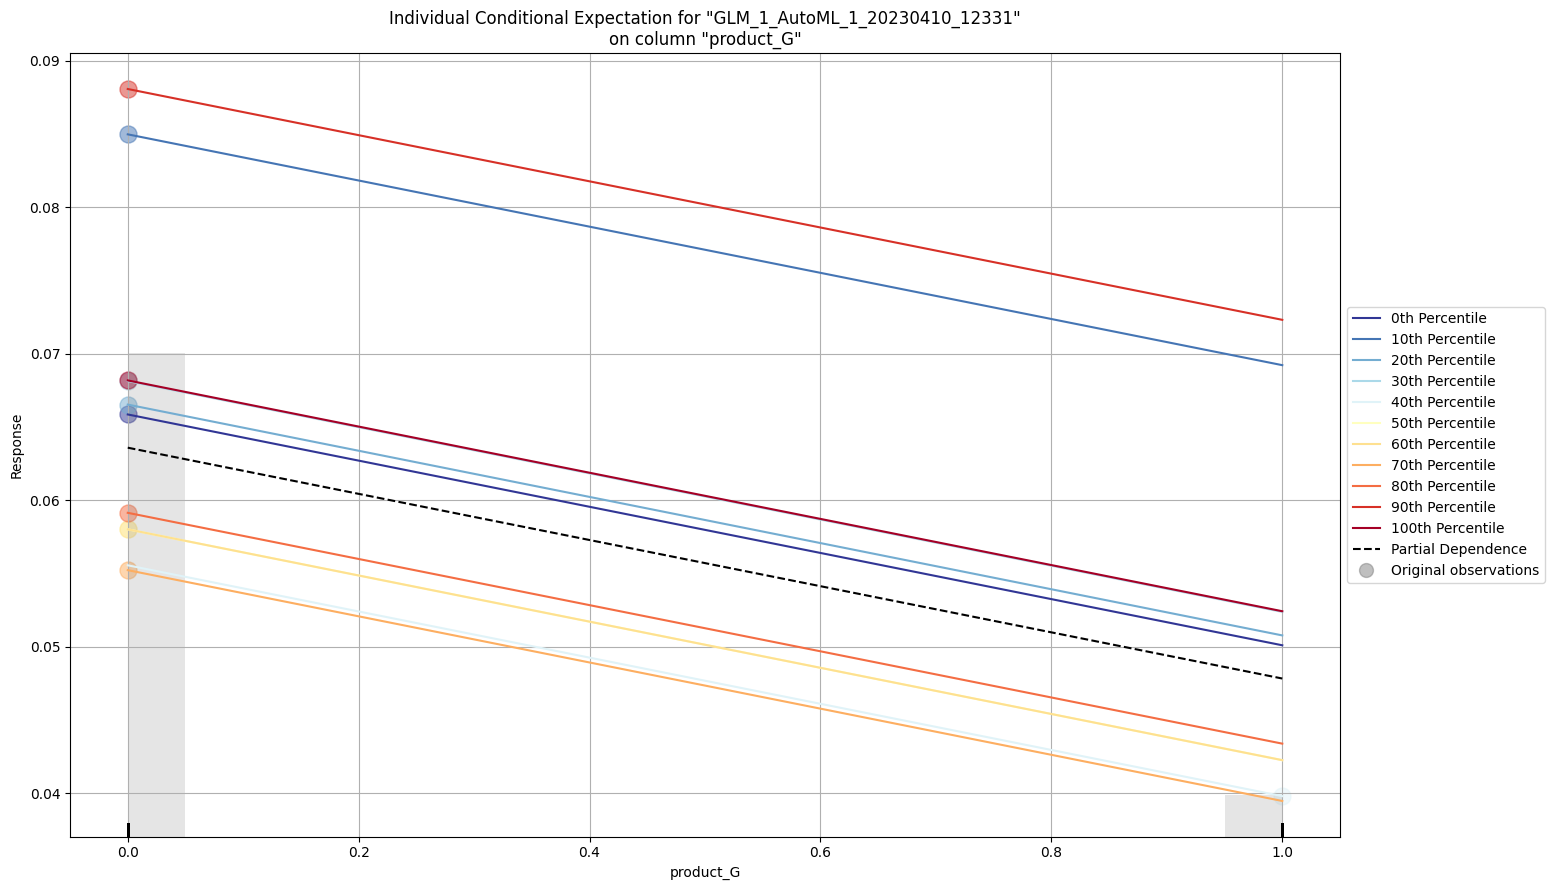

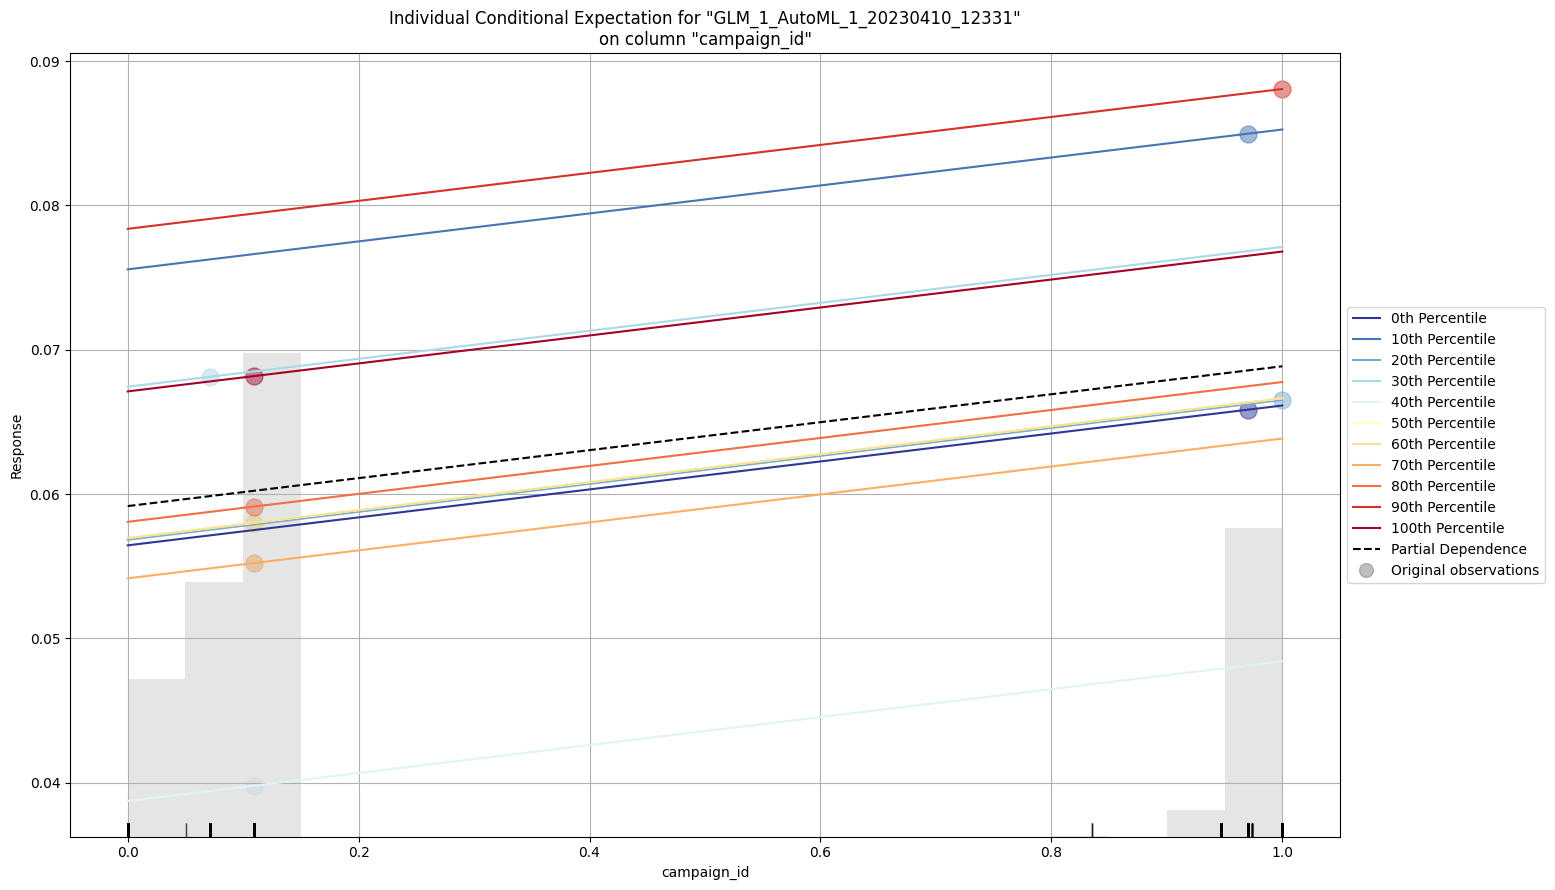

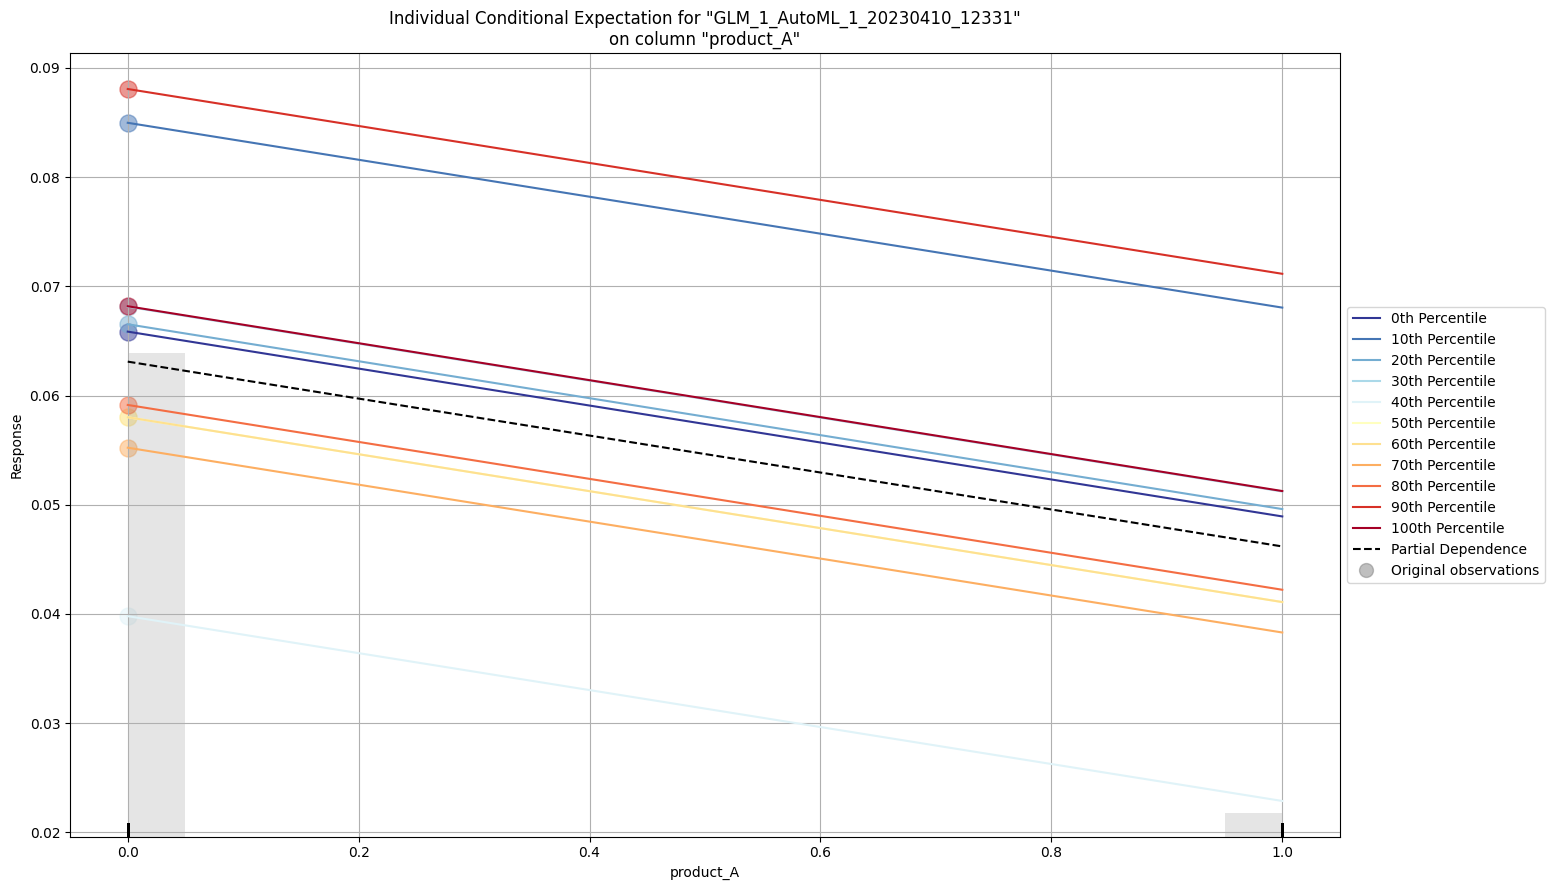



H2OExplanation([('leaderboard', H2OExplanation([('header', <h2o.explanation._explain.Header object at 0x7f400e554eb0>), ('description', <h2o.explanation._explain.Description object at 0x7f3f277c61c0>), ('data', H2OFrame({'_ex': <Expr(makeLeaderboard ['GLM_1_AutoML_1_20230410_12331', 'GBM_1_AutoML_1_20230410_12331', 'XGBoost_1_AutoML_1_20230410_12331'] 'Key_Frame__upload_a5b3293221f2e67677ade8020cc5430d.hex' 'AUTO' 'ALL' 'AUTO')#py_18_sid_8d1b>}))])), ('residual_analysis', H2OExplanation([('header', <h2o.explanation._explain.Header object at 0x7f3f052f5070>), ('description', <h2o.explanation._explain.Description object at 0x7f3f1f3850d0>), ('plots', H2OExplanation([('GLM_1_AutoML_1_20230410_12331', <h2o.plot._plot_result._MObject object at 0x7f3f03ee4700>)]))])), ('learning_curve', H2OExplanation([('header', <h2o.explanation._explain.Header object at 0x7f3f04cfaaf0>), ('description', <h2o.explanation._explain.Description object at 0x7f3f21ba1520>), ('plots', H2OExplanation([('GLM_1_Au

In [105]:
from h2o import explanation
explanation = aml.explain(dtrain_h2o)
print(explanation)

# Shap Analysis for Logistic Regression and Tree

## Shap Explainer

In [106]:
#computes the SHAP values of the features for each observation in 'xtrain_2000' using a SHAP explainer object 'explainer' based on the model's predict function
explainer = shap.Explainer(model.predict, xtrain_1000, seed=10)
linear_shap_values = explainer(xtrain_1000)

Permutation explainer: 1001it [00:32, 23.39it/s]                         


In [107]:
#computes the SHAP values of the features for each observation in 'xtrain_2000' using a SHAP explainer object 'explainer1' based on the predict function of a decision tree classifier named 'model1'
explainer = shap.Explainer(model.predict, xtrain_1000, seed=10)
tree_shap_values = explainer(xtrain_1000)

Permutation explainer: 1001it [00:28, 22.16it/s]                         


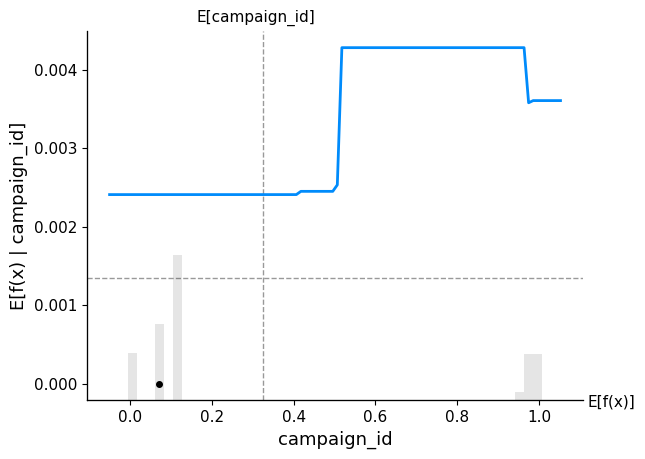

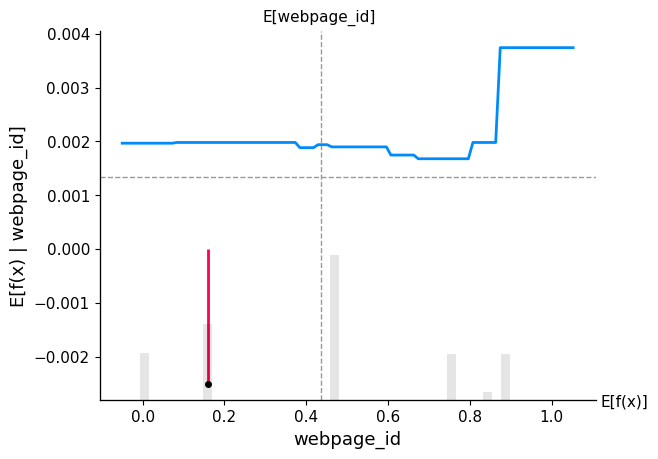

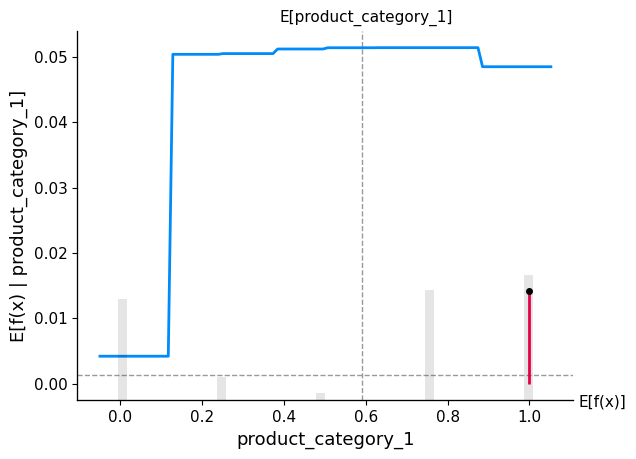

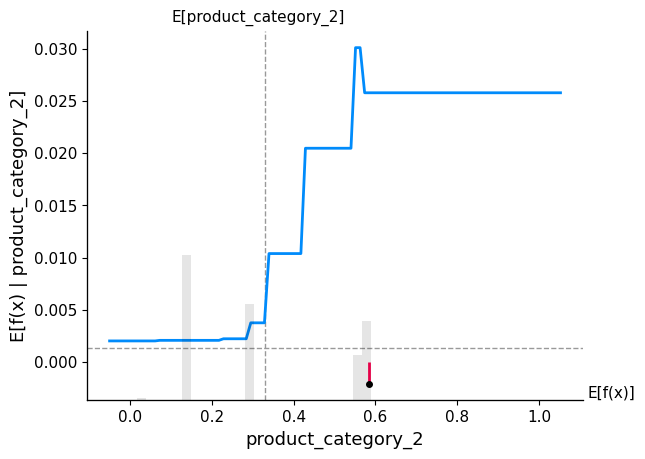

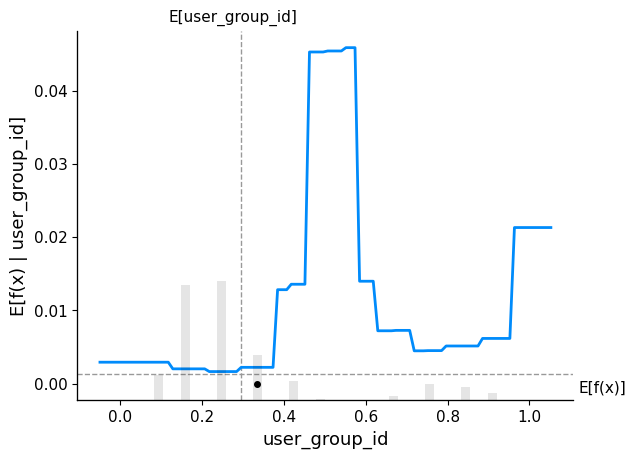

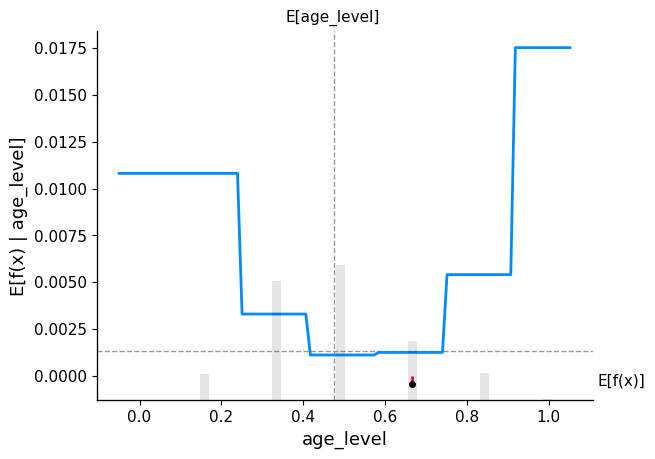

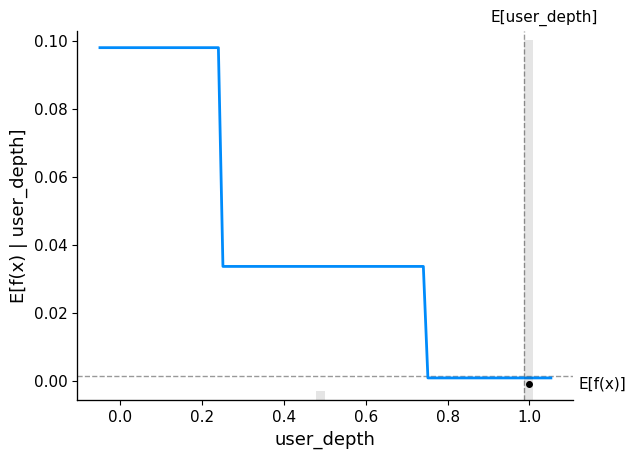

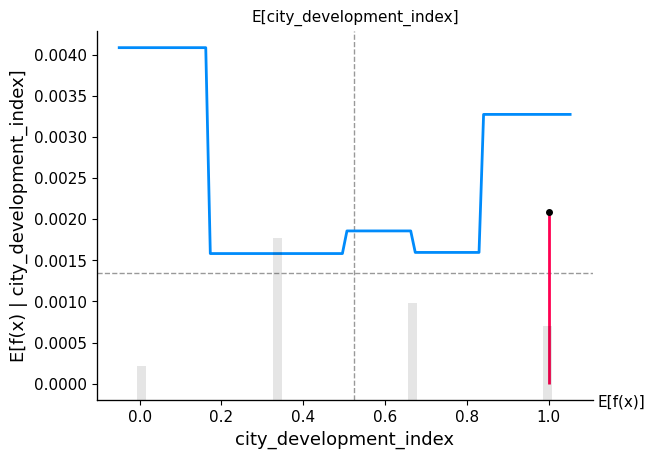

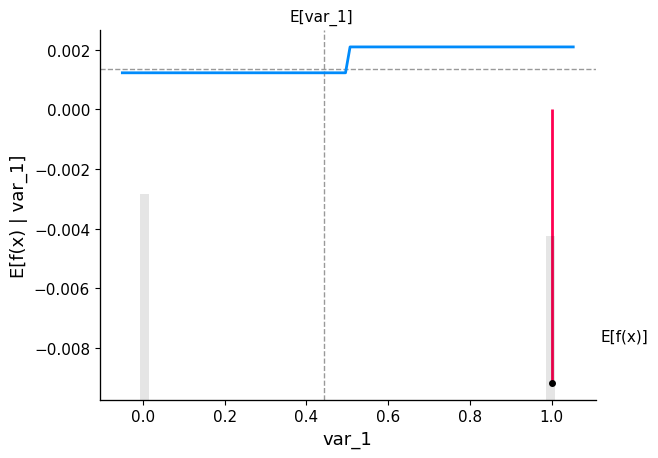

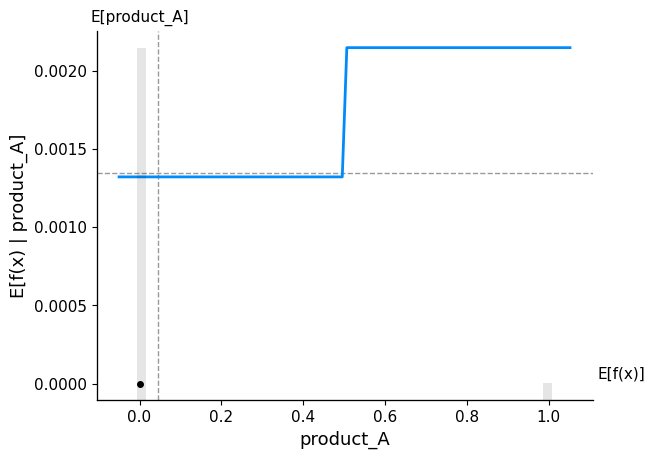

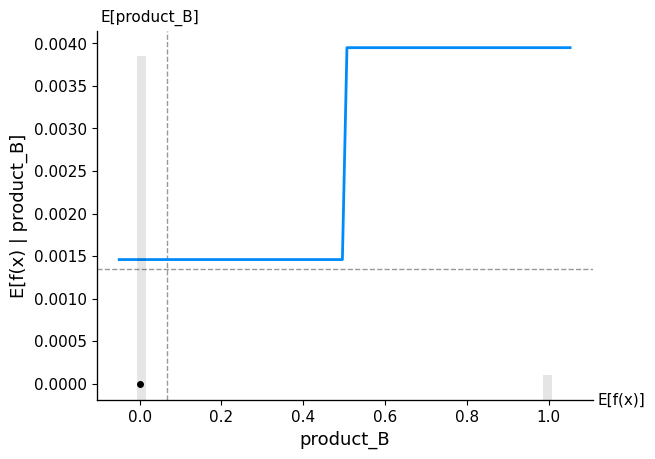

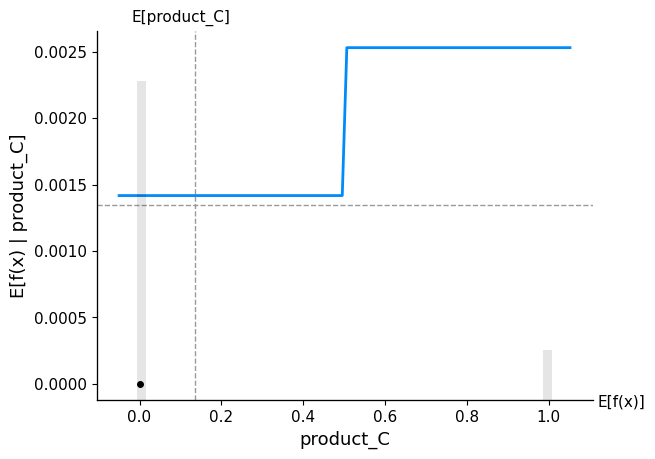

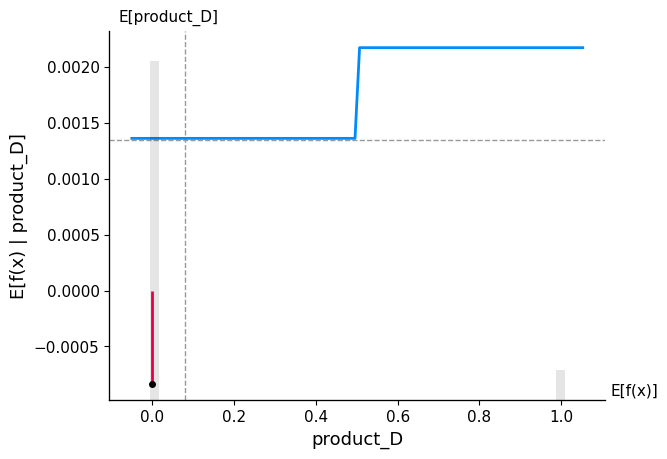

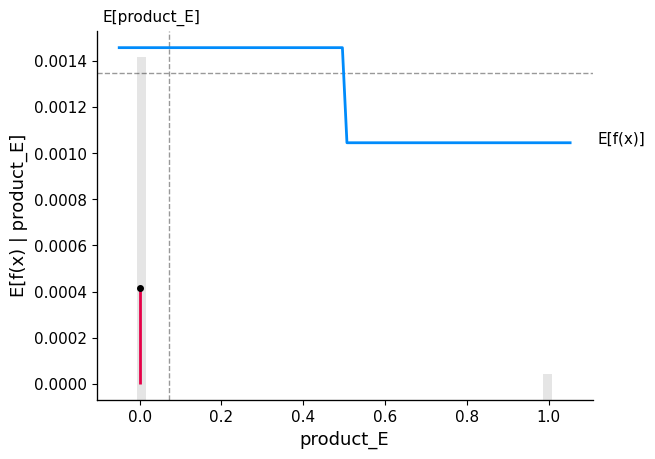

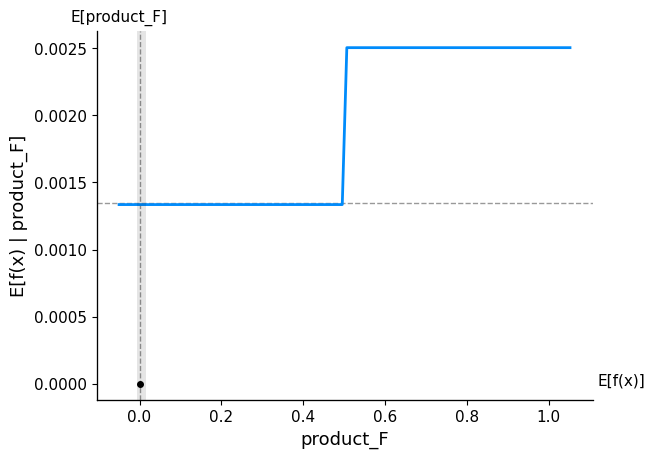

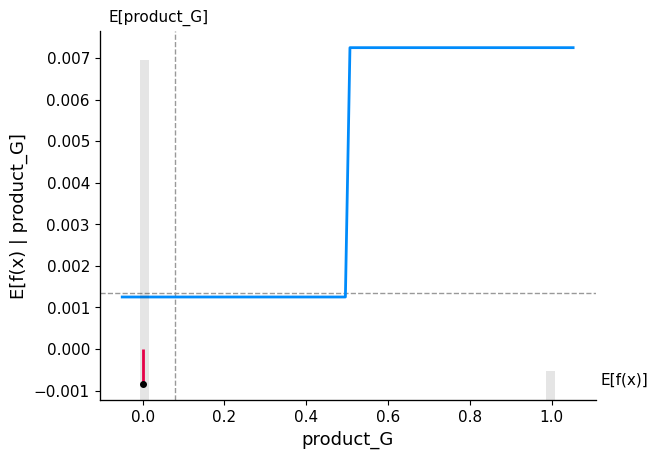

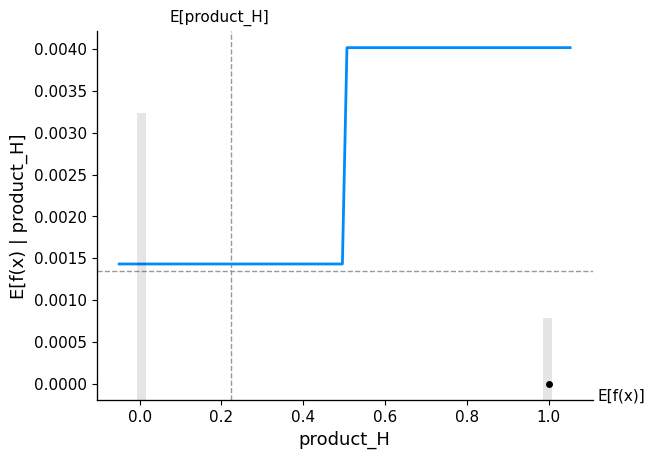

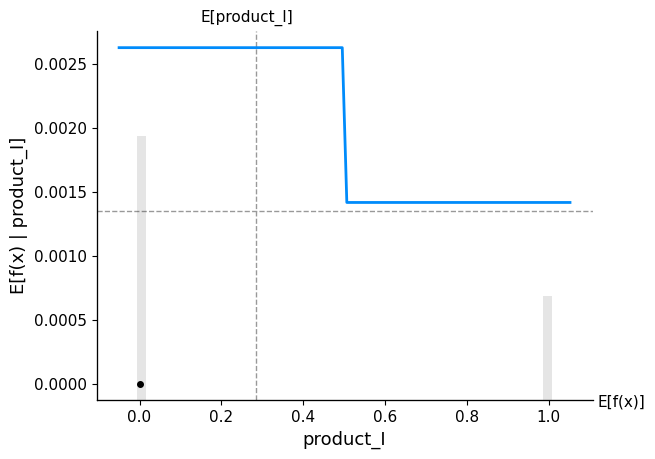

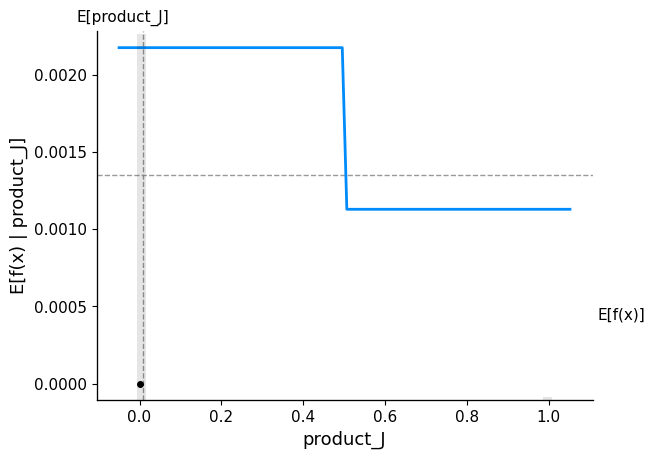

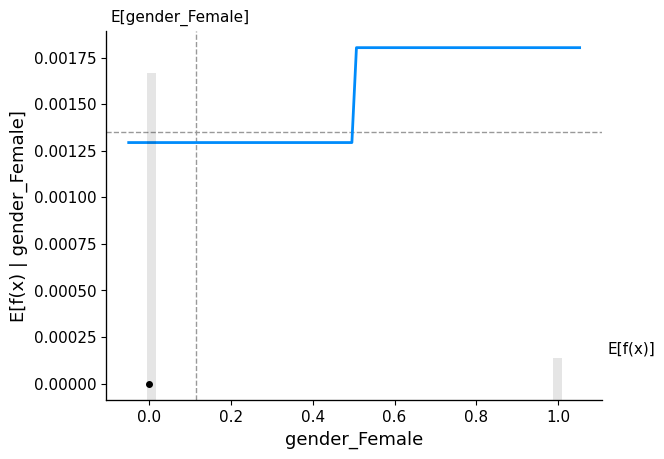

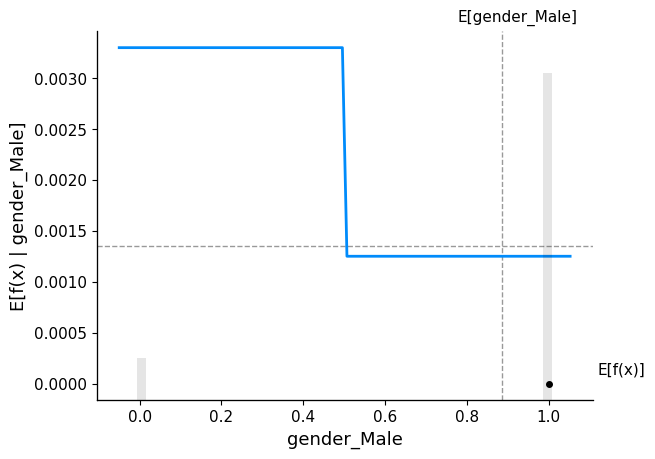

In [108]:
#generates a partial dependence plot for each feature in 'xtrain.columns' using the SHAP values of the linear model 'model.predict' for a single observation 'sample_ind'
# which is subsetted from 'linear_shap_values', with respect to the selected feature
for i in xtrain.columns:
    sample = 10
    shap.partial_dependence_plot(
        i,
        model.predict,
        xtrain,
        model_expected_value=True,
        feature_expected_value=True,
        ice=False,
        shap_values=linear_shap_values[sample : sample + 1, :],
    ) 

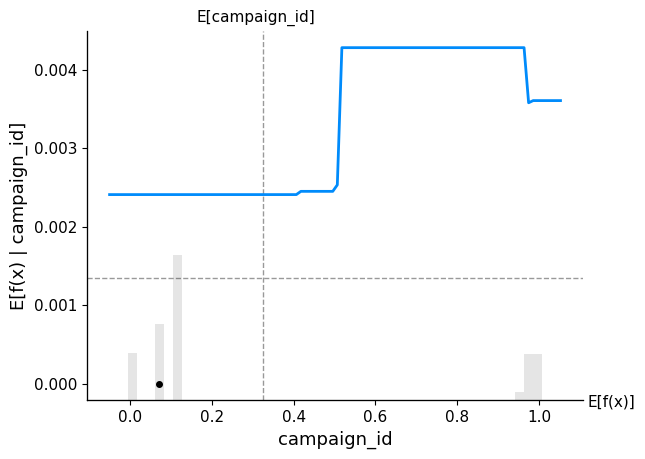

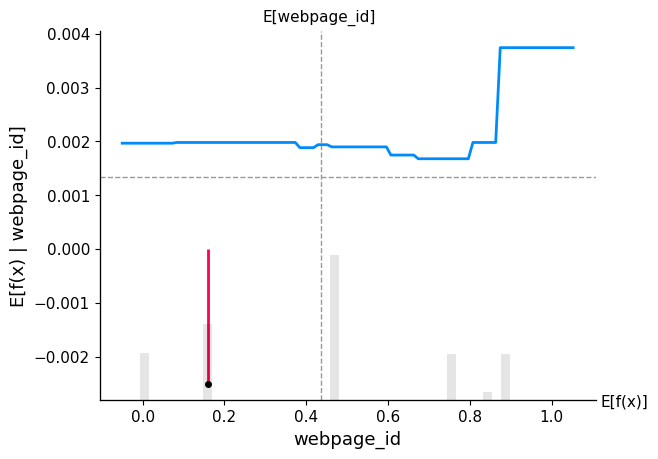

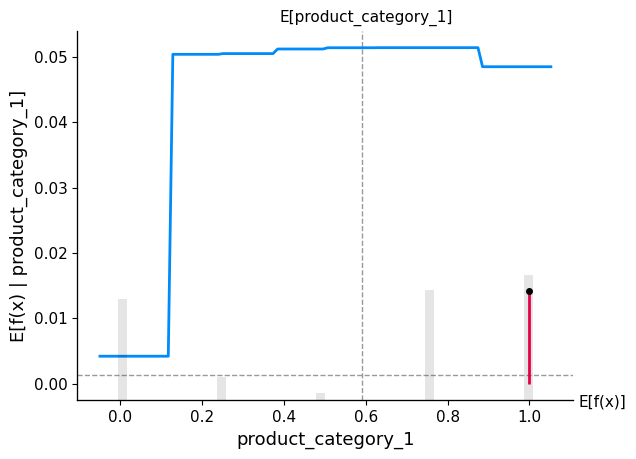

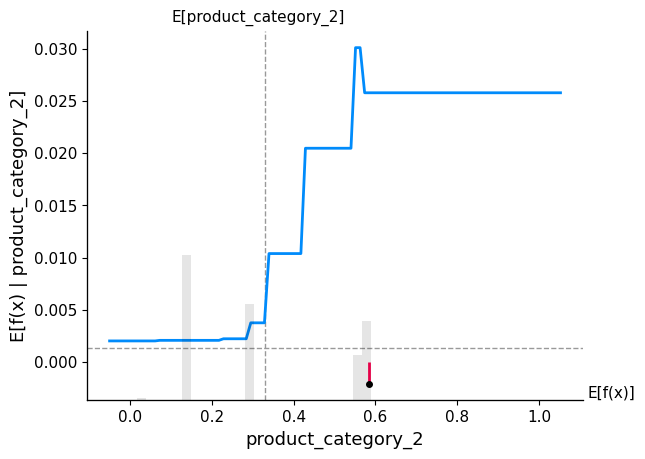

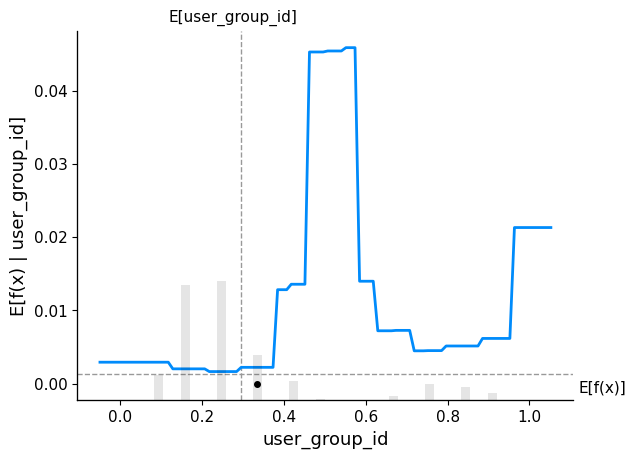

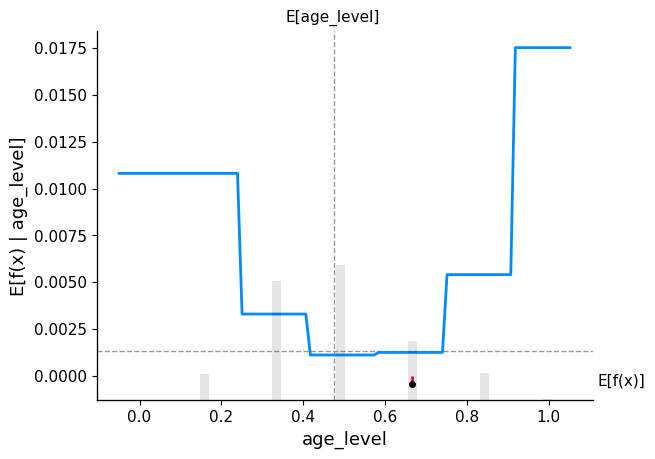

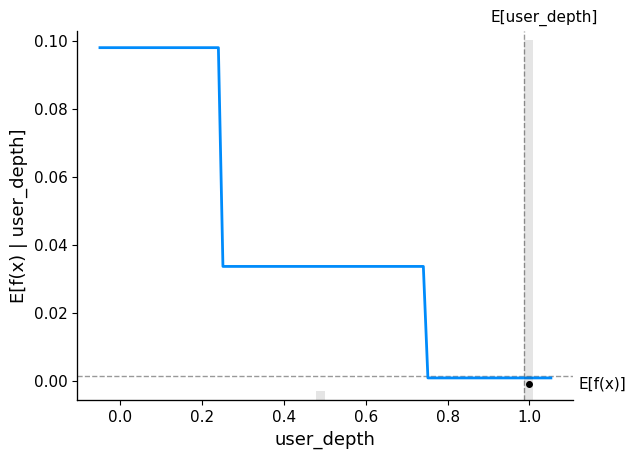

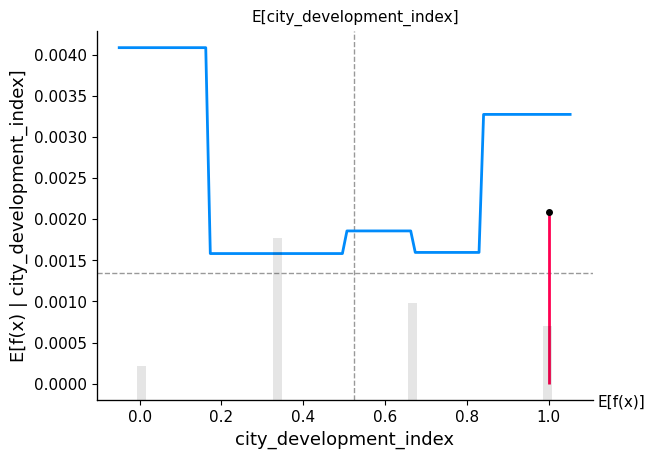

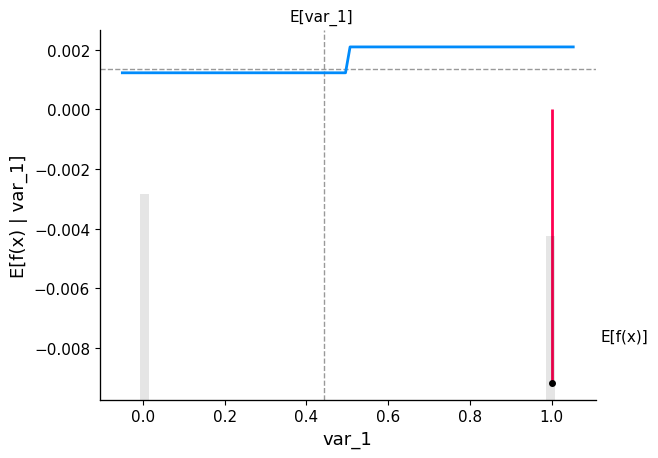

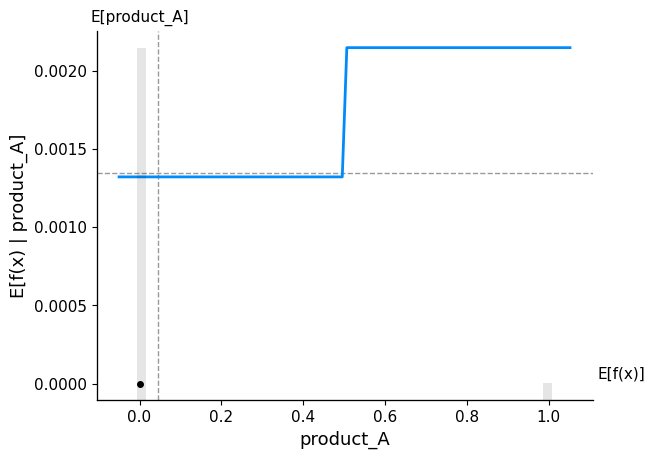

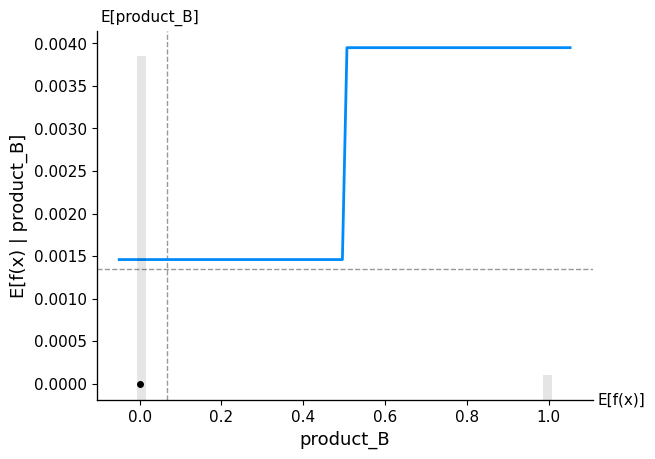

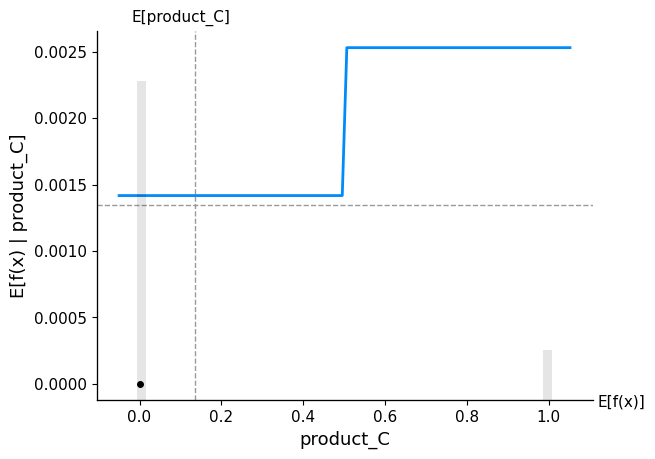

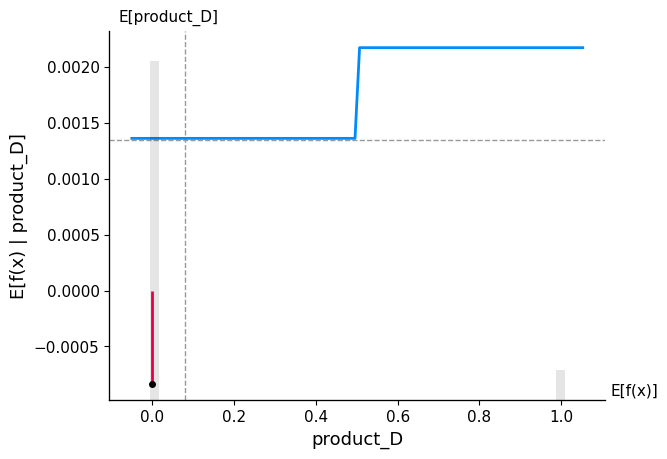

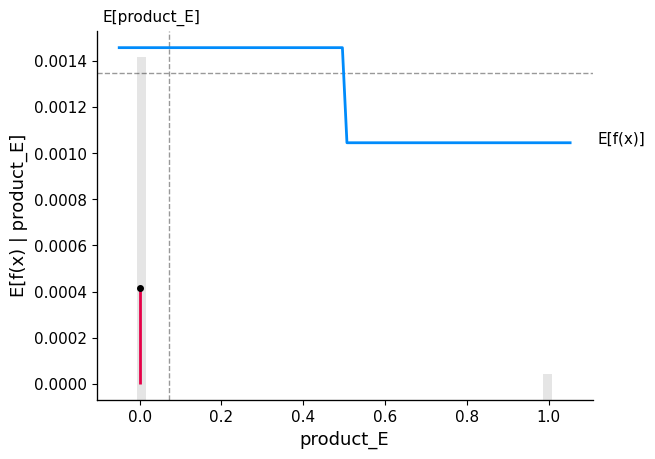

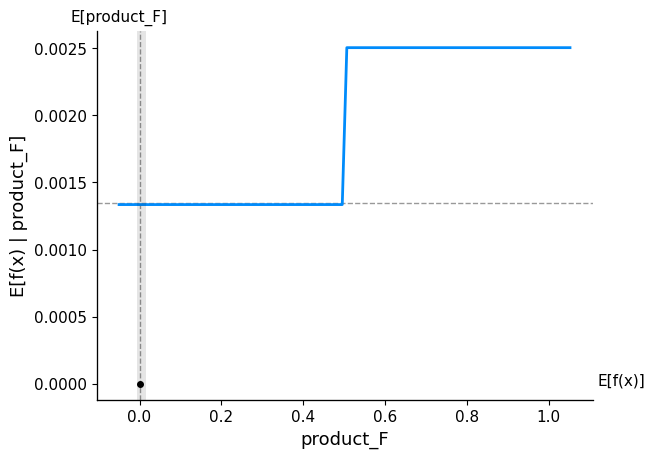

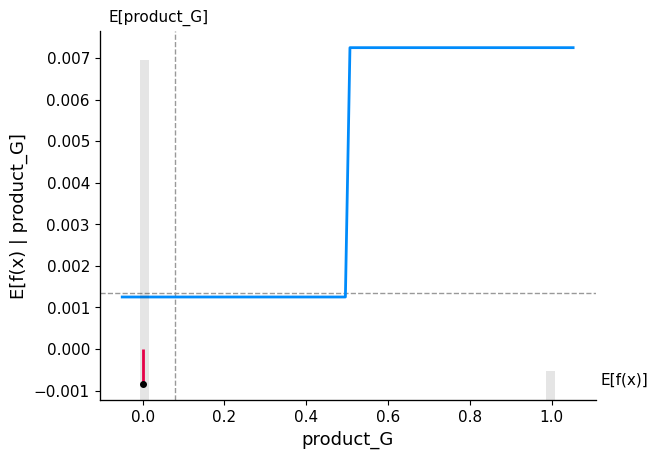

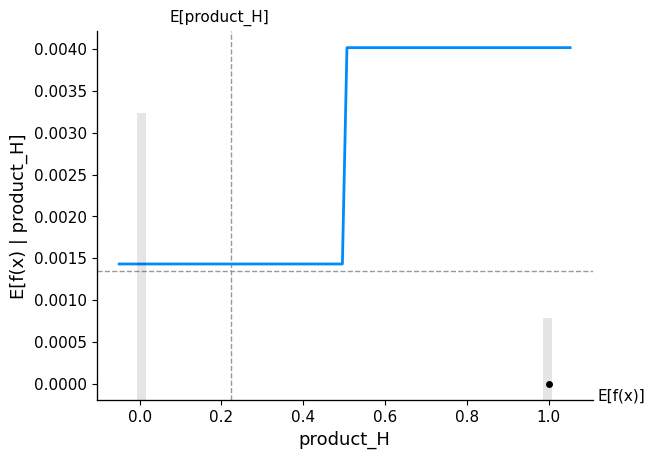

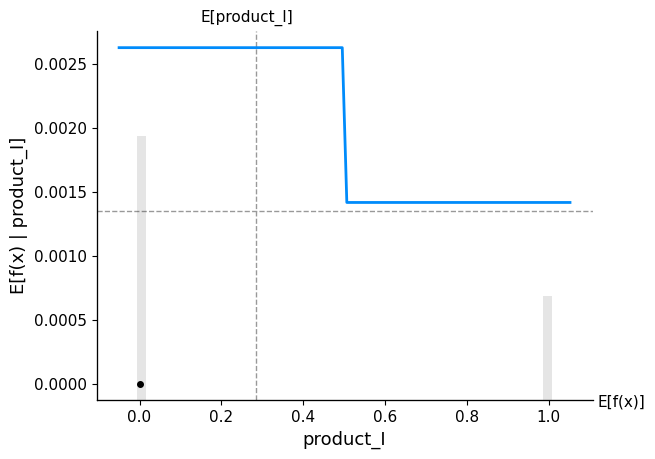

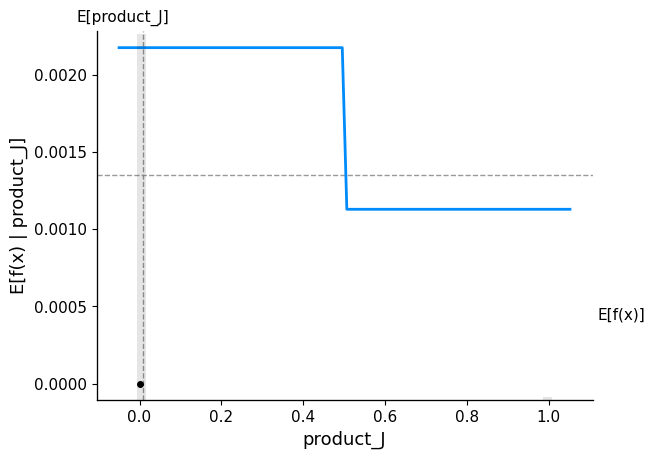

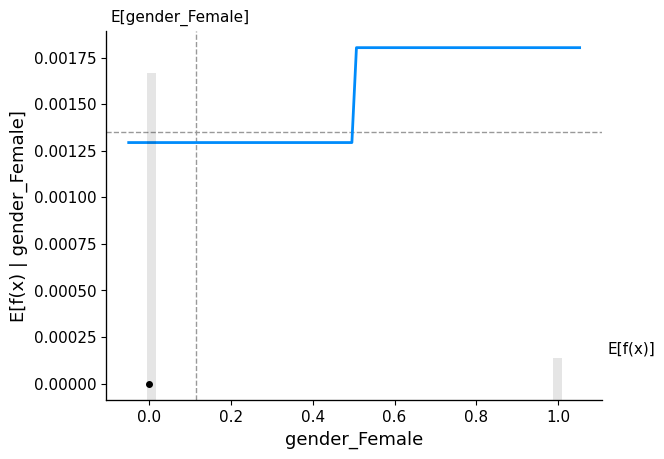

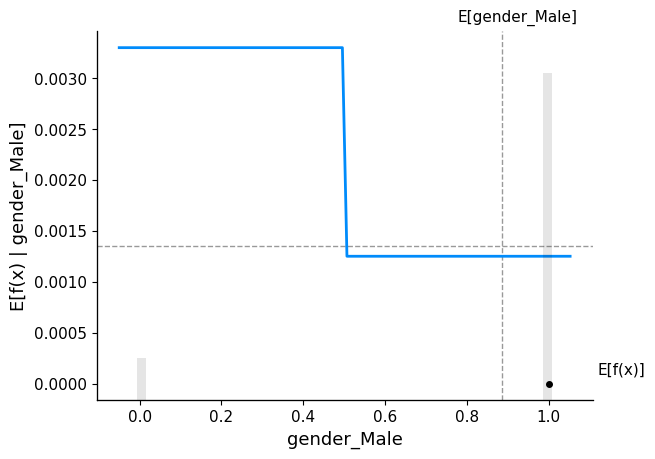

In [109]:
#generates a partial dependence plot for each feature in 'xtrain.columns' using the SHAP values of the decision tree classifier 'model1.predict' for a single observation 'sample_ind',
# which is subsetted from 'tree_shap_values', with respect to the selected feature.
for i in xtrain.columns:
    sample_ind = 18
    shap.partial_dependence_plot(
        i,
        model.predict,
        xtrain,
        model_expected_value=True,
        feature_expected_value=True,
        ice=False,
        shap_values=tree_shap_values[sample : sample + 1, :],
    )  

## Beeswarm Analysis

A beeswarm plot is a way to visualize the distribution of Shapley Values for each feature in a machine learning model. In a beeswarm plot, each dot represents a single instance in the dataset, and the position of the dot on the x-axis represents the Shapley Value for the corresponding feature. The dots are arranged in a way that minimizes overlap, so that it is easy to see the distribution of values.

The beeswarm plot is useful for identifying which features have the most impact on the model's predictions, and for detecting interactions between features. Features with a large range of Shapley Values indicate that they have a significant impact on the model, while features with a small range of Shapley Values indicate that they have less impact.

In summary, the beeswarm plot is a visualization tool that is used to explain the contribution of individual features to a machine learning model's predictions using the Shapley Value concept from cooperative game theory.

User Product Category 1 is the most important factor in for Logistic Regression which is same for tree value

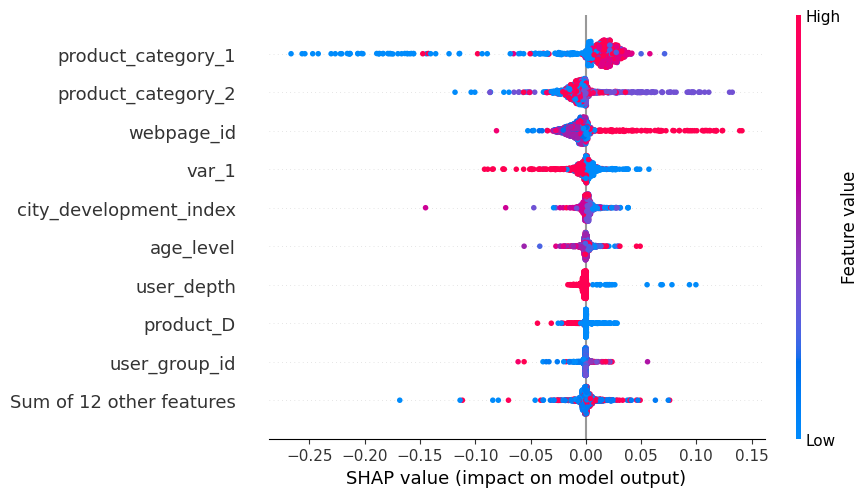

In [110]:
#generates a beeswarm plot to display the distribution of SHAP values for each feature in 'linear_shap_values'.
shap.plots.beeswarm(linear_shap_values, show=False)

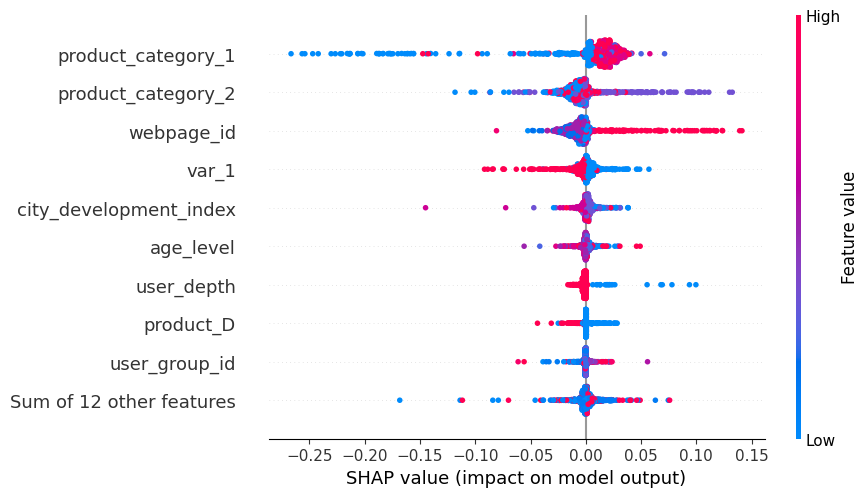

In [111]:
# creates a bee swarm plot to visualize the Tree SHAP values
shap.plots.beeswarm(tree_shap_values, show=False)

In [112]:
print(len(xtrain))

72660


## Heatmap Analysis

A Shap heatmap is a visualization tool used in machine learning to display the contribution of each feature in a dataset towards the prediction of a target variable. It is based on the SHAP (SHapley Additive exPlanations) values, which is a method for explaining the output of any machine learning model.

The SHAP values represent the contribution of each feature to the difference between the predicted output and the average output of the model. Positive SHAP values indicate that a feature contributes to increasing the predicted output, while negative SHAP values indicate that a feature contributes to decreasing the predicted output.

To create a Shap heatmap, first, the SHAP values for each instance in the dataset are calculated. Then, the absolute SHAP values for each feature are averaged across all instances, and the result is plotted as a heatmap where each row represents a feature, and each column represents an instance. The color of each cell in the heatmap represents the magnitude of the SHAP value for that feature and instance.

Shap heatmaps can be helpful in identifying which features are most important in determining the output of a machine learning model and how these features interact with each other. They can also be used to detect any patterns or correlations between features that may be useful for further analysis.

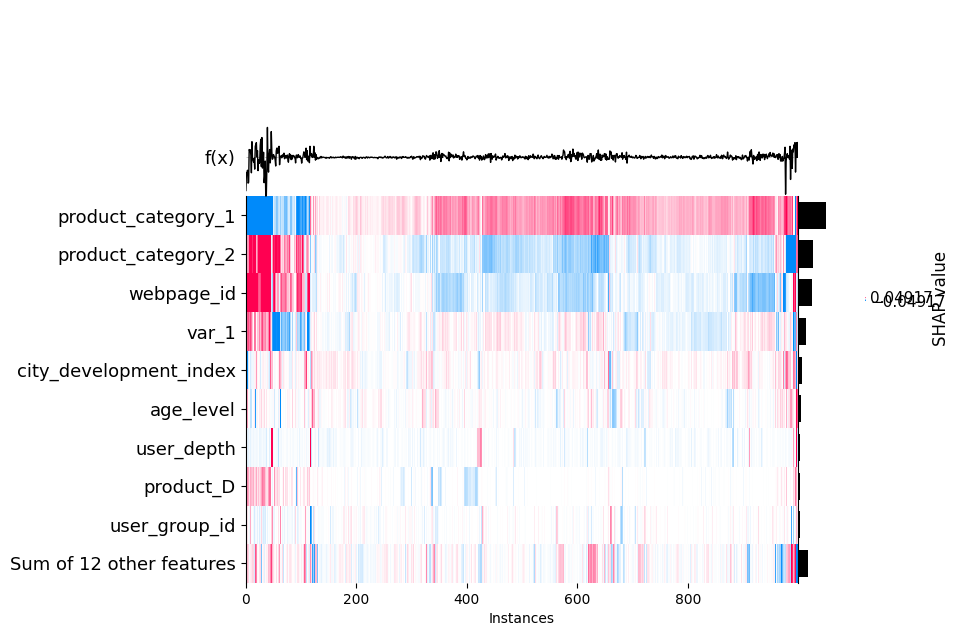

In [113]:
#creates a heatmap plot to visualize the Linear SHAP values.
shap.plots.heatmap(linear_shap_values)

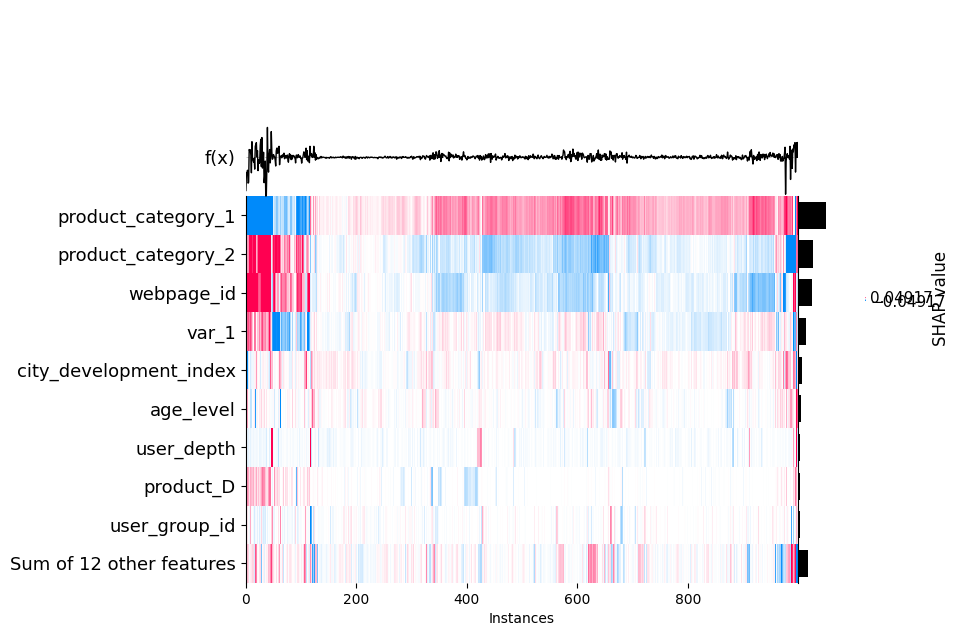

In [114]:
#creates a heatmap plot to visualize the Tree SHAP values.
shap.plots.heatmap(tree_shap_values)

## Bar Plot Analysis

A Shapley value plot, also known as a Shap plot, is a visualization technique used to explain how individual features contribute to a model's prediction for a specific instance. A Shap bar plot is a type of Shap plot that displays the feature importance values as vertical bars.

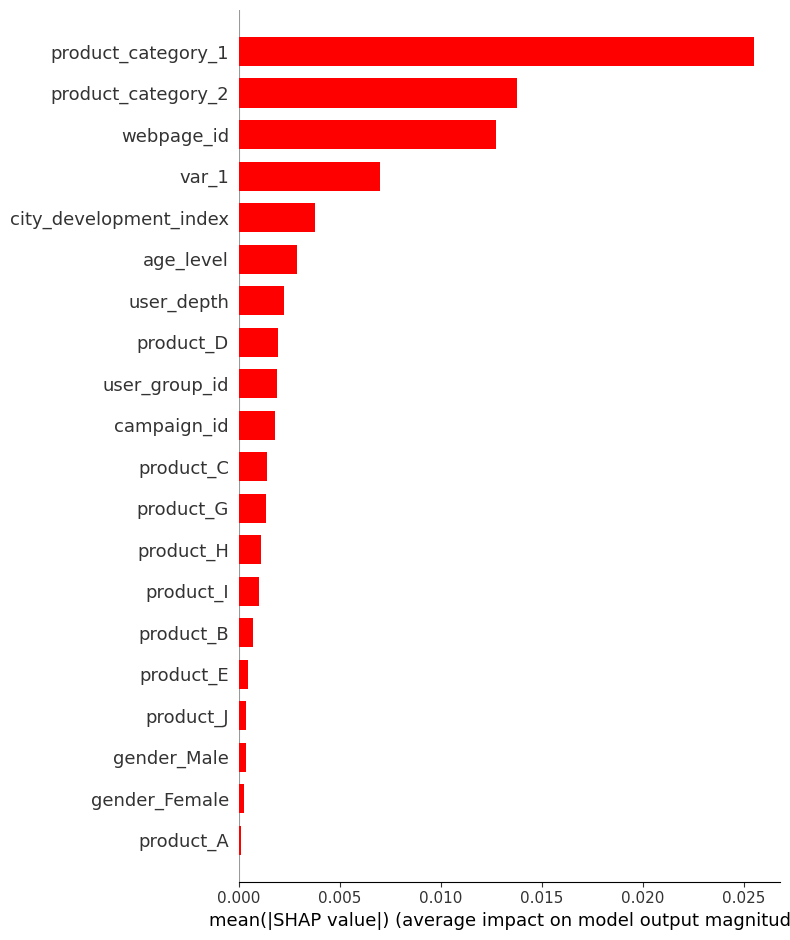

In [115]:
#creates a summary plot to visualize the feature importance of the Linear SHAP values using a bar chart with a blue color scheme.
shap.summary_plot(linear_shap_values, xtrain, plot_type="bar", color="red")

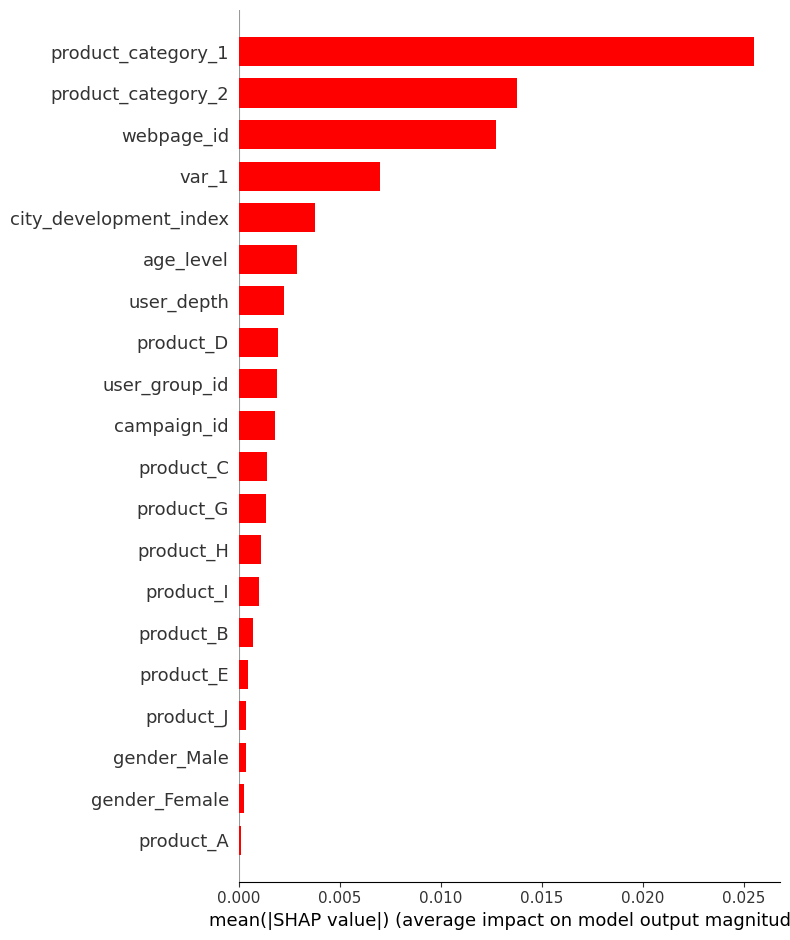

In [116]:
# creates a summary plot to visualize the feature importance of the Tree SHAP values using a bar chart with a red color scheme.
shap.summary_plot(tree_shap_values, xtrain, plot_type="bar", color="red")

## Waterfall Analysis

SHAP (SHapley Additive exPlanations) waterfall plot is a visualization tool that helps to explain the output of a machine learning model by decomposing the contribution of each feature to the final prediction. The SHAP waterfall plot shows how each feature value affects the model's output compared to a baseline value.

Here's how to interpret a SHAP waterfall plot:

The top of the plot represents the total output value of the model for a given instance.
Each row represents the contribution of a feature to the model's output value.
The length of each bar represents the magnitude of the feature's effect on the output.
Positive values are shown in blue and negative values in red.
The baseline value is represented by the vertical dashed line in the middle of the plot.
With a SHAP waterfall plot, you can easily see which features have the greatest impact on the model's output, and in which direction (positive or negative). This can be helpful for model interpretability and feature selection.

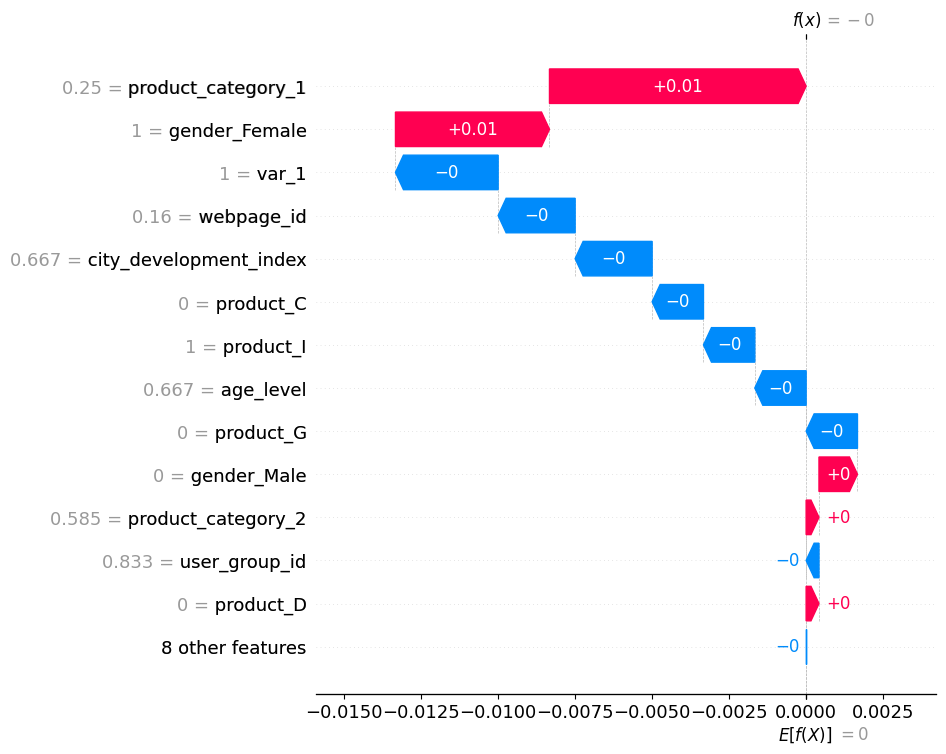

In [117]:
 # creates a waterfall plot to visualize the contributions of each feature to the prediction for a specific sample using the Linear SHAP values, displaying up to 14 features.
shap.plots.waterfall(linear_shap_values[sample_ind],max_display=14)

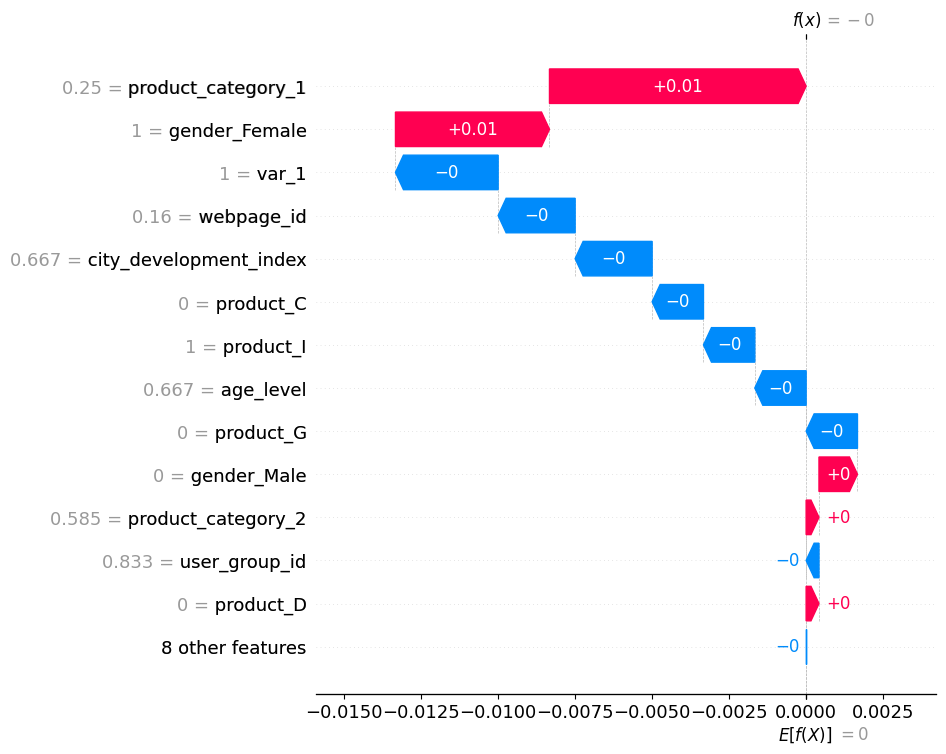

In [118]:
#creates a waterfall plot to visualize the contributions of each feature to the prediction for a specific sample using the Tree SHAP values, displaying up to 14 features.
shap.plots.waterfall(tree_shap_values[sample_ind], max_display=14)

## Partial Dependence Plot

A Shapley partial dependence plot (PD plot) shows how the predicted outcome of a machine learning model changes as the values of a selected feature(s) change while holding all other features constant. It consists of a partial dependence function (PDF) and individual conditional expectation (ICE) plots. The PDF shows the average predicted outcome while the ICE plots show the predicted outcome for individual samples. It helps identify non-linear relationships and gain insights into how the model is making predictions.

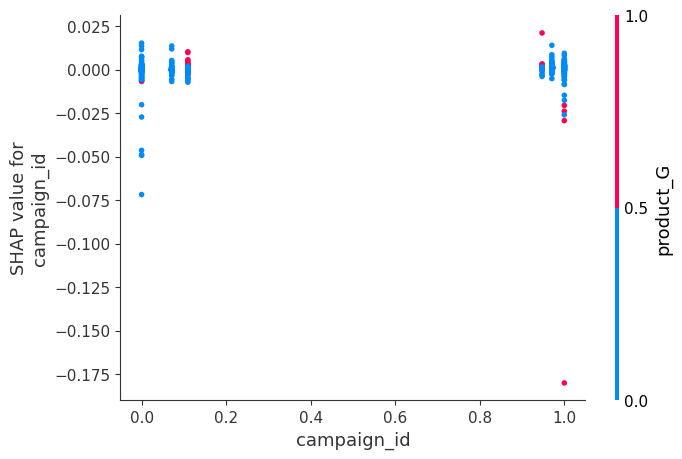

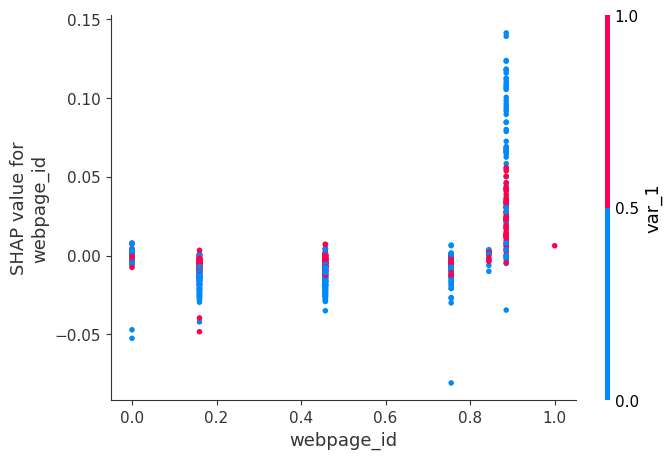

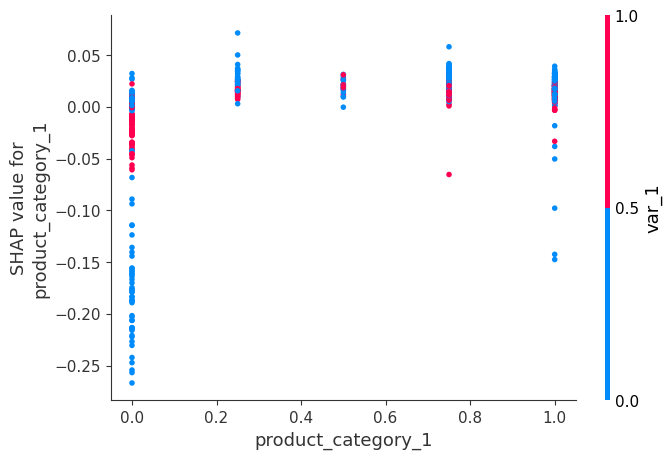

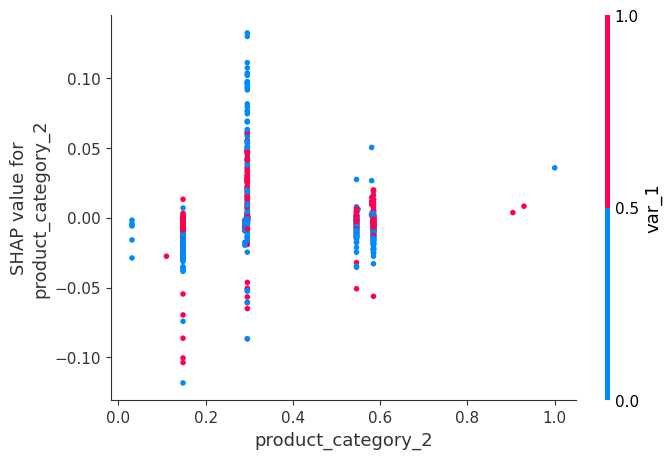

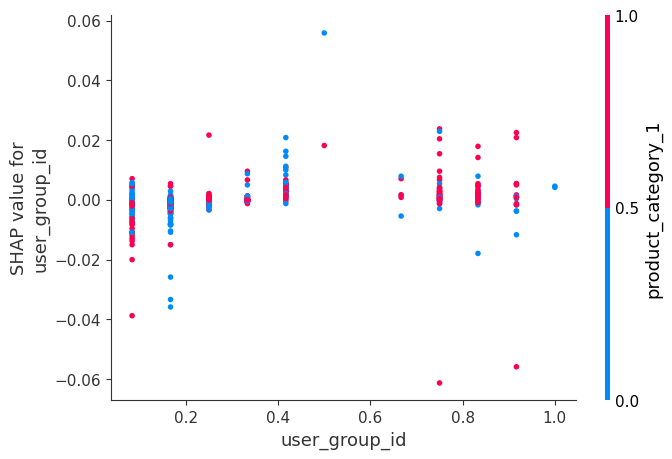

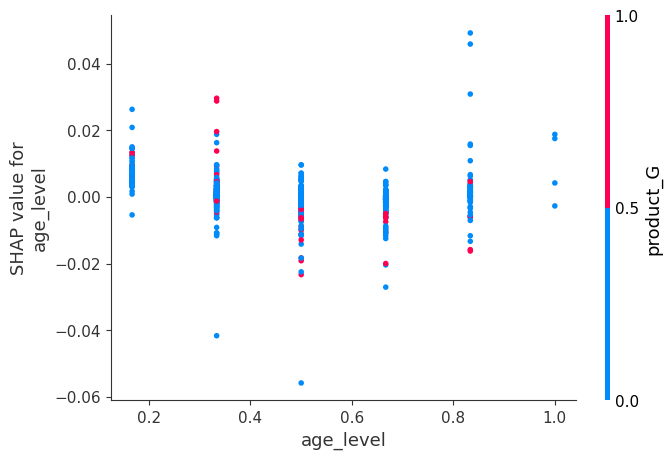

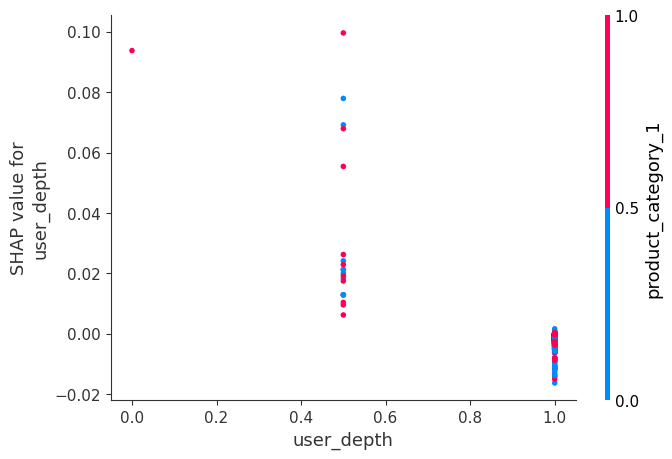

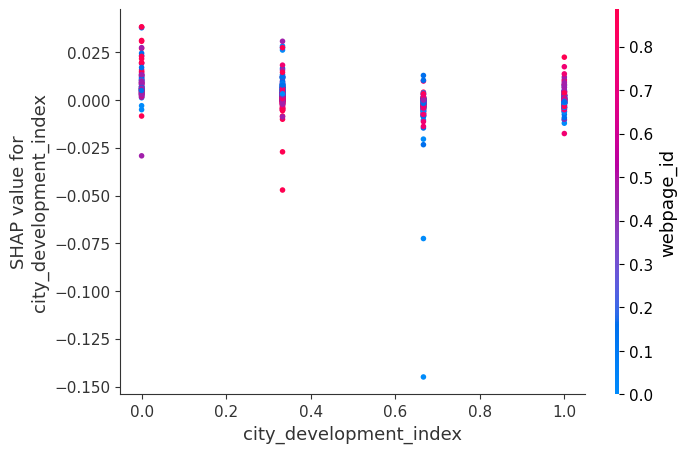

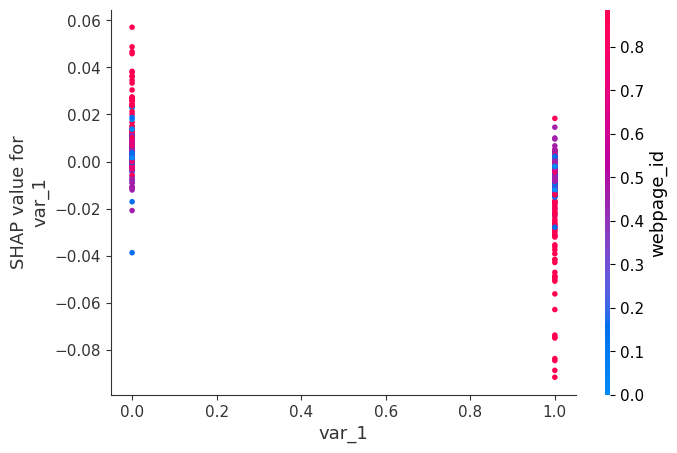

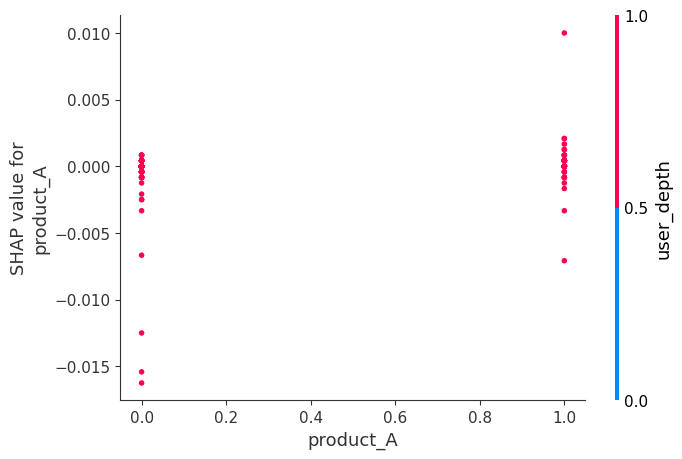

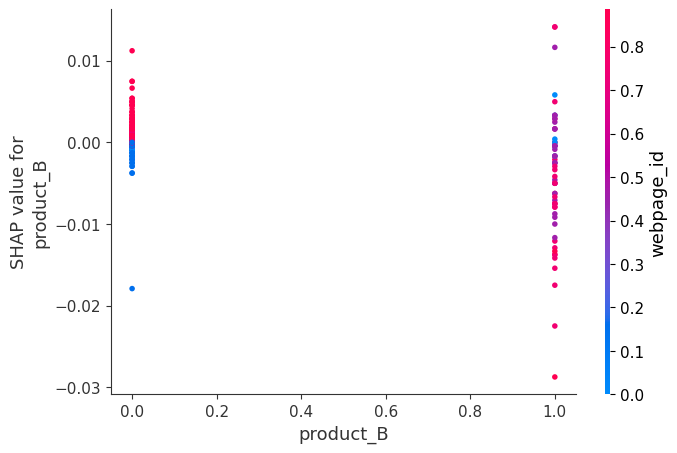

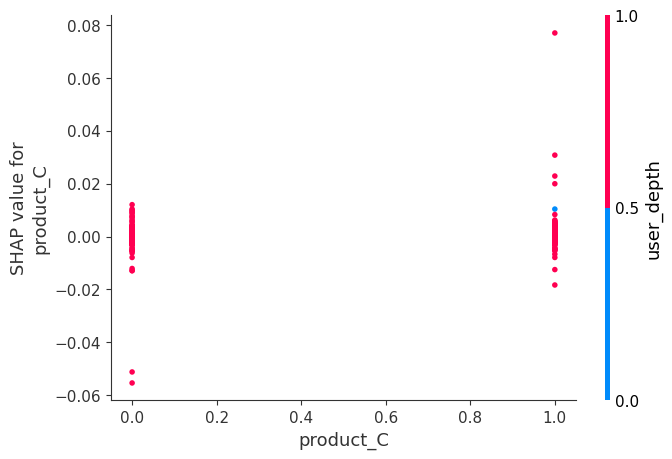

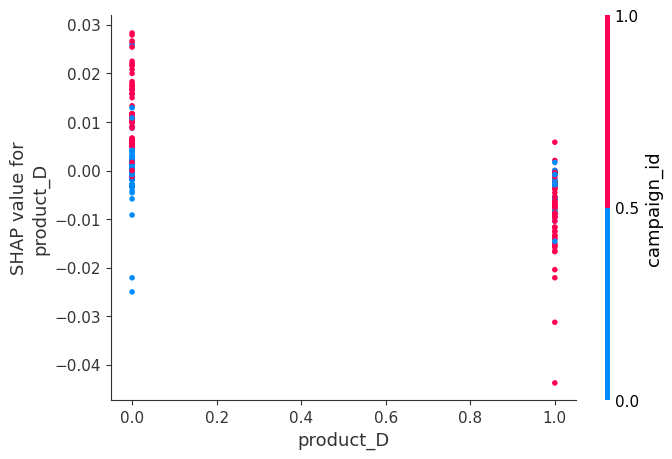

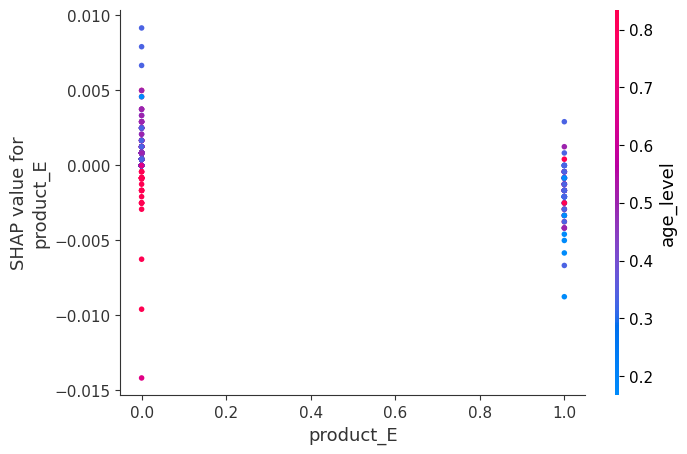

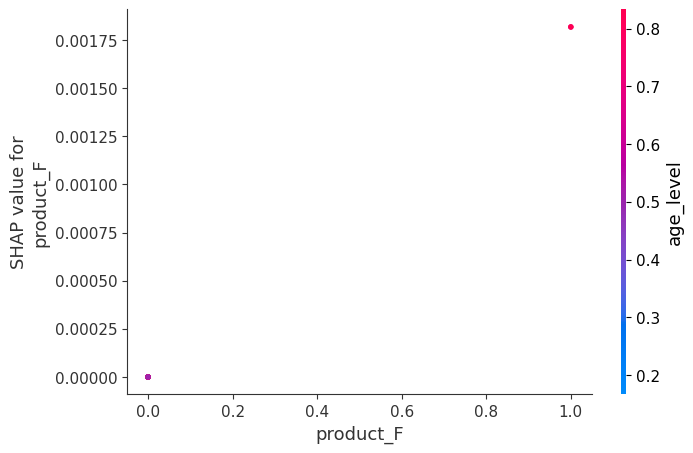

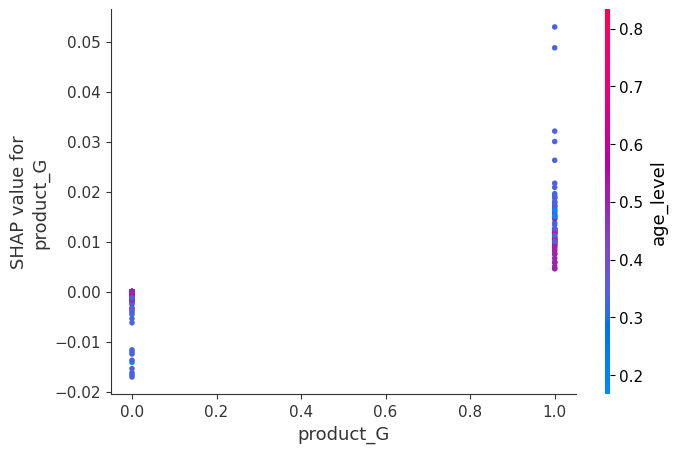

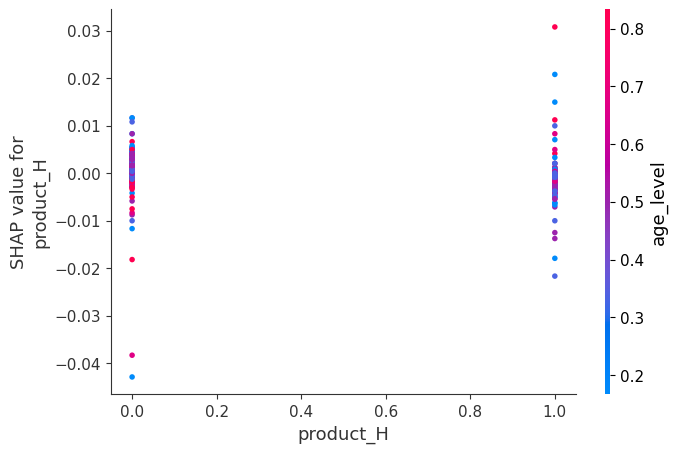

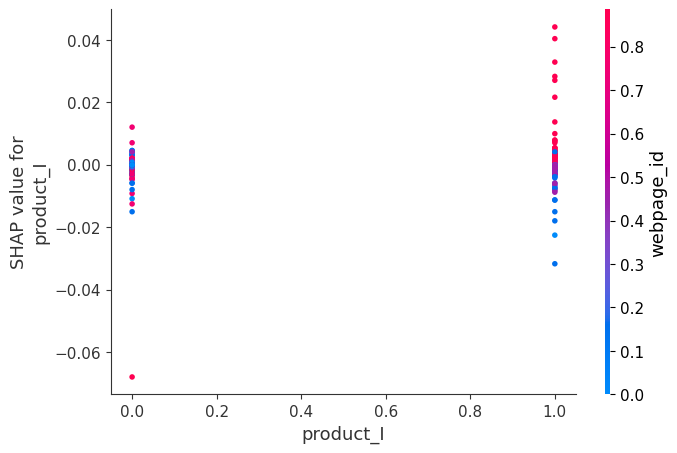

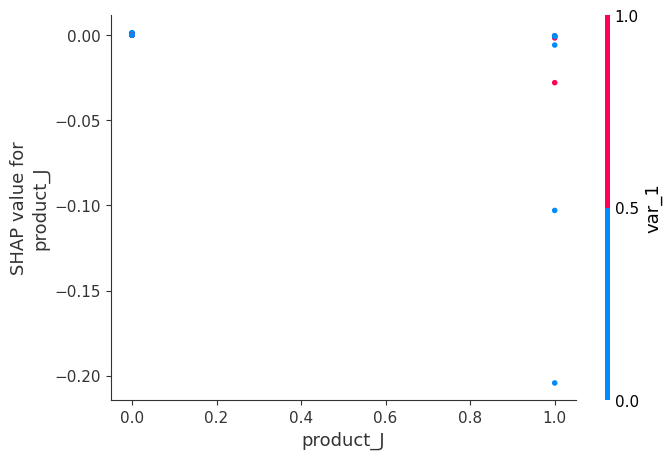

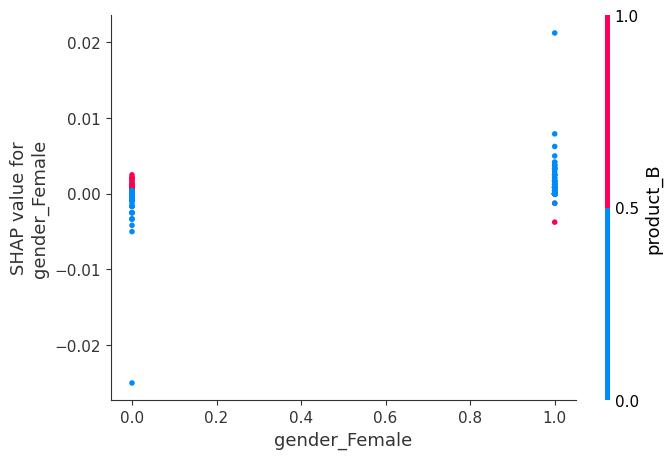

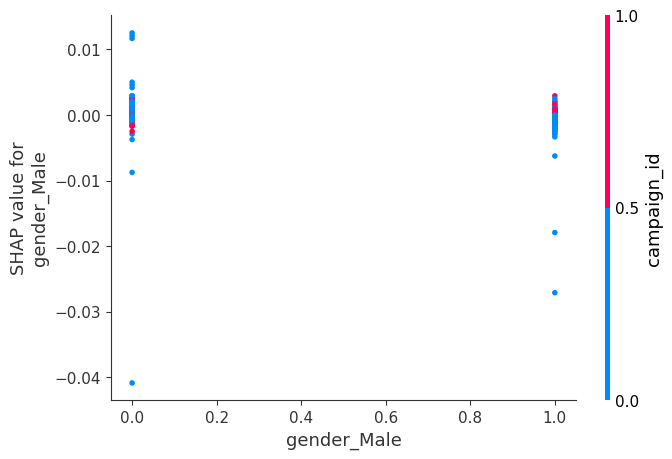

In [119]:
#creates dependence plots to visualize the relationship between each feature and its corresponding Linear SHAP values for a dataset of 2000 samples.
for i in xtrain.columns:
    shap.dependence_plot(i, linear_shap_values.values, xtrain_1000)

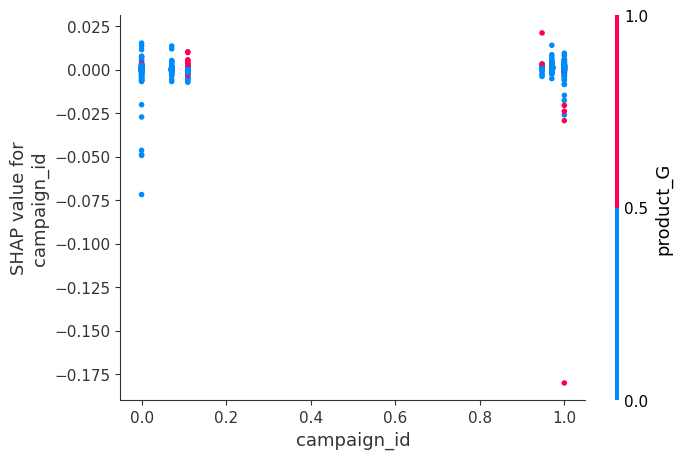

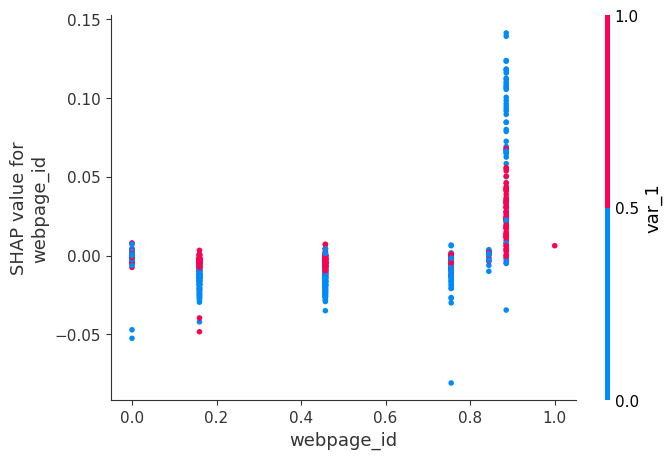

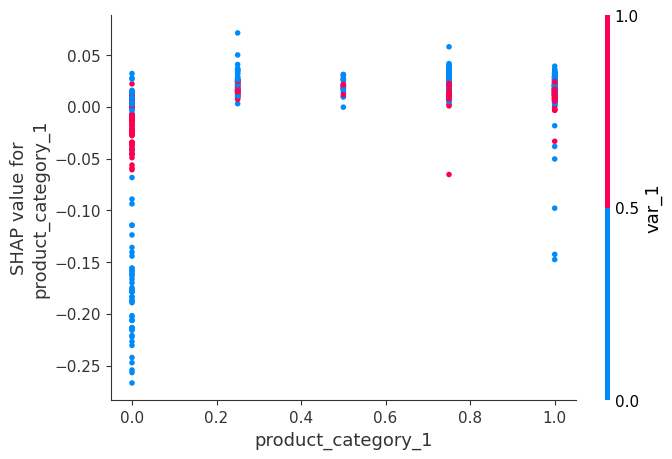

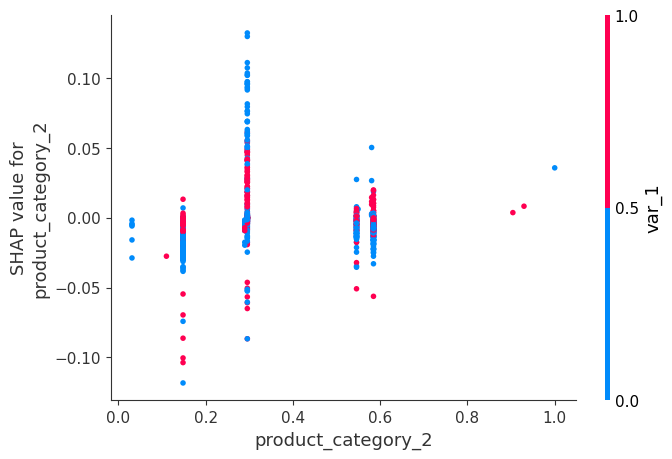

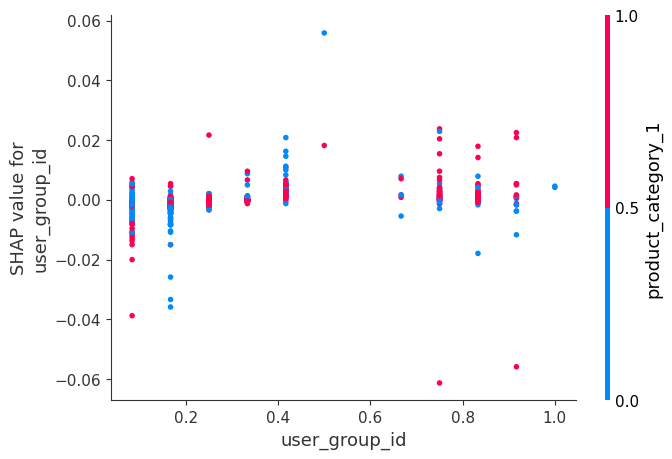

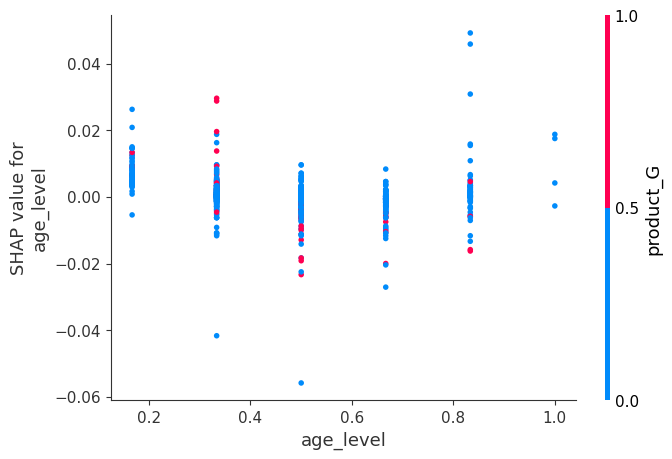

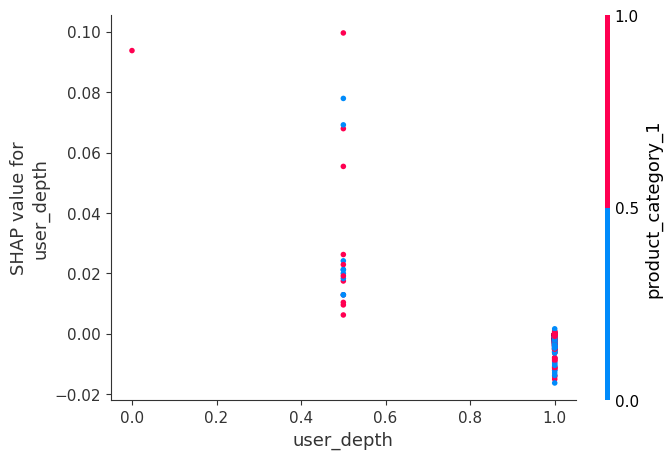

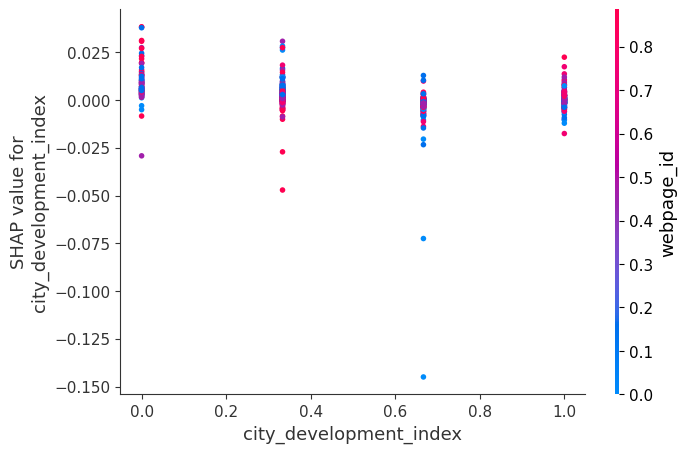

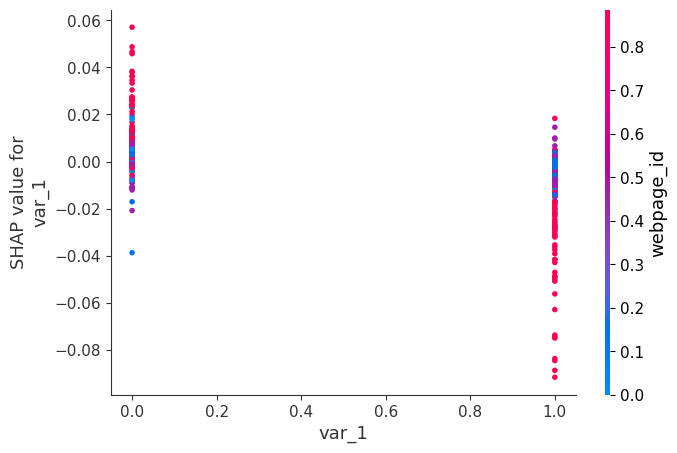

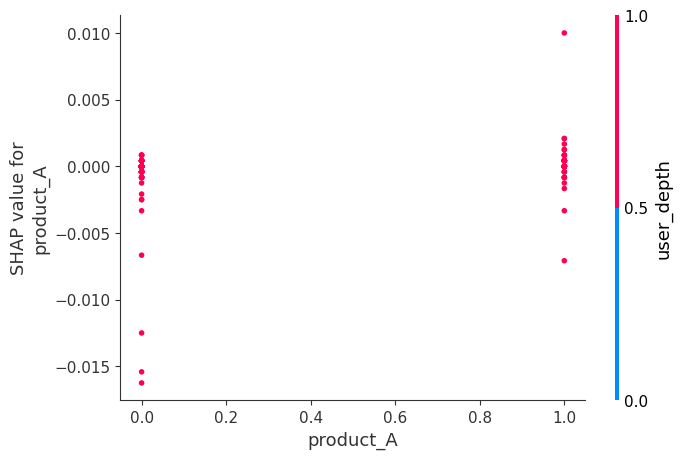

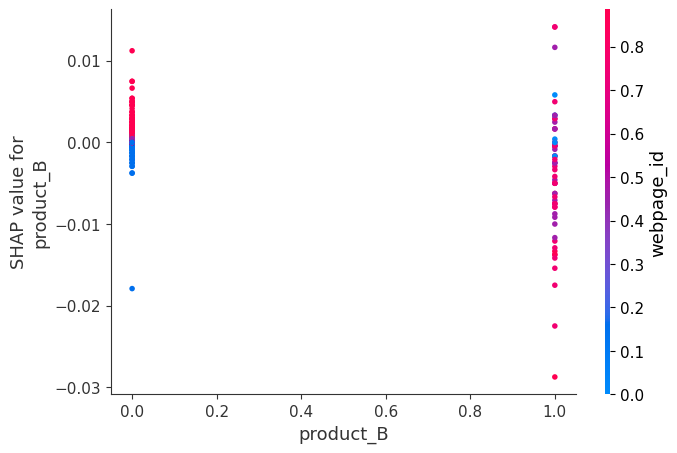

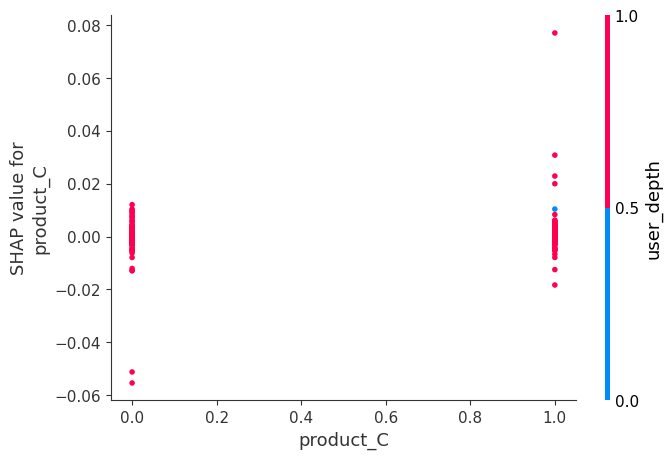

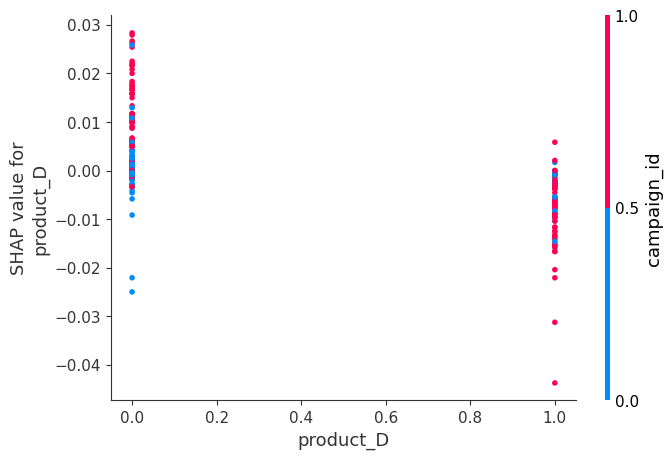

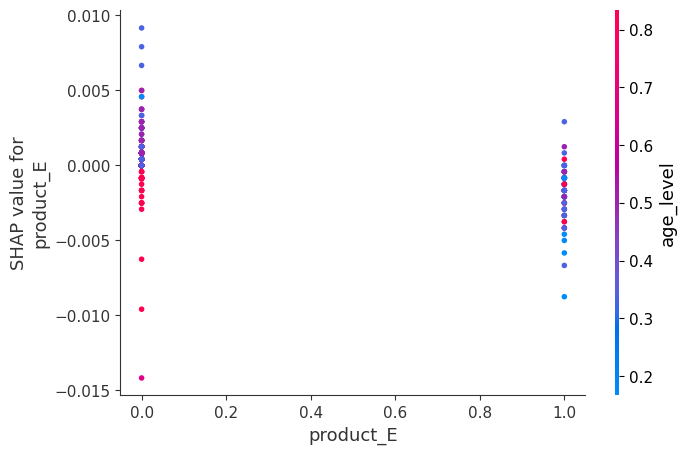

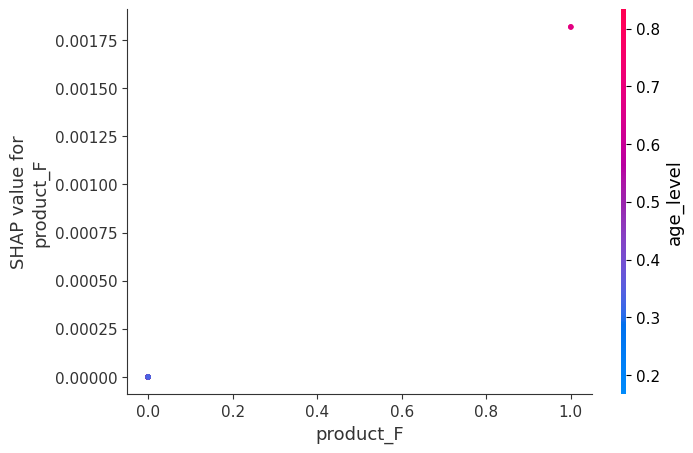

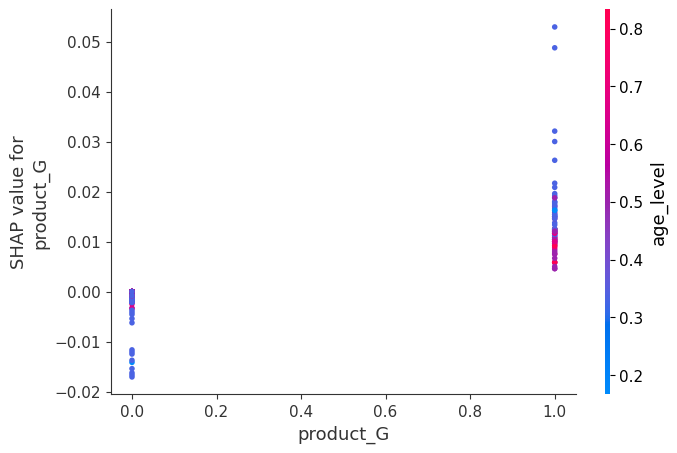

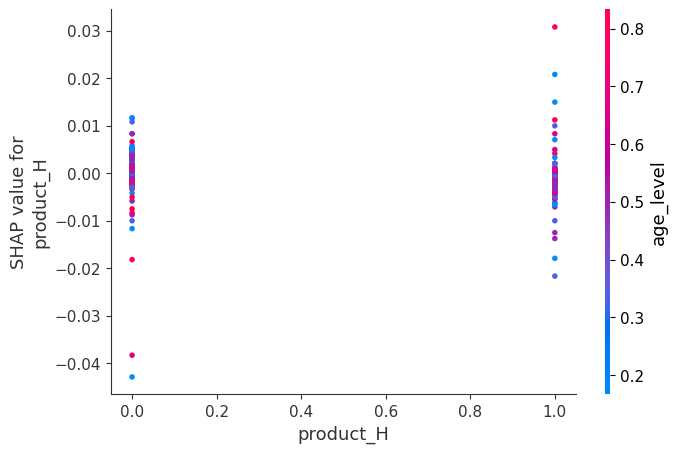

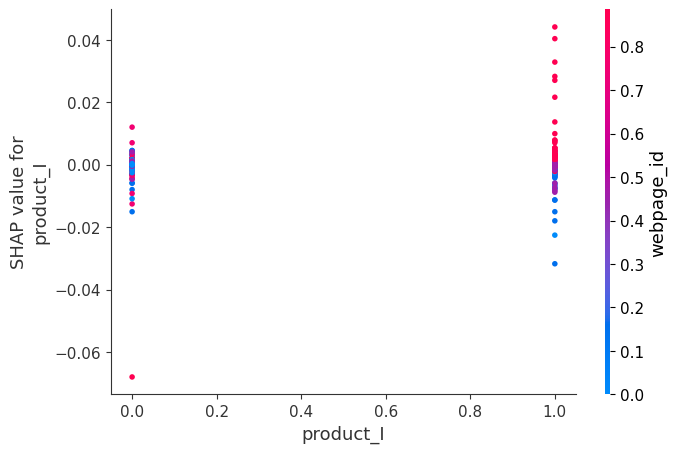

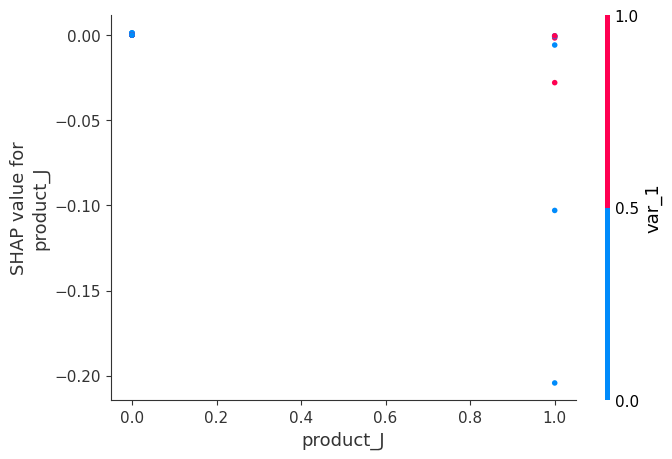

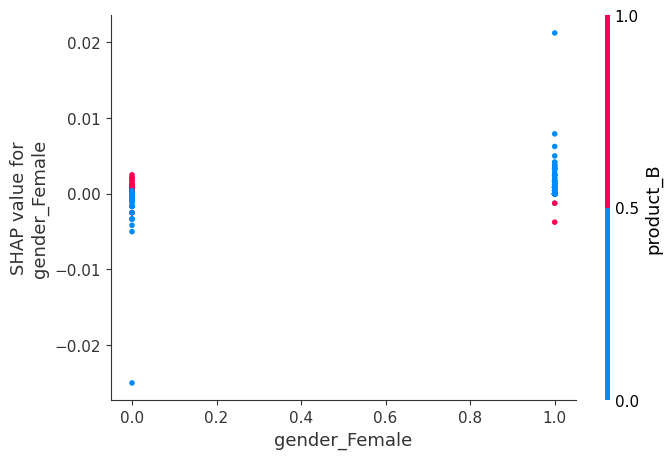

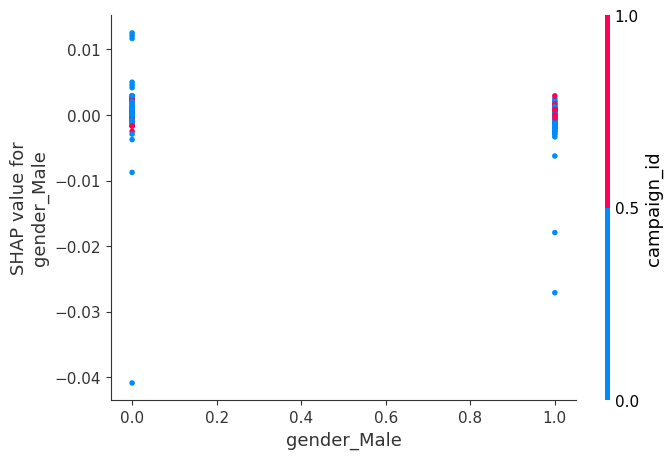

In [120]:
#creates dependence plots to visualize the relationship between each feature and its corresponding Tree SHAP values for a dataset of 2000 samples.
for i in xtrain.columns:
    shap.dependence_plot(i, tree_shap_values.values, xtrain_1000)

# 1. What was the research question?

The question is to understand the impact of various variables on the satisfaction of customers when traveling by air, and to develop a predictive model using machine learning algorithms also to understand how different models work

# 2. What did you do?


Various machine learning techniques were employed, including logistic regression, Decision Tree Classifier, H2O AutoML, Ridge and LASSO regularization, and Random Grid Search for hyperparameter tuning. The data was analyzed for collinearity, and variable importance was determined. SHAP analysis was used for model interpretation, and its differences with PDP were highlighted.

# 3. How well did it work?

The analysis and techniques used were effective in building a precise predictive model, which achieved high accuracy. The regularization techniques were successful in minimizing overfitting, and the importance of quantifiers in the training process was realized. The SHAP analysis was a useful tool for interpreting the model and identifying the essential features driving the model's performance. Also the accuracy is pretty good for a large dataset and hence it worked good.

# 4. What did you learn?

The study highlights the importance of variable importance, regularization, hyperparameter tuning, and interpretability tools such as SHAP analysis in optimizing model performance and reducing the risk of overfitting. Additionally, the trade-offs between accuracy and interpretability must be considered when choosing a model interpretation technique

# References
*  https://towardsdatascience.com/logistic-regression-with-dummy-variables-step-by-step-6a9f44aaedfb
*   https://towardsdatascience.com/one-hot-encoding-and-logistic-regression-3f6b3c79b0e8
*    https://towardsdatascience.com/min-max-scaler-in-machine-learning-fad2f2e1daf7
*   Refered Towards Data Science
*   Eli5 official documentation
* https://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html
* https://www.h2o.ai/blog/efficiently-automating-machine-learning-with-h2o-automl/
* https://analyticsindiamag.com/h2o-ai-automl-simplifying-machine-learning-for-everyone/
* https://joss.theoj.org/papers/10.21105/joss.01371
* https://www.h2o.ai/h2o-tutorials/latest-stable/h2o-world-2019-automated-machine-learning-with-h2o-automl/index.html
* https://www.youtube.com/watch?v=BC_1vRYMx_c
*   Sklearn Documentation
*   A Complete Guide to Dealing with Missing values in Python
* Shap official documentation: https://shap.readthedocs.io/en/latest/index.html
* Pandas official documentation: https://pandas.pydata.org/docs/user_guide/index.html
* "Data Preprocessing for Machine Learning with Python" by Selva Prabhakaran on KDnuggets: https://www.kdnuggets.com/2020/03/data-preprocessing-machine-learning-python.html
* "Data Preprocessing for Logistic Regression in Python" by Michael Galarnyk on Medium: https://towardsdatascience.com/data-preprocessing-for-logistic-regression-in-python-c632418098b0

# Conclusion

Based on the analysis of the data set, it is evident that there is some collinearity and all variables, except length, are important for training the data. H2O AutoML is an effective tool for creating precise predictive models without manual hyperparameter tuning, and it supports various supervised learning tasks. Ridge and LASSO regularization techniques were successfully utilized, and Random Grid Search was applied for hyperparameter tuning. The importance of quantifiers in the training process was realized. When interpreting black-box models, SHAP is popular methods, SHAP being more stable and theoretically sound but computationally intensive. PDP and SHAP differ in their approach to analyzing variable contributions. PDP is useful for understanding the effect of a single variable, while SHAP shows the contribution of each variable to the output. The choice of interpretable method depends on project goals and requirements, considering trade-offs between accuracy and interpretability.

Copyright 2023 Rhea Bajpai

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.